In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
with open("labeled_data/ford_categories.json", "r", encoding='utf-8') as file:
    ford_categories = json.load(file)

In [4]:
df_c19 = pd.read_csv('final_datasets/c19_final_2.csv')
df_m17 = pd.read_csv('final_datasets/m17_final_2.csv')
df_c19 = df_c19.astype({'cited':'int32'})
df_m17 = df_m17.astype({'evaluation':'int32'})

In [1]:
def plot_categorical_distribution(df, target_variable, categorical_variable):
    plt.figure(figsize=(10, 6))
    data = '_c19' if target_variable == 'cited' else '_m17'
    sns.set_palette('viridis')

    if df[df[categorical_variable] == 'medium'].shape[0] != 0:
        category_order = ['low', 'medium', 'high']
        ax = sns.countplot(data=df, x=categorical_variable, hue=target_variable, order=category_order, palette='viridis')
    else:
        ax = sns.countplot(data=df, x=categorical_variable, hue=target_variable, palette='viridis')
    
    plt.ylabel('Count')
    if '0' in categorical_variable:
        categorical_variable = ford_categories[categorical_variable]
    plt.xlabel(categorical_variable)

    plt.title(f'Distribution of {categorical_variable} by {target_variable}')

    for p in ax.patches:
        if p.get_height() != 0:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                        textcoords='offset points')

    plt.legend(title=target_variable)
    plt.xticks(rotation=45)  

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.savefig(f"{categorical_variable}{data}.pdf", format="pdf", dpi=500, bbox_inches = "tight")

    plt.show()


def get_stat_significance(df,categorical_variable, target_variable):
    cross_tab = pd.crosstab(df[categorical_variable], df[target_variable])
    print(cross_tab)
    chi2, p_val, _, expected_freq = chi2_contingency(cross_tab)

    print("Chi-Squared Value:", chi2)
    print("P-value:", p_val)
    if '0' in categorical_variable:
        categorical_variable = ford_categories[categorical_variable]
    if p_val < 0.05:
        print(f"There is a significant association between {categorical_variable} and {target_variable}.")
    else:
        print(f"There is no significant association between {categorical_variable} and {target_variable}")
    print("---------------------------------------------------------------")

cited      0    1
novelty          
high     875  975
low      337  282
medium   287  242
Chi-Squared Value: 14.120297099124466
P-value: 0.0008586505323392688
There is a significant association between novelty and cited.
---------------------------------------------------------------


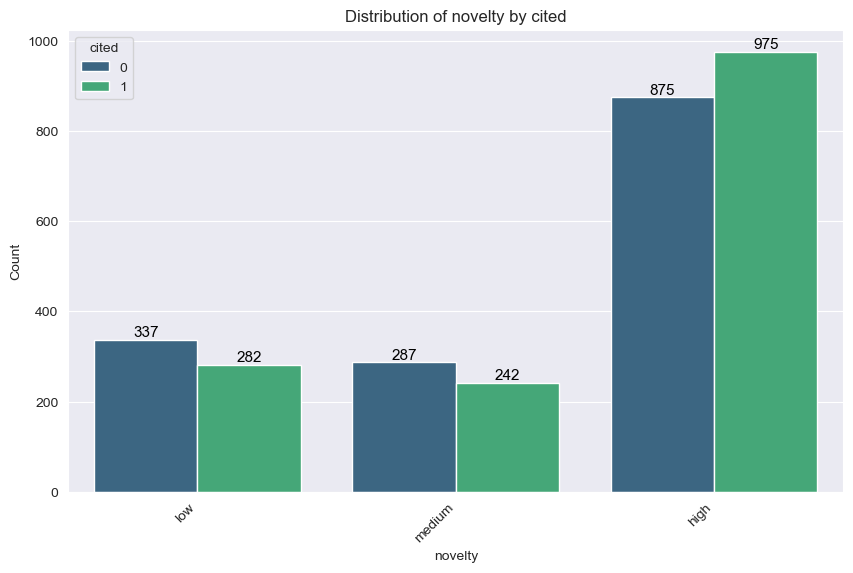

evaluation    1    2    3    4    5
novelty                            
high        167   99   55   28   23
low          50   65   86   99   94
medium      183  236  259  273  283
Chi-Squared Value: 240.26277645273726
P-value: 1.9920906553215145e-47
There is a significant association between novelty and evaluation.
---------------------------------------------------------------


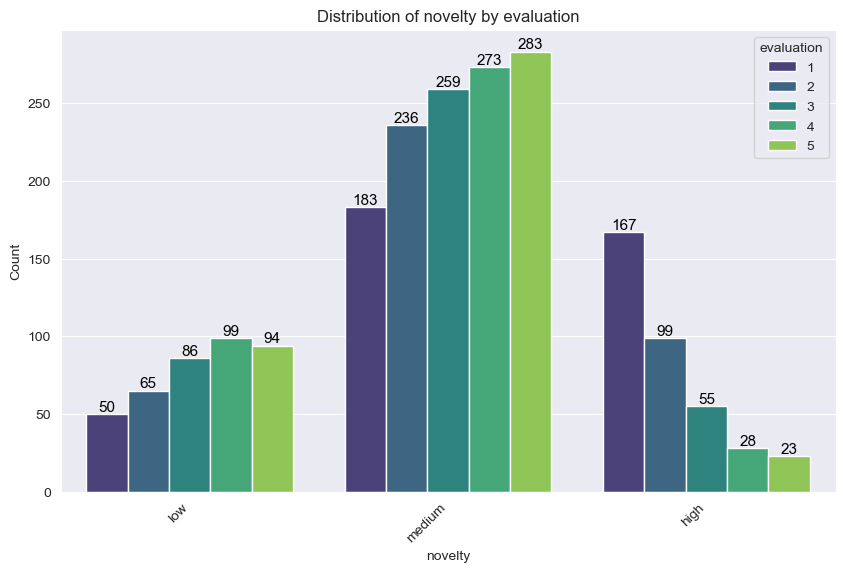

In [5]:
get_stat_significance(df_c19,target_variable='cited' ,categorical_variable='novelty')
plot_categorical_distribution(df_c19, target_variable='cited', categorical_variable="novelty")
get_stat_significance(df_m17,target_variable='evaluation' ,categorical_variable='novelty')
plot_categorical_distribution(df_m17, target_variable="evaluation", categorical_variable="novelty")

Chi-Squared Value: 71.17841884385182
P-value: 3.2633819696507715e-17
There is a significant association between basic_medicine and cited.
---------------------------------------------------------------


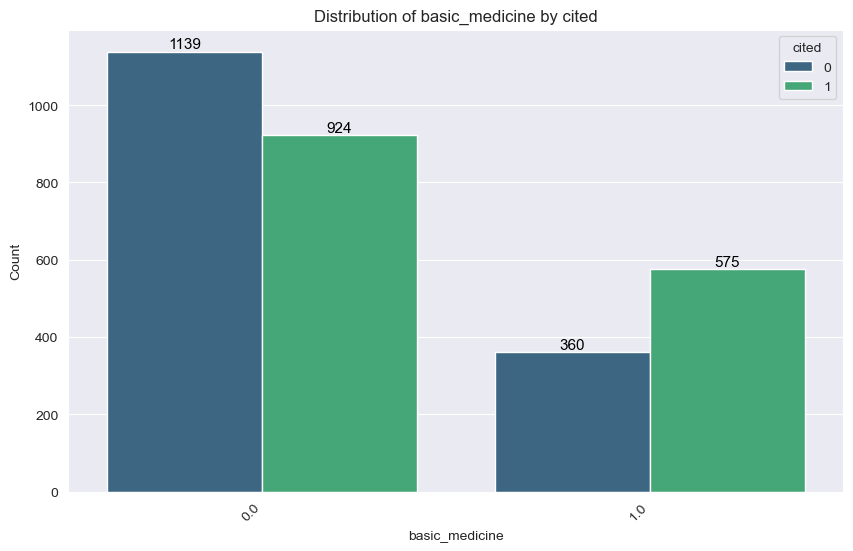

Chi-Squared Value: 197.45258093773413
P-value: 1.3259480087015795e-41
There is a significant association between basic_medicine and evaluation.
---------------------------------------------------------------


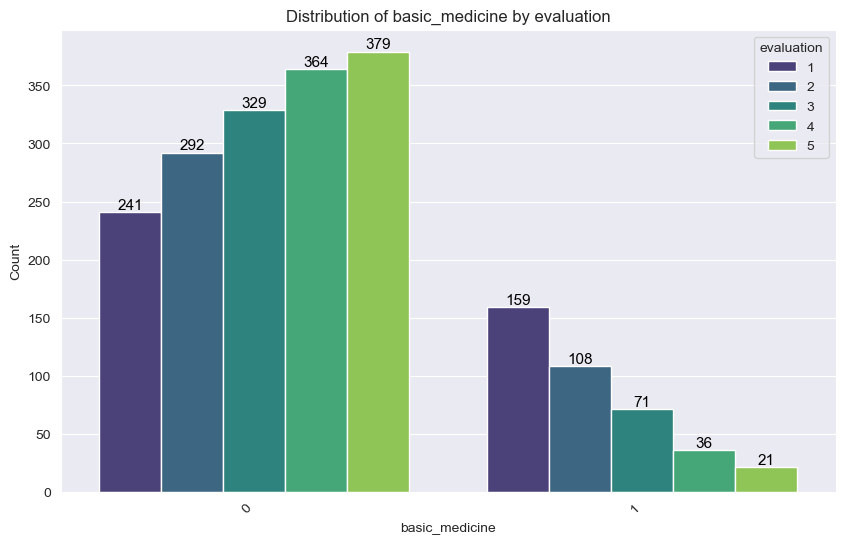

In [5]:
get_stat_significance(df_c19,target_variable='cited' ,categorical_variable='basic_medicine')
plot_categorical_distribution(df_c19, target_variable='cited', categorical_variable="basic_medicine")
get_stat_significance(df_m17,target_variable='evaluation' ,categorical_variable='basic_medicine')
plot_categorical_distribution(df_m17, target_variable="evaluation", categorical_variable="basic_medicine")

Chi-Squared Value: 3.3759664520371784
P-value: 0.0661537695532712
There is no significant association between applied_research and cited
---------------------------------------------------------------


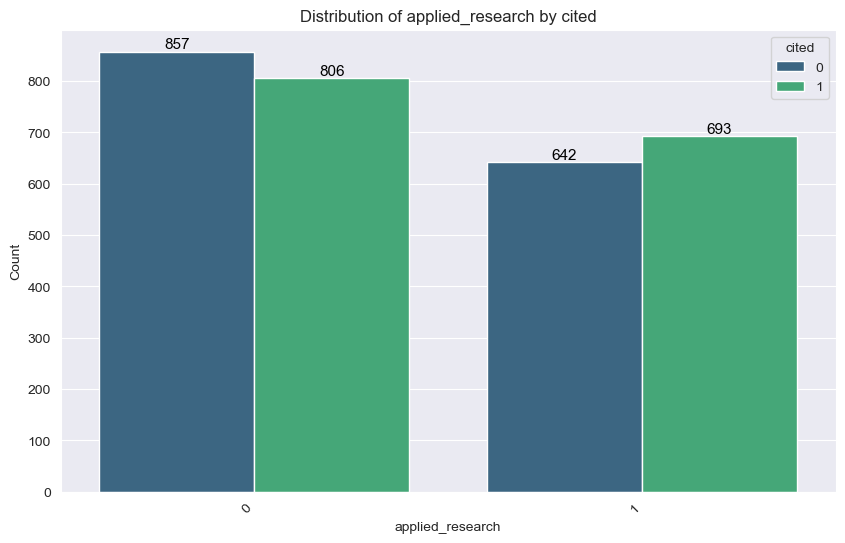

Chi-Squared Value: 48.47412649270234
P-value: 7.516505691881802e-10
There is a significant association between applied_research and evaluation.
---------------------------------------------------------------


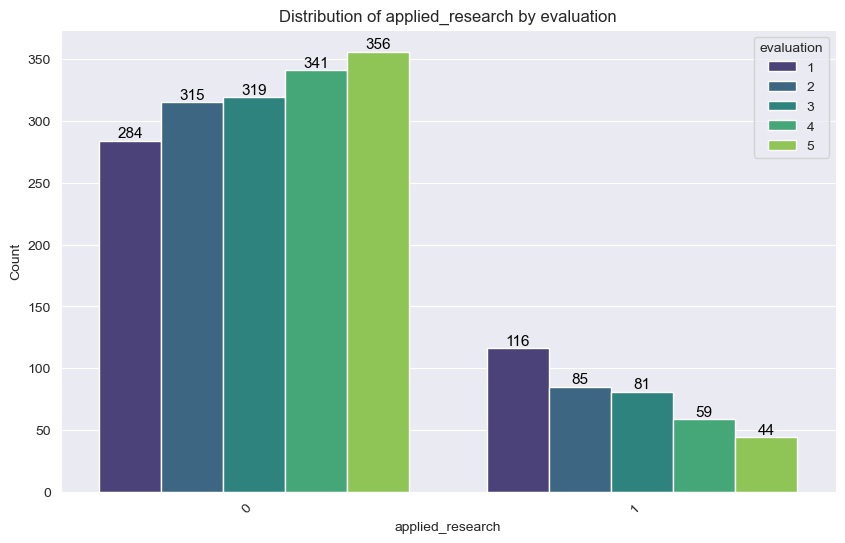

In [6]:
get_stat_significance(df_c19,target_variable='cited' ,categorical_variable='applied_research')
plot_categorical_distribution(df_c19, target_variable='cited', categorical_variable="applied_research")
get_stat_significance(df_m17,target_variable='evaluation' ,categorical_variable='applied_research')
plot_categorical_distribution(df_m17, target_variable="evaluation", categorical_variable="applied_research")

Chi-Squared Value: 0.004461468861983167
P-value: 0.9467455187293435
There is no significant association between grammar and cited
---------------------------------------------------------------


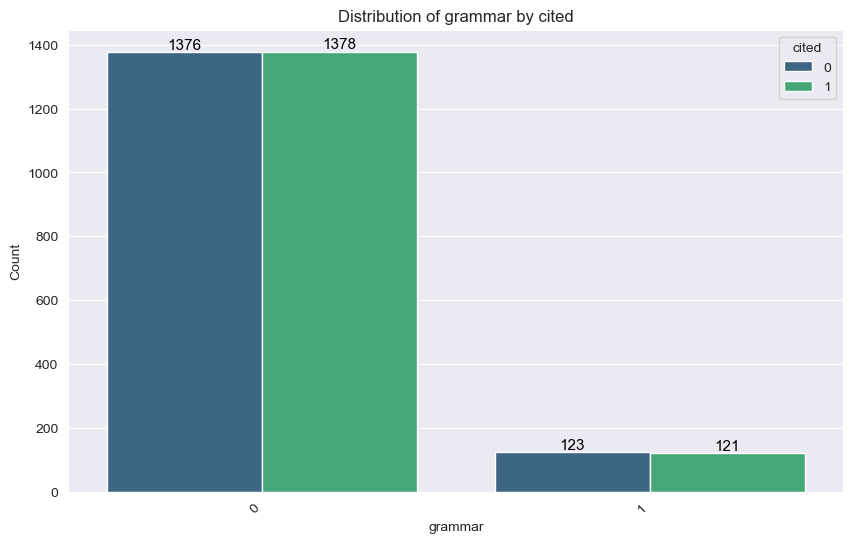

Chi-Squared Value: 96.81421111606593
P-value: 4.686521172253479e-20
There is a significant association between grammar and evaluation.
---------------------------------------------------------------


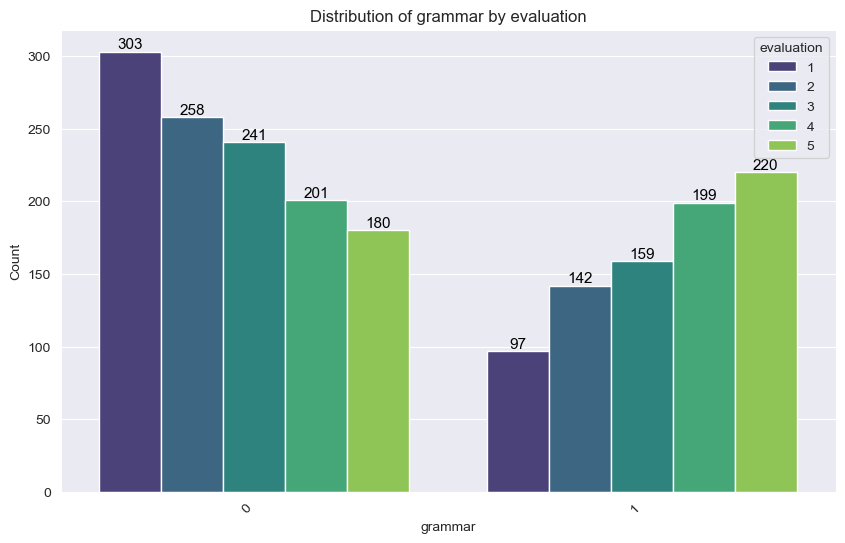

In [7]:
get_stat_significance(df_c19,target_variable='cited' ,categorical_variable='grammar')
plot_categorical_distribution(df_c19, target_variable='cited', categorical_variable="grammar")
get_stat_significance(df_m17,target_variable='evaluation' ,categorical_variable="grammar")
plot_categorical_distribution(df_m17, target_variable="evaluation", categorical_variable="grammar")

Chi-Squared Value: 31.263529091710335
P-value: 1.6263383960153328e-07
There is a significant association between rigor and cited.
---------------------------------------------------------------


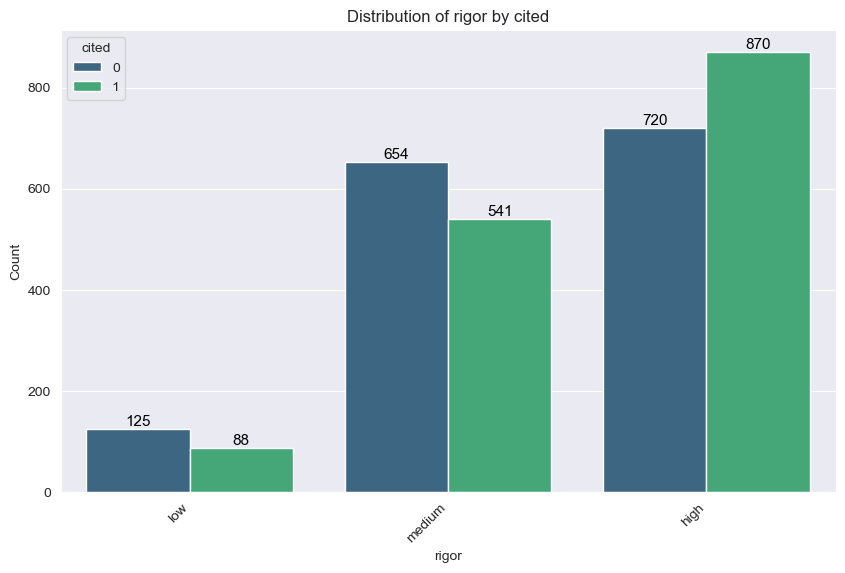

Chi-Squared Value: 350.50105711647814
P-value: 7.0785552881818806e-71
There is a significant association between rigor and evaluation.
---------------------------------------------------------------


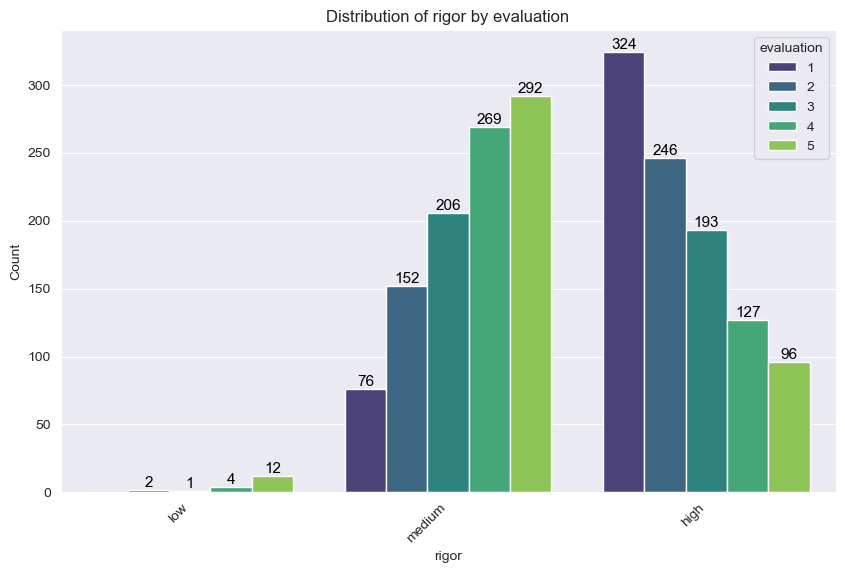

In [8]:
get_stat_significance(df_c19,target_variable='cited' ,categorical_variable='rigor')
plot_categorical_distribution(df_c19, target_variable='cited', categorical_variable="rigor")
get_stat_significance(df_m17,target_variable='evaluation' ,categorical_variable='rigor')
plot_categorical_distribution(df_m17, target_variable="evaluation", categorical_variable="rigor")

Chi-Squared Value: 0.35347598253275114
P-value: 0.5521520254249233
There is no significant association between accessibility and cited
---------------------------------------------------------------


ValueError: cannot convert float NaN to integer

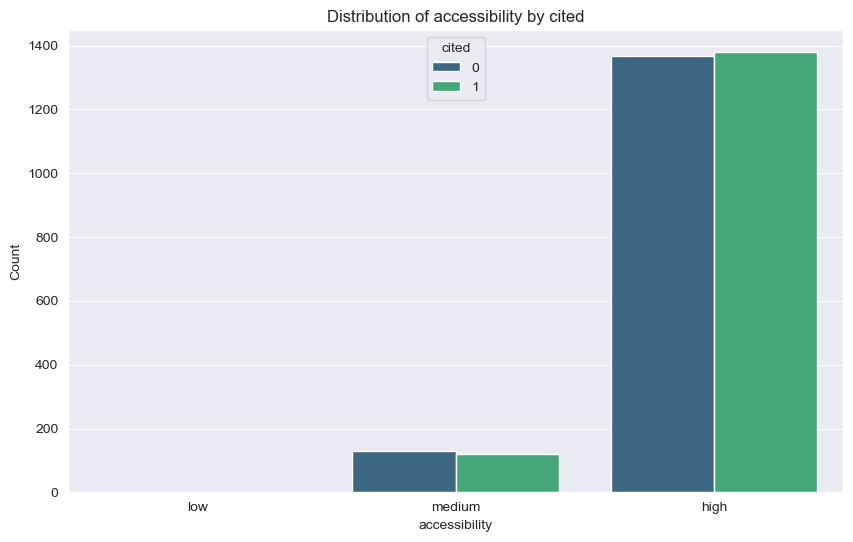

In [9]:
get_stat_significance(df_c19,target_variable='cited' ,categorical_variable='accessibility')
plot_categorical_distribution(df_c19, target_variable='cited', categorical_variable="accessibility")
get_stat_significance(df_m17,target_variable='evaluation' ,categorical_variable='accessibility')
plot_categorical_distribution(df_m17, target_variable="evaluation", categorical_variable="accessibility")

Chi-Squared Value: 12.046424759871933
P-value: 0.1491445134929061
There is no significant association between accessibility and evaluation
---------------------------------------------------------------


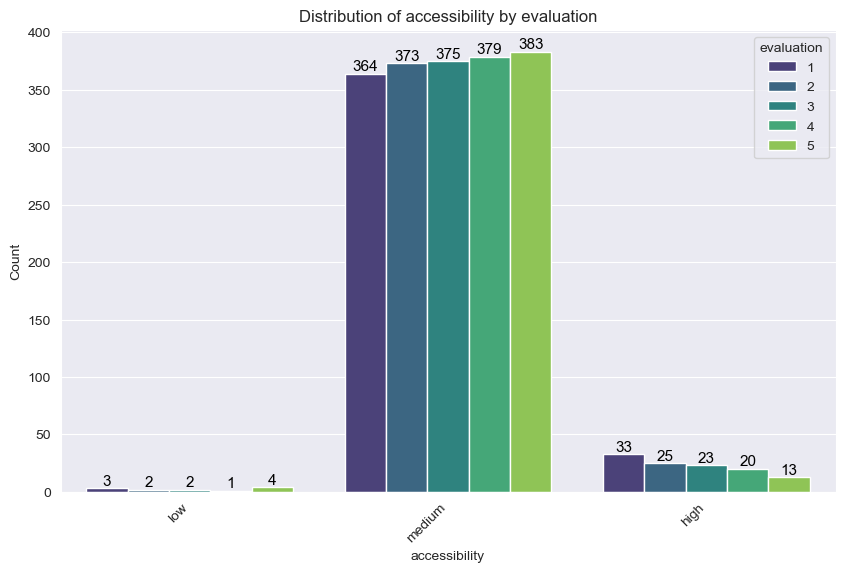

In [10]:
get_stat_significance(df_m17,target_variable='evaluation' ,categorical_variable='accessibility')
plot_categorical_distribution(df_m17, target_variable="evaluation", categorical_variable="accessibility")

In [ ]:
df_c19['replicability'].value_counts()

Chi-Squared Value: 1.732701061356362
P-value: 0.1880663143327544
There is no significant association between replicability and cited
---------------------------------------------------------------


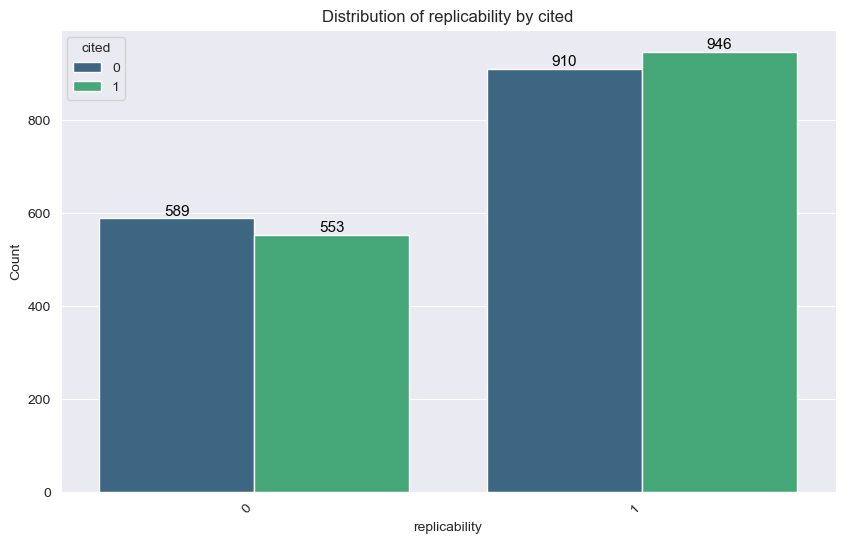

Chi-Squared Value: 207.7815894147755
P-value: 7.971471796954154e-44
There is a significant association between replicability and evaluation.
---------------------------------------------------------------


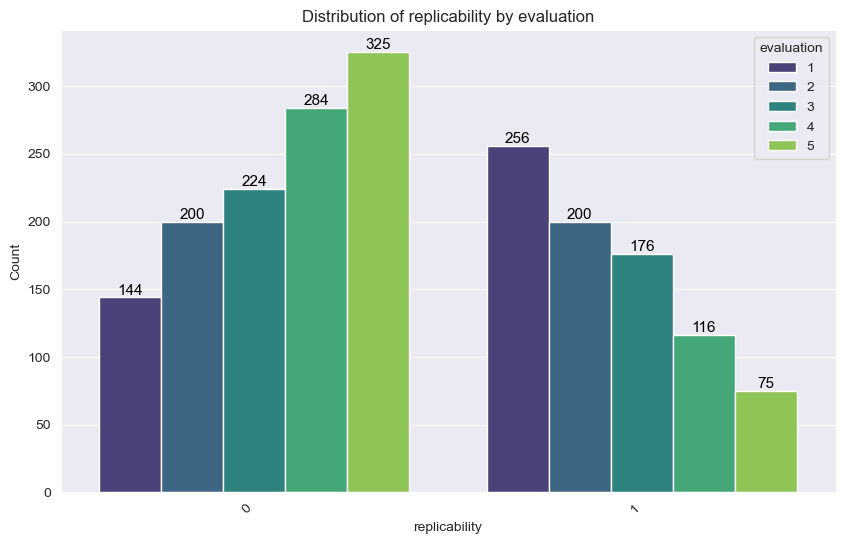

In [11]:
get_stat_significance(df_c19, target_variable='cited' ,categorical_variable='replicability')
plot_categorical_distribution(df_c19, target_variable='cited', categorical_variable="replicability")
get_stat_significance(df_m17,target_variable='evaluation' ,categorical_variable='replicability')
plot_categorical_distribution(df_m17, target_variable="evaluation", categorical_variable="replicability")

In [ ]:
# for col in df.columns:
#     get_stat_significance(col)

In [ ]:
df_m17.head()

now in rigor
Chi-Squared Value: 31.263529091710335
P-value: 1.6263383960153328e-07
There is a significant association between rigor and cited.
---------------------------------------------------------------


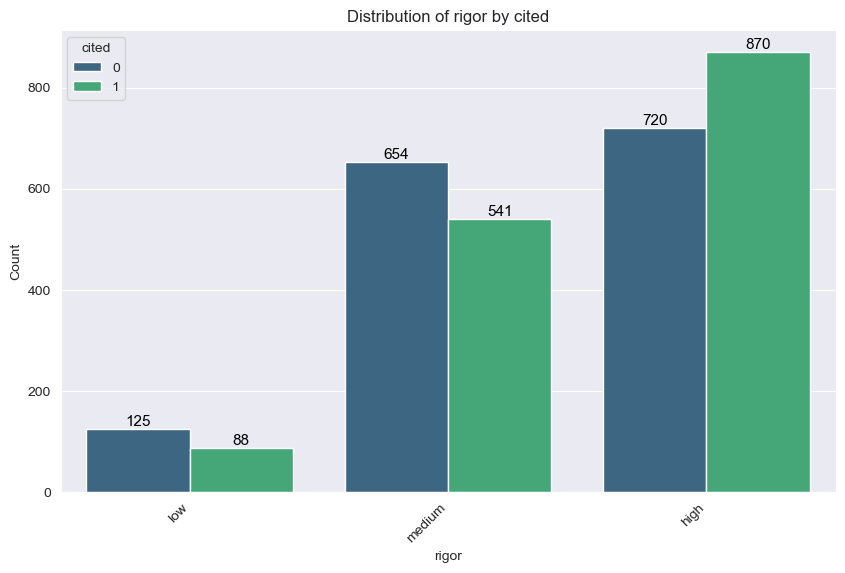

now in novelty
Chi-Squared Value: 14.120297099124466
P-value: 0.0008586505323392688
There is a significant association between novelty and cited.
---------------------------------------------------------------


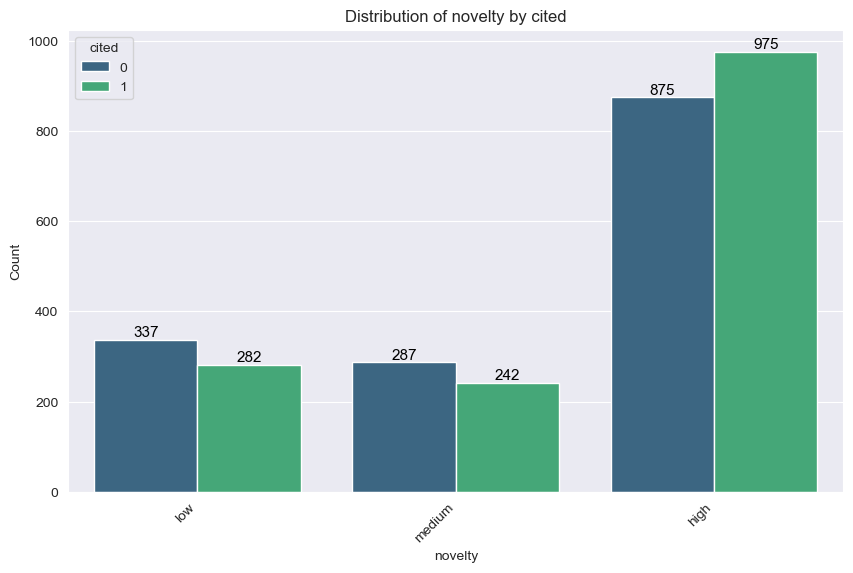

now in grammar
Chi-Squared Value: 0.004461468861983167
P-value: 0.9467455187293435
There is no significant association between grammar and cited
---------------------------------------------------------------


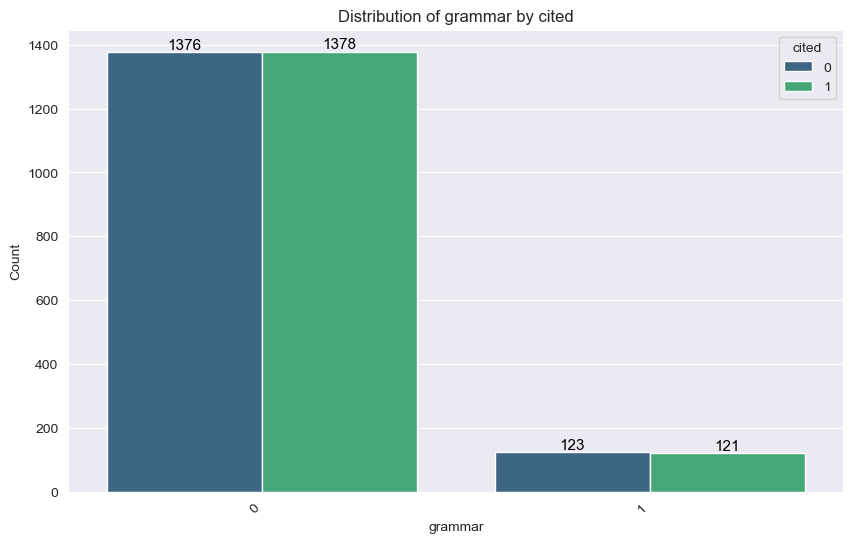

now in replicability
Chi-Squared Value: 1.732701061356362
P-value: 0.1880663143327544
There is no significant association between replicability and cited
---------------------------------------------------------------


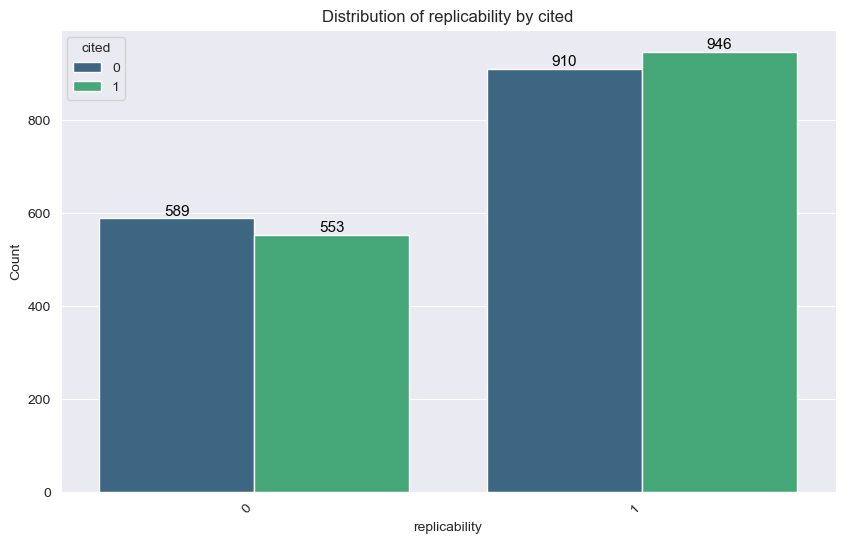

now in accessibility
Chi-Squared Value: 0.35347598253275114
P-value: 0.5521520254249233
There is no significant association between accessibility and cited
---------------------------------------------------------------
now in mathematics
Chi-Squared Value: 7.728430134680135
P-value: 0.005435799120309172
There is a significant association between mathematics and cited.
---------------------------------------------------------------


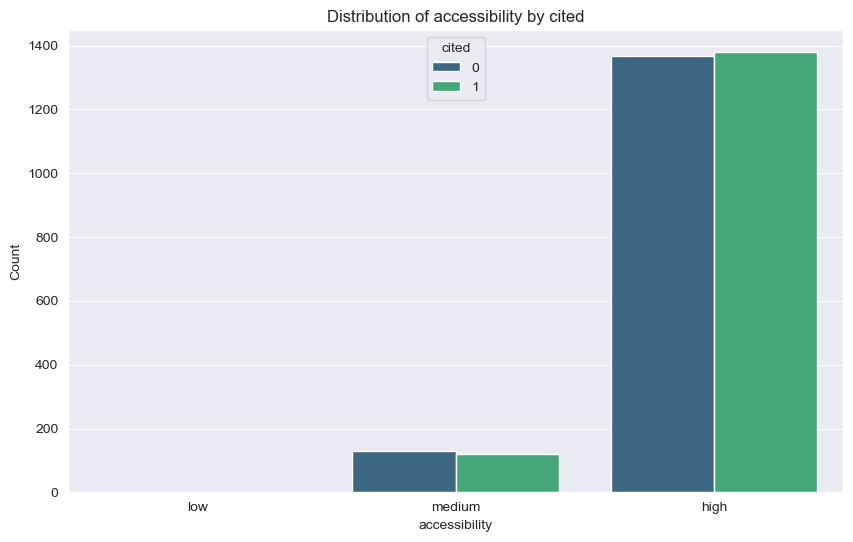

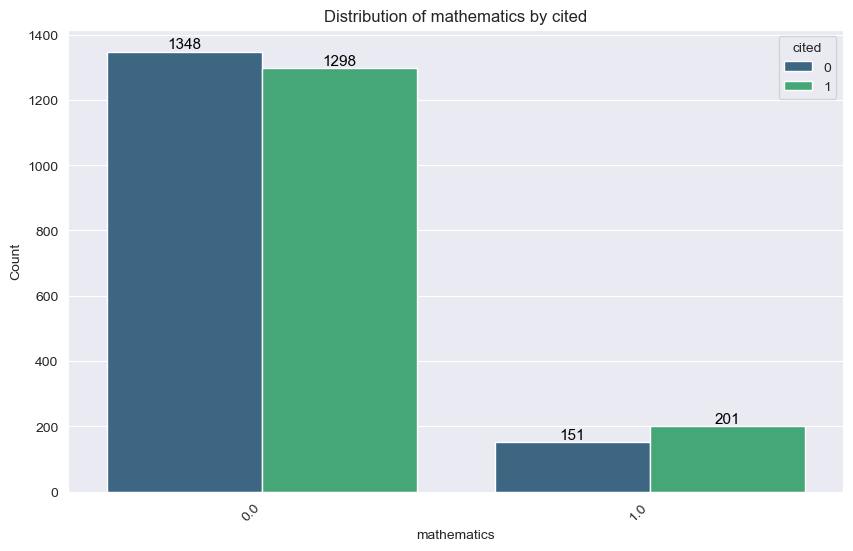

now in computer_sciences
Chi-Squared Value: 20.84991311748012
P-value: 4.967147887614575e-06
There is a significant association between computer_sciences and cited.
---------------------------------------------------------------


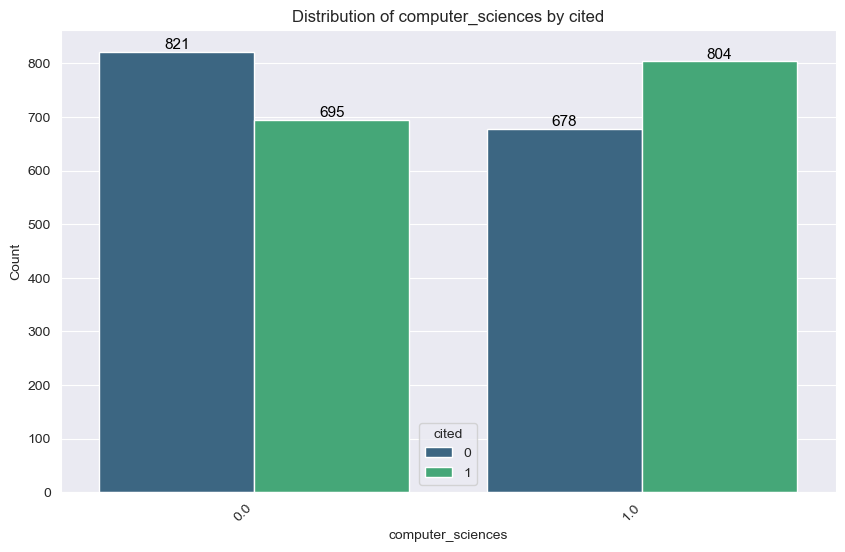

now in physical_sciences
Chi-Squared Value: 46.78514756456424
P-value: 7.921146558572942e-12
There is a significant association between physical_sciences and cited.
---------------------------------------------------------------


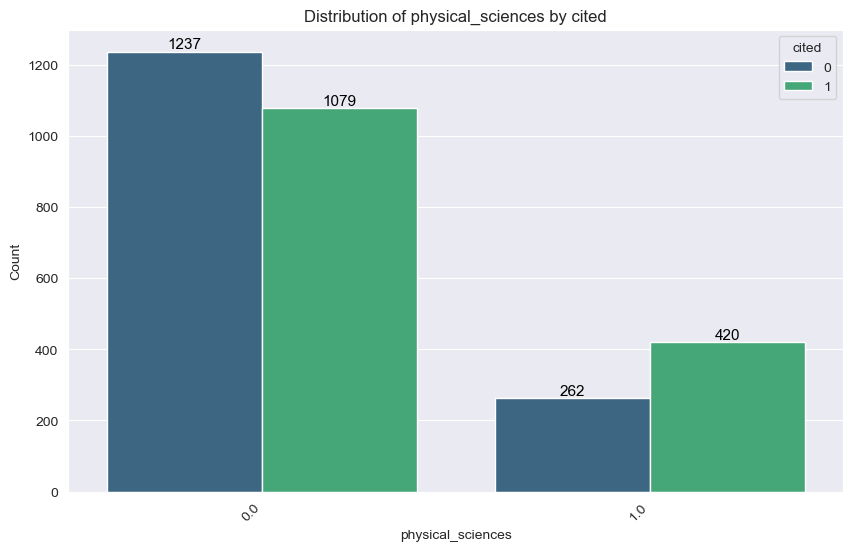

now in chemical_sciences
Chi-Squared Value: 59.82944174969782
P-value: 1.0344426359606074e-14
There is a significant association between chemical_sciences and cited.
---------------------------------------------------------------


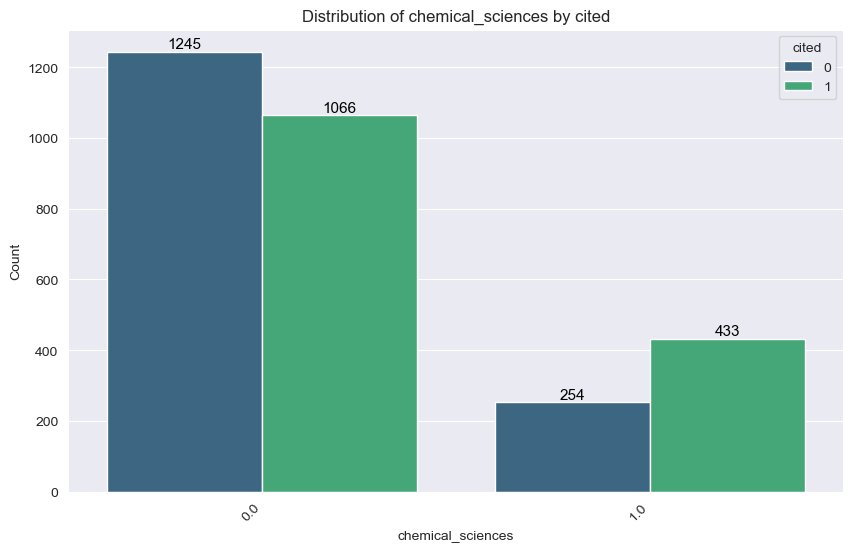

now in earth_and_related_sciences
Chi-Squared Value: 29.777345980044927
P-value: 4.846219278452379e-08
There is a significant association between earth_and_related_sciences and cited.
---------------------------------------------------------------


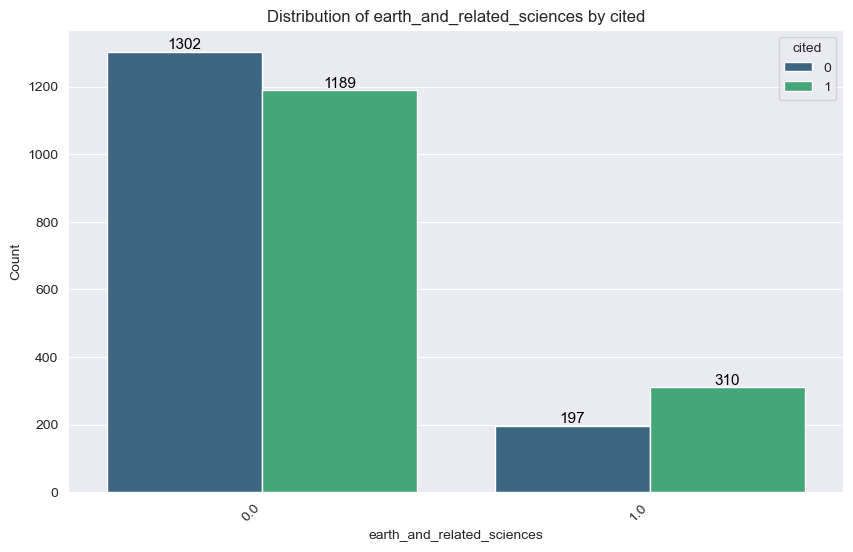

now in biological_sciences
Chi-Squared Value: 62.78159228387263
P-value: 2.3094724156967886e-15
There is a significant association between biological_sciences and cited.
---------------------------------------------------------------


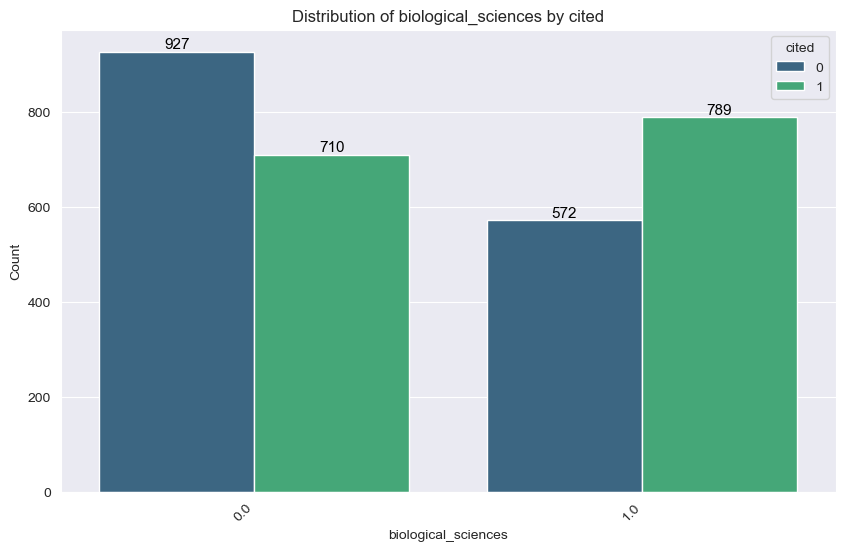

now in other_natural_sciences
Chi-Squared Value: 31.50323165238871
P-value: 1.9910860856943468e-08
There is a significant association between other_natural_sciences and cited.
---------------------------------------------------------------


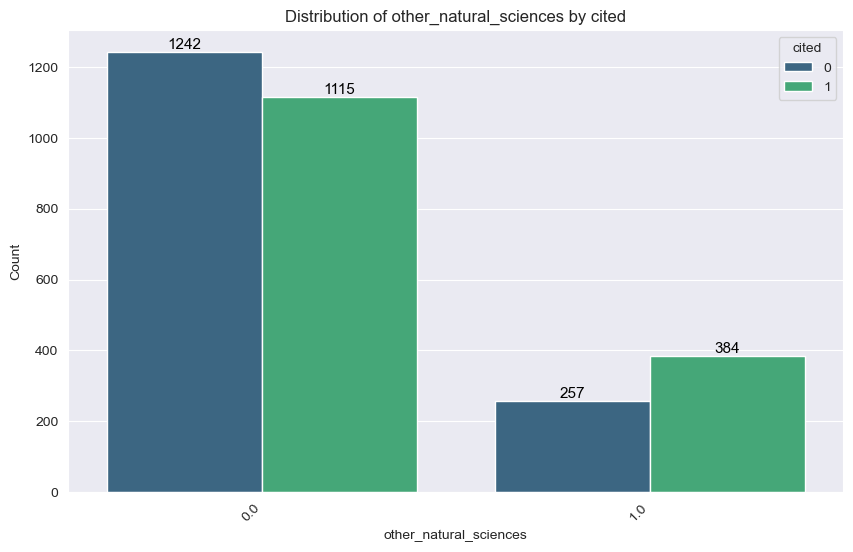

now in civil_engineering
Chi-Squared Value: 5.384970674486803
P-value: 0.020310929535942168
There is a significant association between civil_engineering and cited.
---------------------------------------------------------------


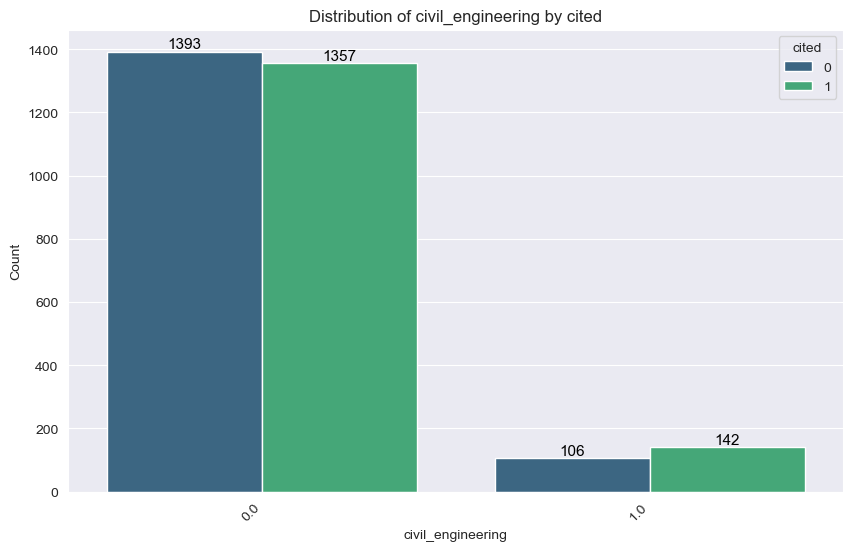

now in electrical_engineering
Chi-Squared Value: 3.798470934765659
P-value: 0.05129940965875685
There is no significant association between electrical_engineering and cited
---------------------------------------------------------------


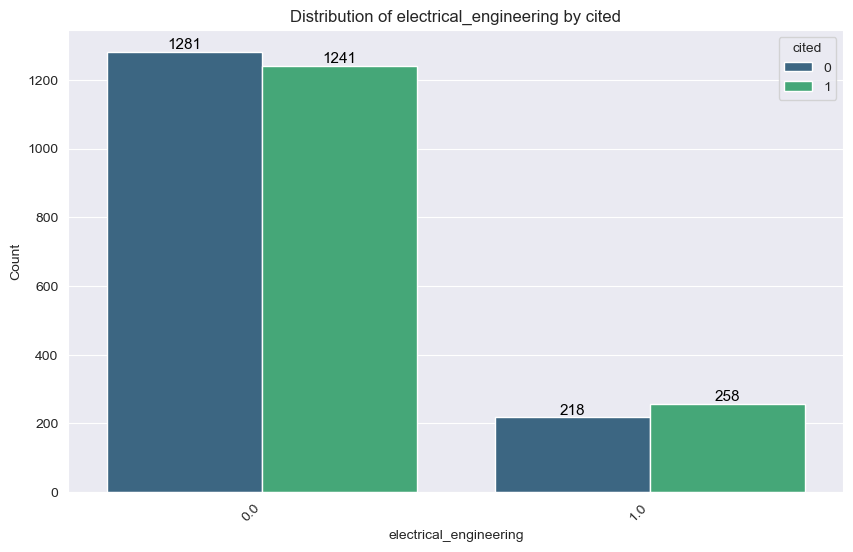

now in mechanical_engineering
Chi-Squared Value: 20.384647259138717
P-value: 6.333588441014675e-06
There is a significant association between mechanical_engineering and cited.
---------------------------------------------------------------


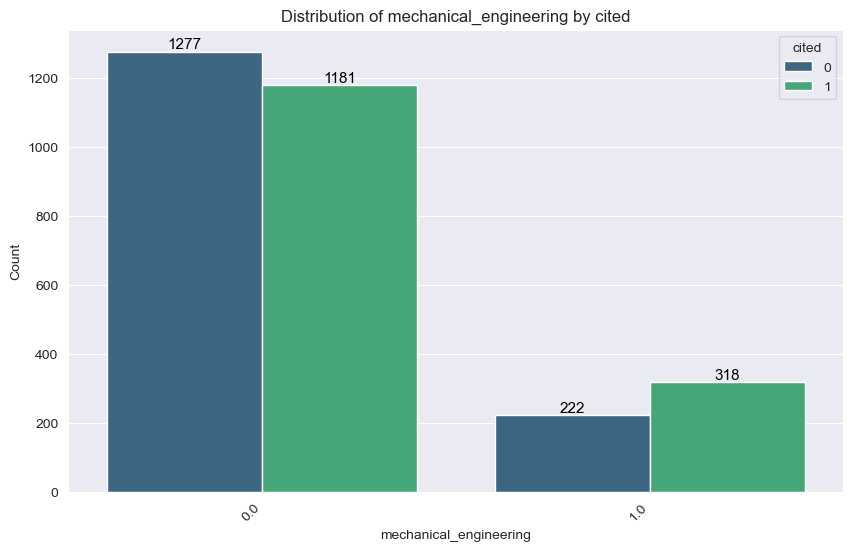

now in chemical_engineering
Chi-Squared Value: 32.94738157322903
P-value: 9.468718878426198e-09
There is a significant association between chemical_engineering and cited.
---------------------------------------------------------------


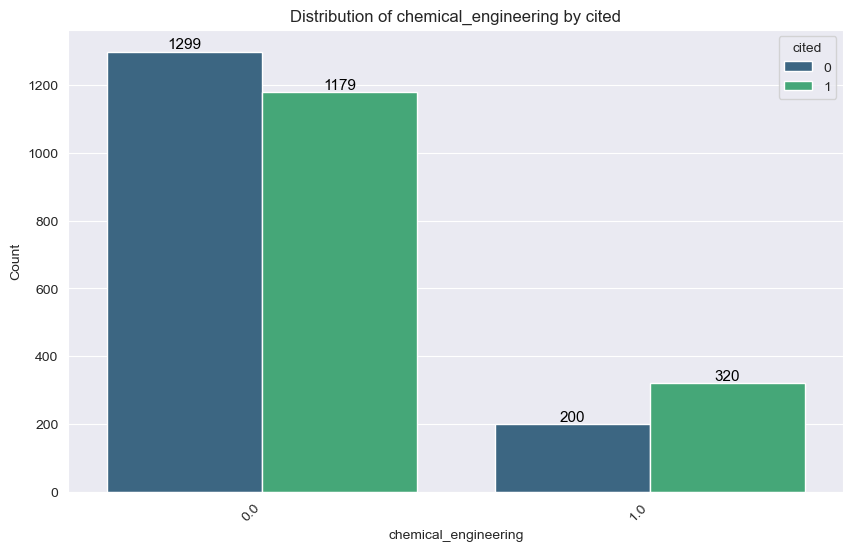

now in materials_engineering
Chi-Squared Value: 6.551389367761049
P-value: 0.010480229018045831
There is a significant association between materials_engineering and cited.
---------------------------------------------------------------


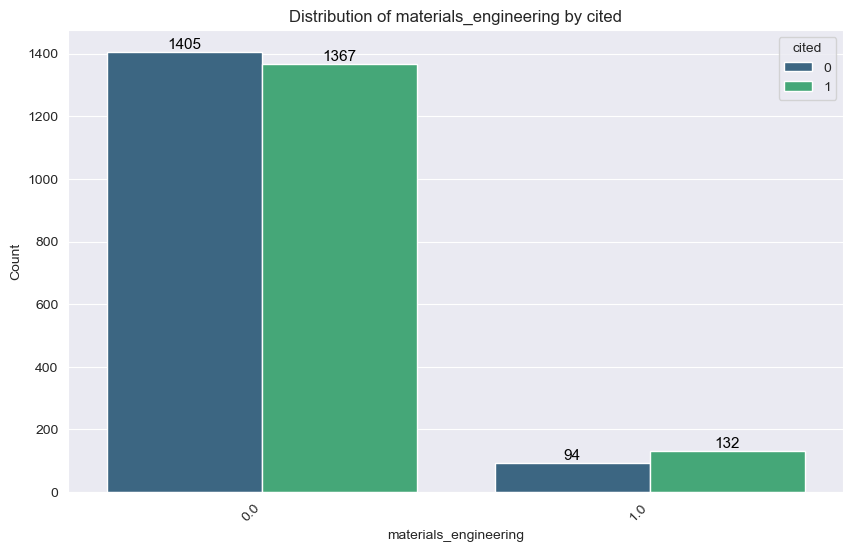

now in environmental_engineering
Chi-Squared Value: 8.102899344872469
P-value: 0.004419450943697625
There is a significant association between environmental_engineering and cited.
---------------------------------------------------------------


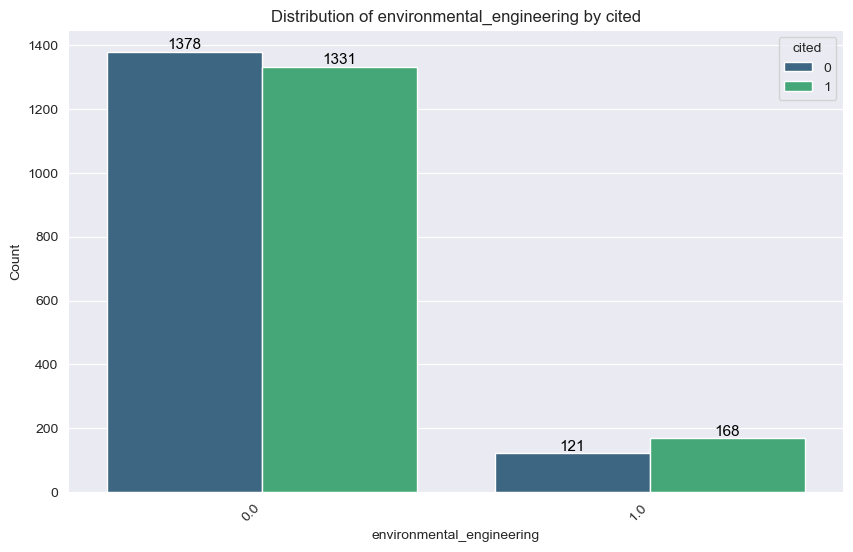

now in evironmental_biotechnology
Chi-Squared Value: 25.112479056269272
P-value: 5.408174178301265e-07
There is a significant association between evironmental_biotechnology and cited.
---------------------------------------------------------------


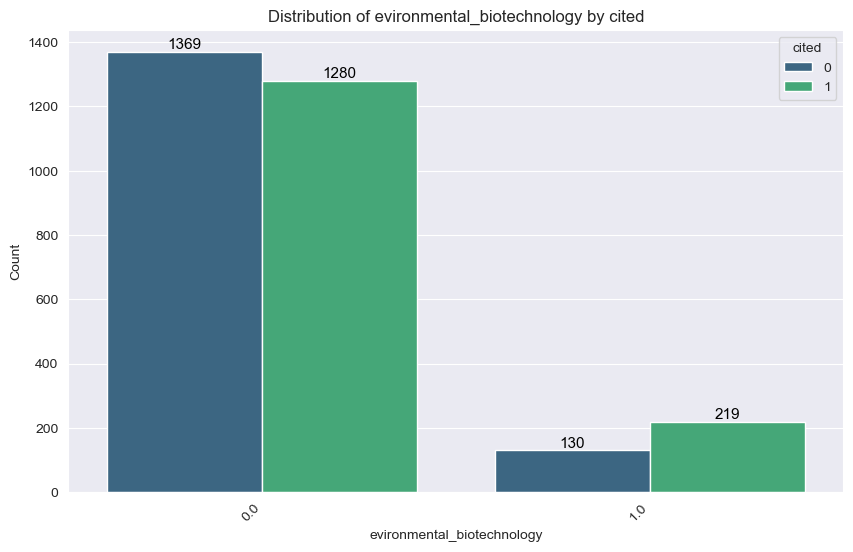

now in industrial_biotechnology
Chi-Squared Value: 33.197081692996534
P-value: 8.327541718460591e-09
There is a significant association between industrial_biotechnology and cited.
---------------------------------------------------------------


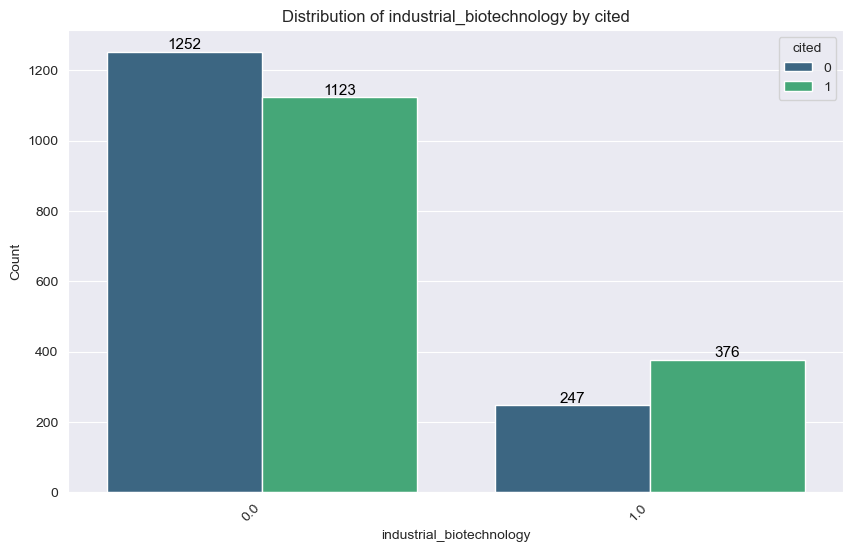

now in nano-technology
Chi-Squared Value: 6.493591489859529
P-value: 0.010826403654746542
There is a significant association between nano-technology and cited.
---------------------------------------------------------------


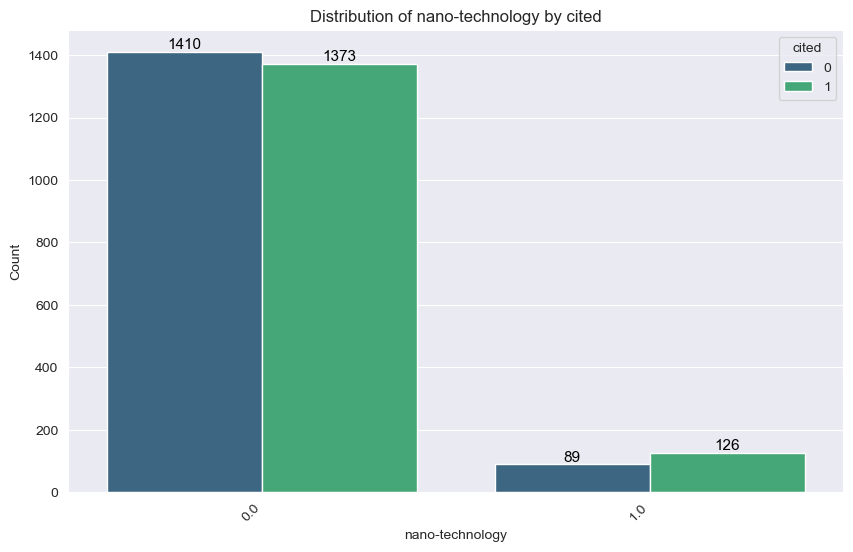

now in other_engineering_and_technologies
Chi-Squared Value: 3.0501733046172923
P-value: 0.08072852808452795
There is no significant association between other_engineering_and_technologies and cited
---------------------------------------------------------------


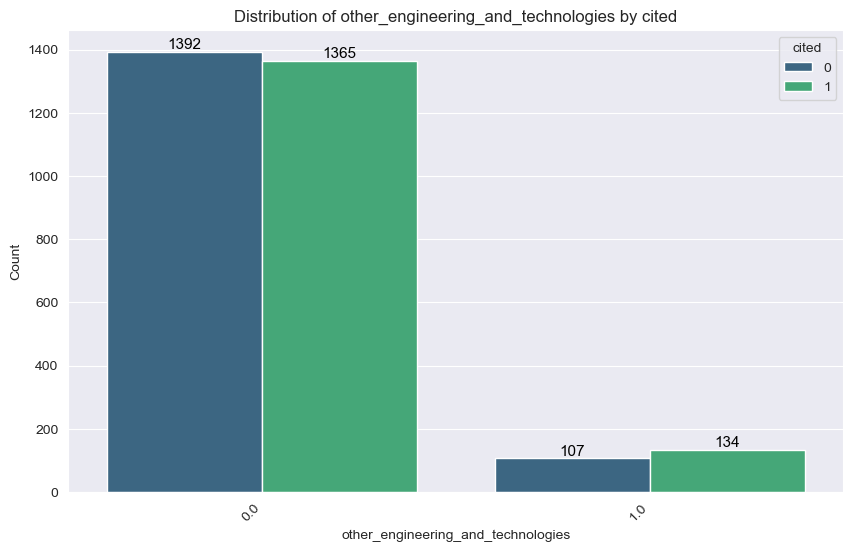

now in basic_medicine
Chi-Squared Value: 71.17841884385182
P-value: 3.2633819696507715e-17
There is a significant association between basic_medicine and cited.
---------------------------------------------------------------


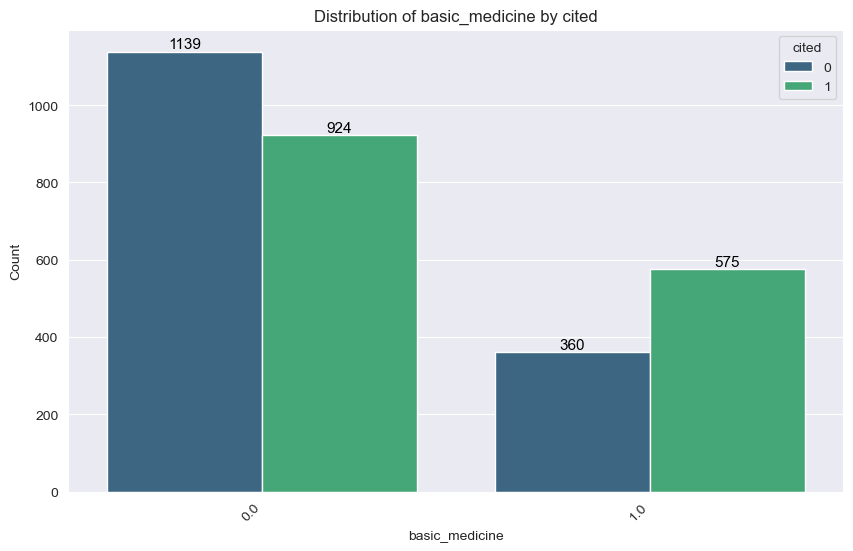

now in clinical_medicine
Chi-Squared Value: 16.386800407035906
P-value: 5.1643619203403903e-05
There is a significant association between clinical_medicine and cited.
---------------------------------------------------------------


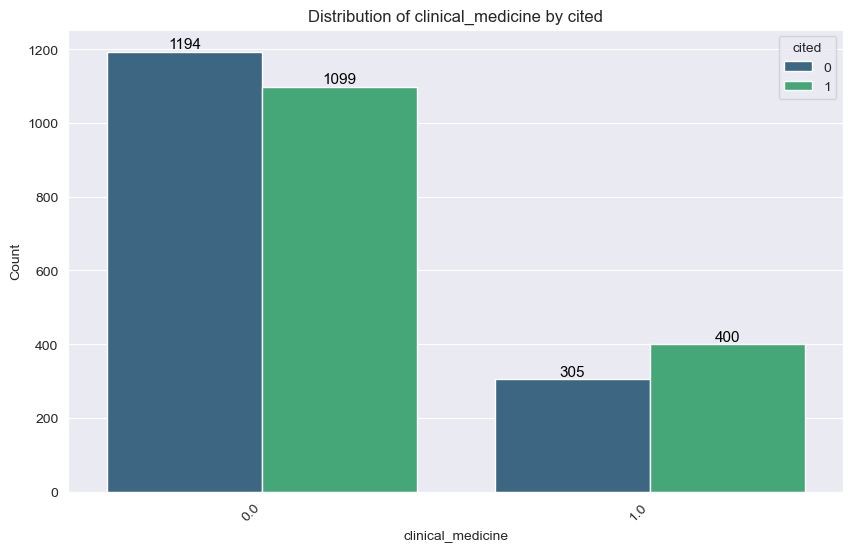

now in health_sciences
Chi-Squared Value: 8.449239435737798
P-value: 0.0036519613227176777
There is a significant association between health_sciences and cited.
---------------------------------------------------------------


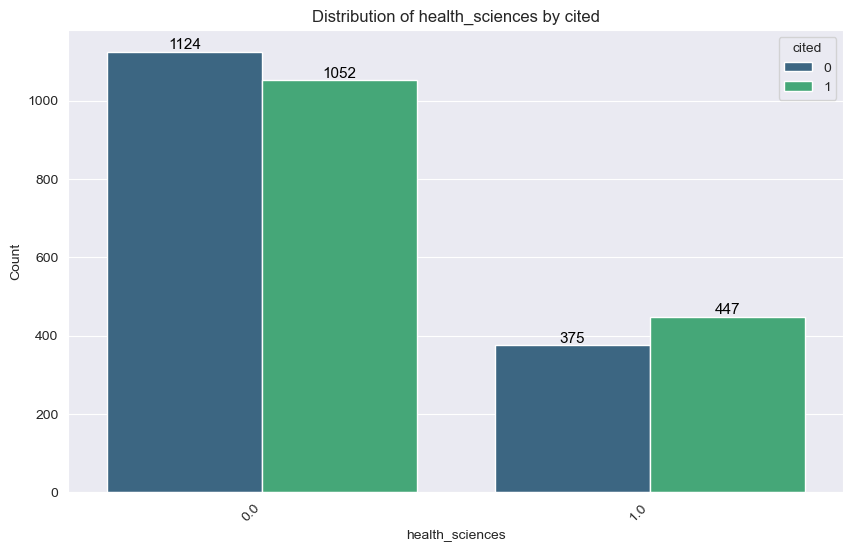

now in medical_biotechnology
Chi-Squared Value: 23.556488262410088
P-value: 1.212997020405208e-06
There is a significant association between medical_biotechnology and cited.
---------------------------------------------------------------


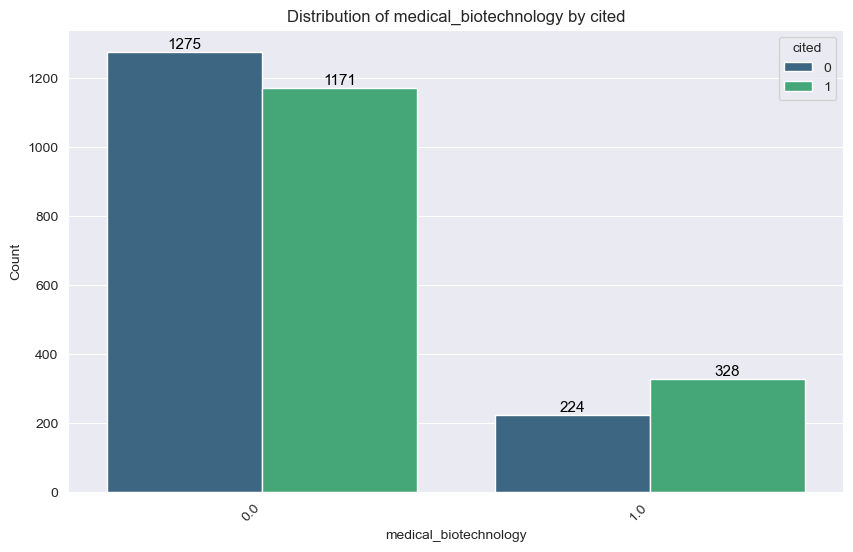

now in other_medical_sciences
Chi-Squared Value: 23.97648473695145
P-value: 9.751951295315822e-07
There is a significant association between other_medical_sciences and cited.
---------------------------------------------------------------


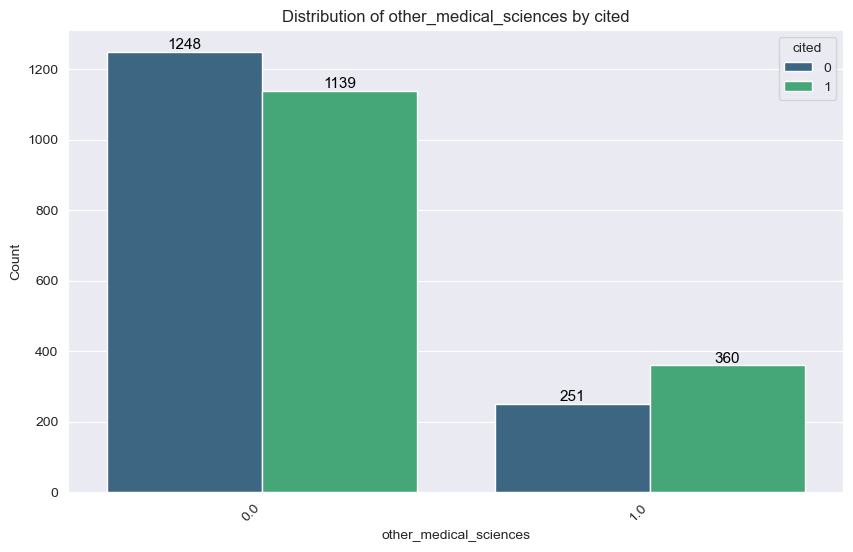

now in agriculture_forestry_and_fisheries
Chi-Squared Value: 33.90726570474738
P-value: 5.78024357540128e-09
There is a significant association between agriculture_forestry_and_fisheries and cited.
---------------------------------------------------------------


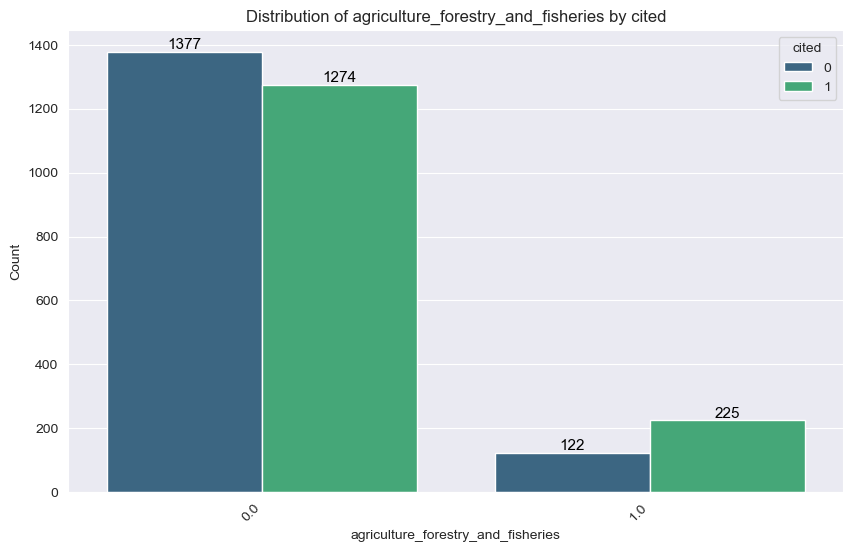

now in animal_and_dairy_science
Chi-Squared Value: 43.38974106838451
P-value: 4.485335395623643e-11
There is a significant association between animal_and_dairy_science and cited.
---------------------------------------------------------------


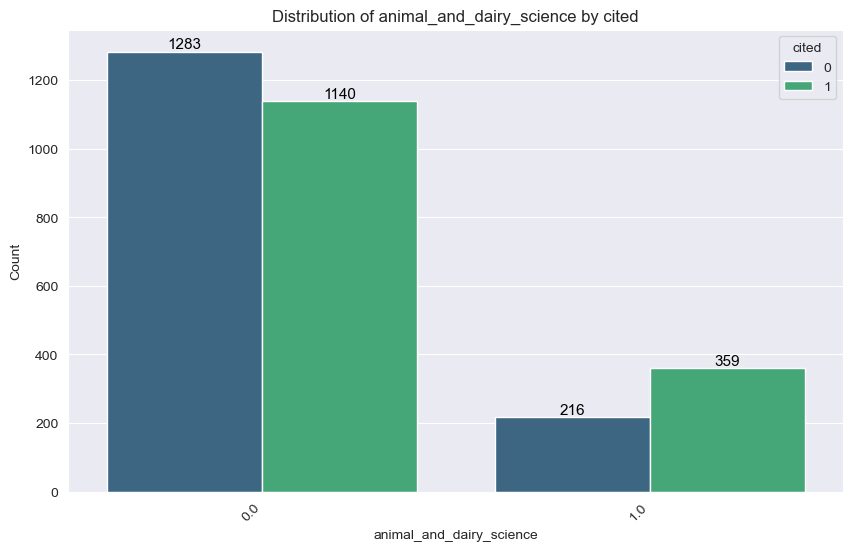

now in veterinary_science
Chi-Squared Value: 51.18677480381166
P-value: 8.398252997817666e-13
There is a significant association between veterinary_science and cited.
---------------------------------------------------------------


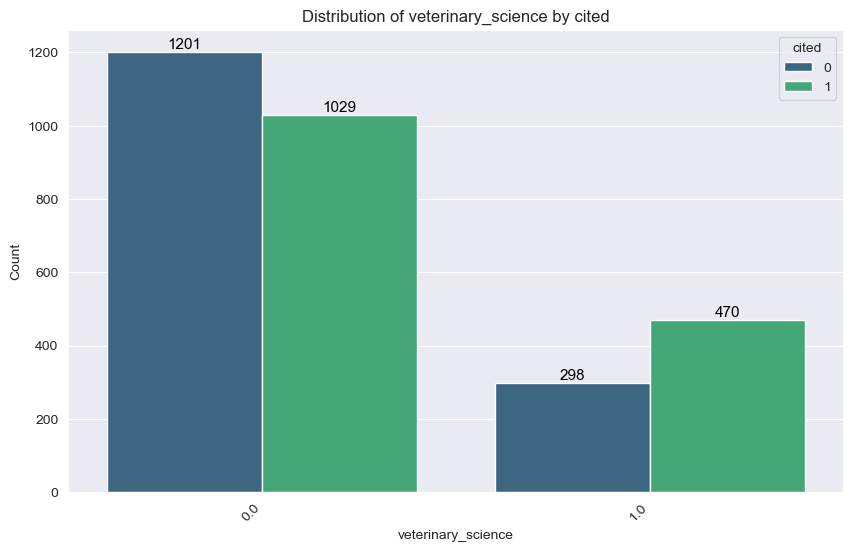

now in agricultural_biotechnology
Chi-Squared Value: 8.596793071161049
P-value: 0.0033675548168735758
There is a significant association between agricultural_biotechnology and cited.
---------------------------------------------------------------


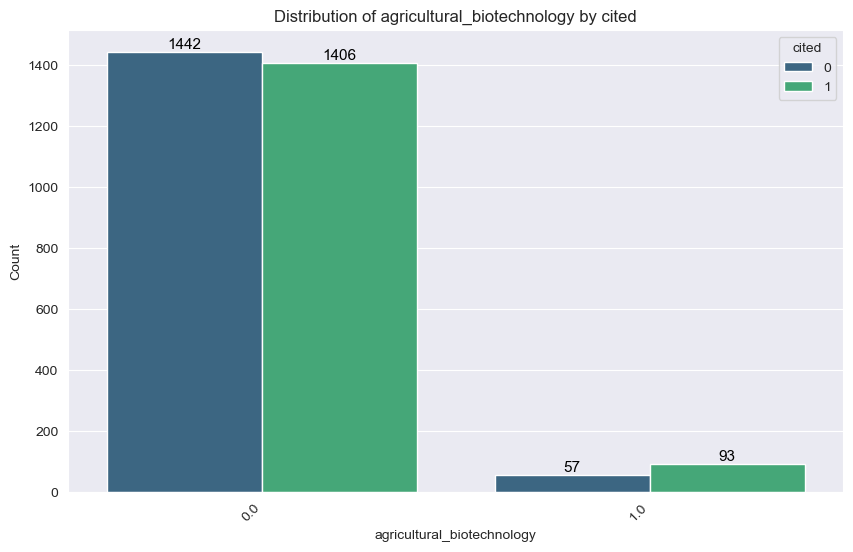

now in other_agricultural_sciences
Chi-Squared Value: 12.39537204089443
P-value: 0.00043039923263464764
There is a significant association between other_agricultural_sciences and cited.
---------------------------------------------------------------


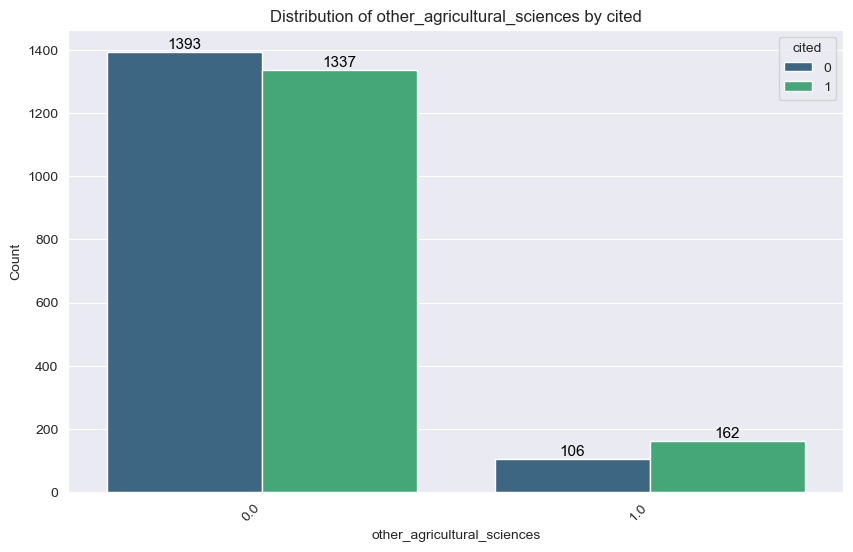

now in psychology
Chi-Squared Value: 9.677048280259289
P-value: 0.0018658414291885578
There is a significant association between psychology and cited.
---------------------------------------------------------------


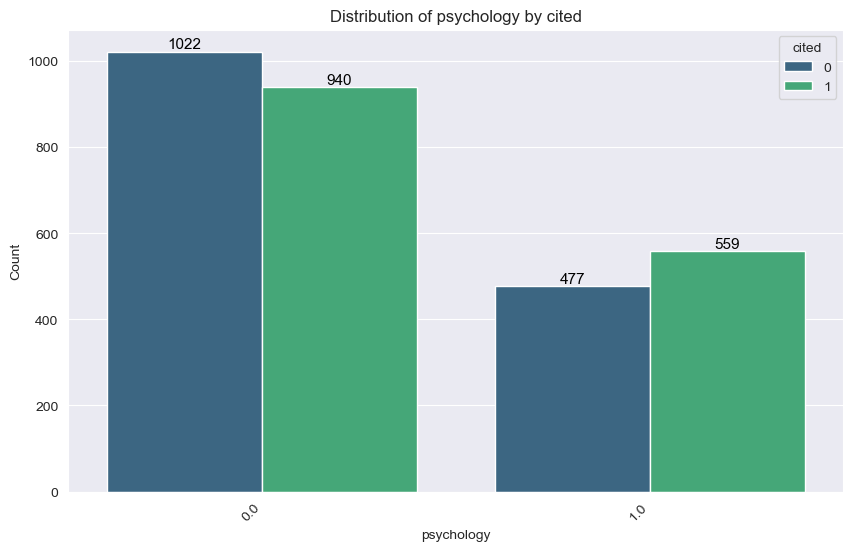

now in economics_and_business
Chi-Squared Value: 0.0025679240757871657
P-value: 0.9595847462123431
There is no significant association between economics_and_business and cited
---------------------------------------------------------------


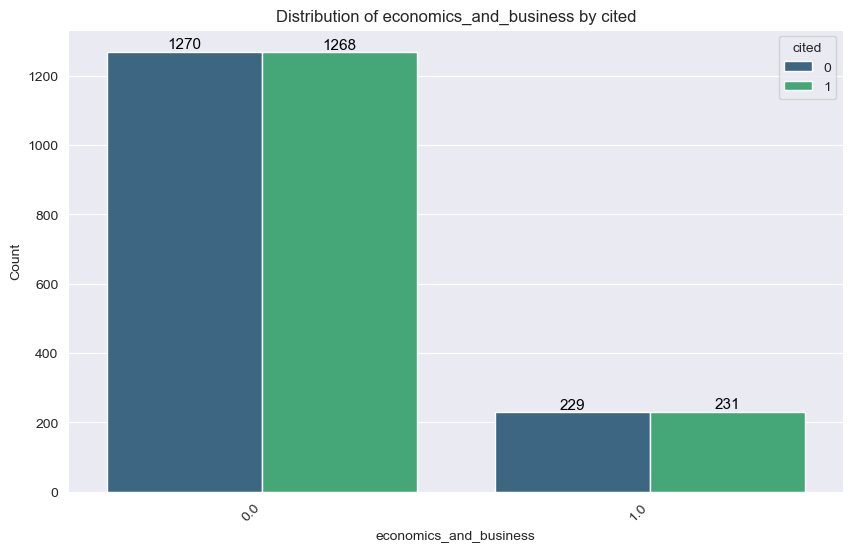

now in education
Chi-Squared Value: 2.430864884103751
P-value: 0.11896724395481026
There is no significant association between education and cited
---------------------------------------------------------------


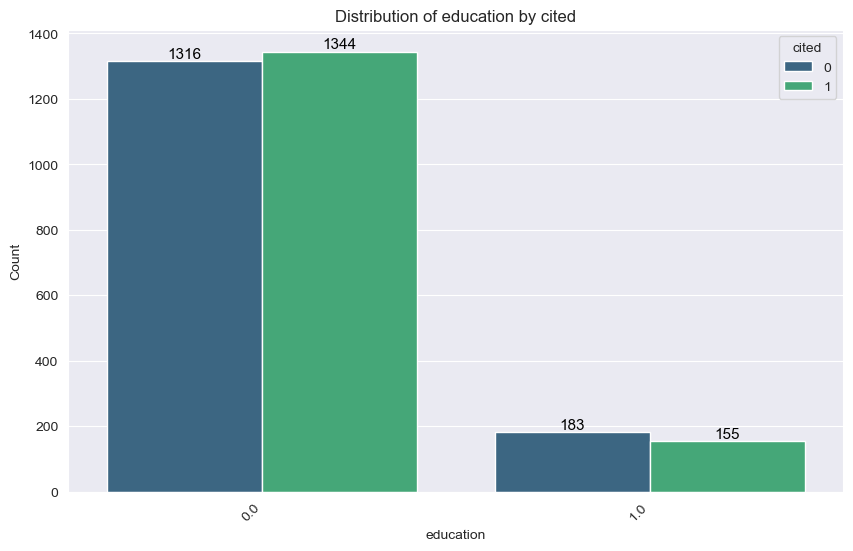

now in sociology
Chi-Squared Value: 0.007696548554939635
P-value: 0.930091294677
There is no significant association between sociology and cited
---------------------------------------------------------------


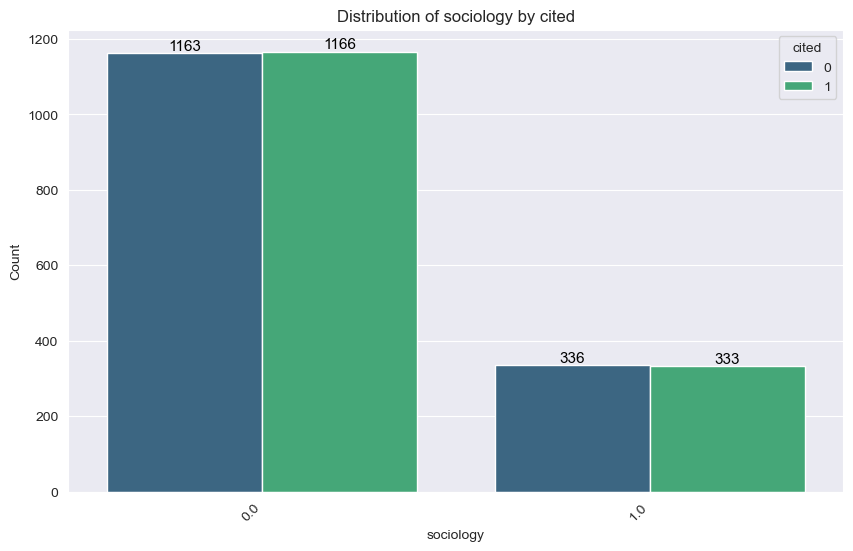

now in law
Chi-Squared Value: 6.010954239861201
P-value: 0.014217337004710687
There is a significant association between law and cited.
---------------------------------------------------------------


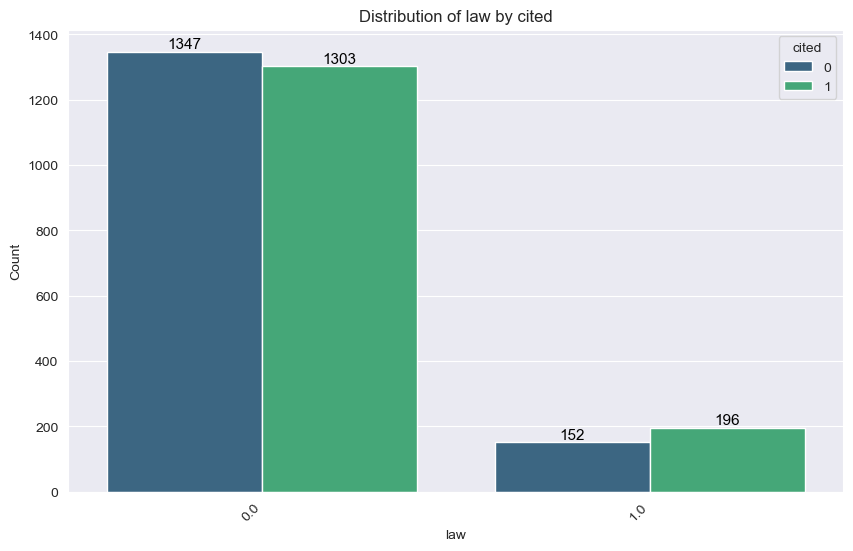

now in political_science
Chi-Squared Value: 0.44120871762494906
P-value: 0.5065396350949756
There is no significant association between political_science and cited
---------------------------------------------------------------


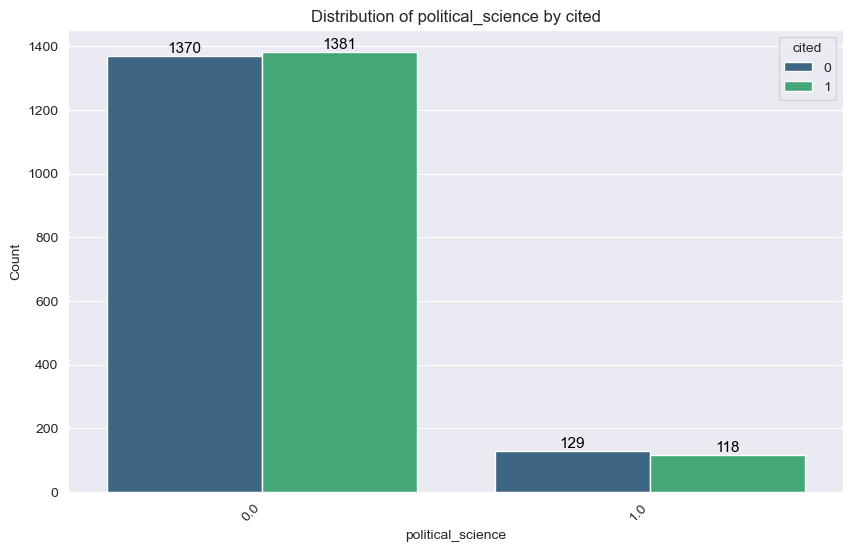

now in social_and_economic_geography
Chi-Squared Value: 0.17733786175178812
P-value: 0.6736710927369942
There is no significant association between social_and_economic_geography and cited
---------------------------------------------------------------


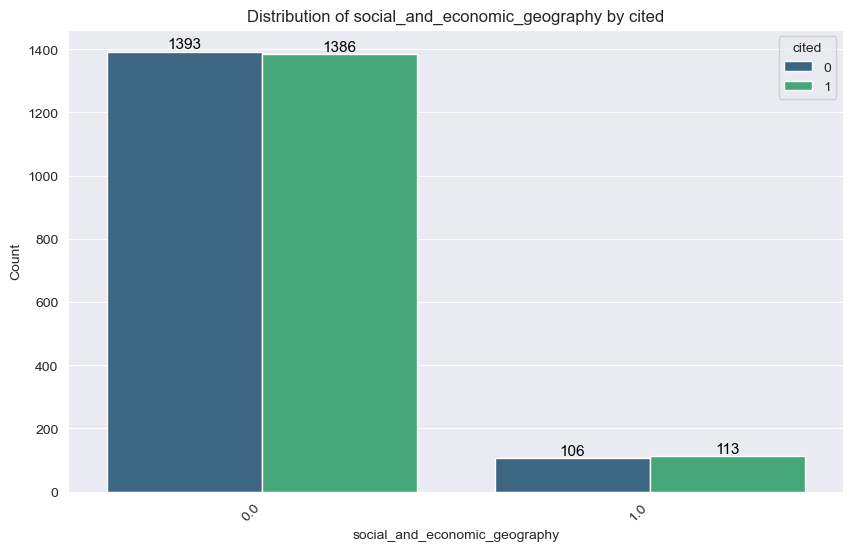

now in media_and_communications
Chi-Squared Value: 0.9792074016139927
P-value: 0.32239456429700736
There is no significant association between media_and_communications and cited
---------------------------------------------------------------


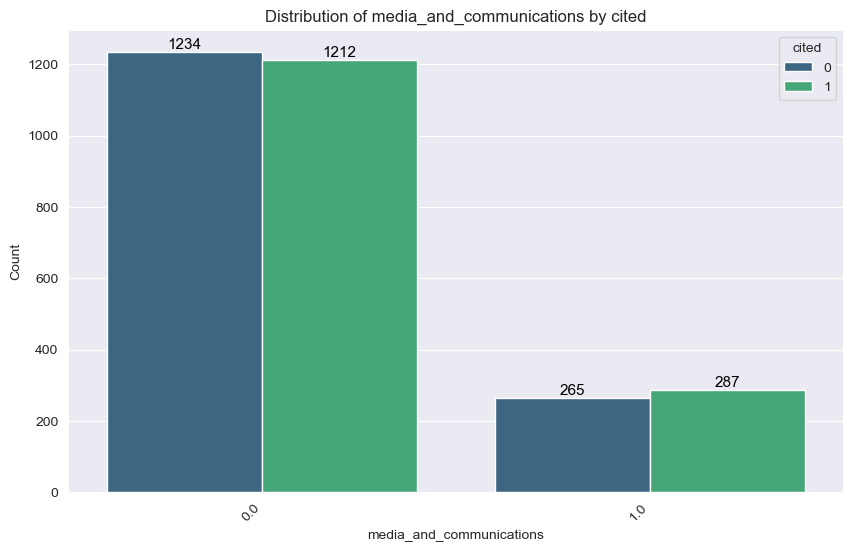

now in other_social_sciences
Chi-Squared Value: 2.0698562492020938
P-value: 0.15023568127802642
There is no significant association between other_social_sciences and cited
---------------------------------------------------------------


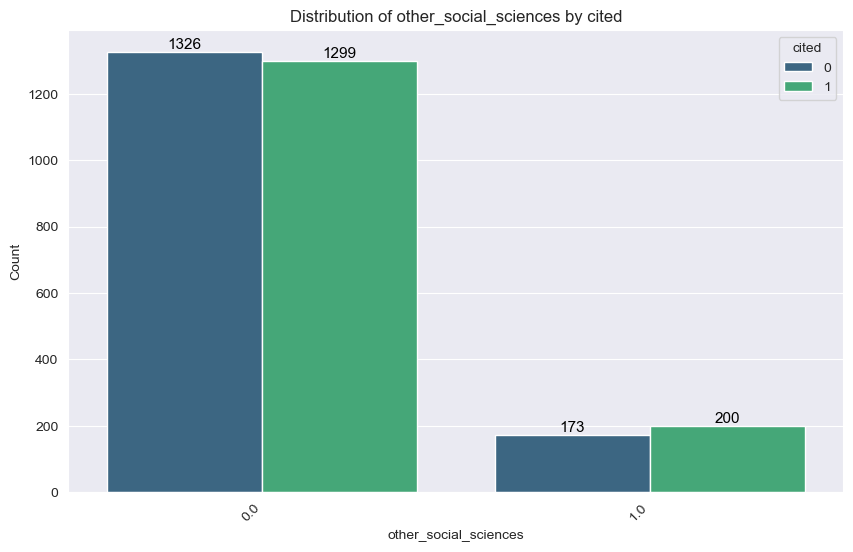

now in history_and_archaeology
Chi-Squared Value: 2.9373078760119036
P-value: 0.08655488155503387
There is no significant association between history_and_archaeology and cited
---------------------------------------------------------------


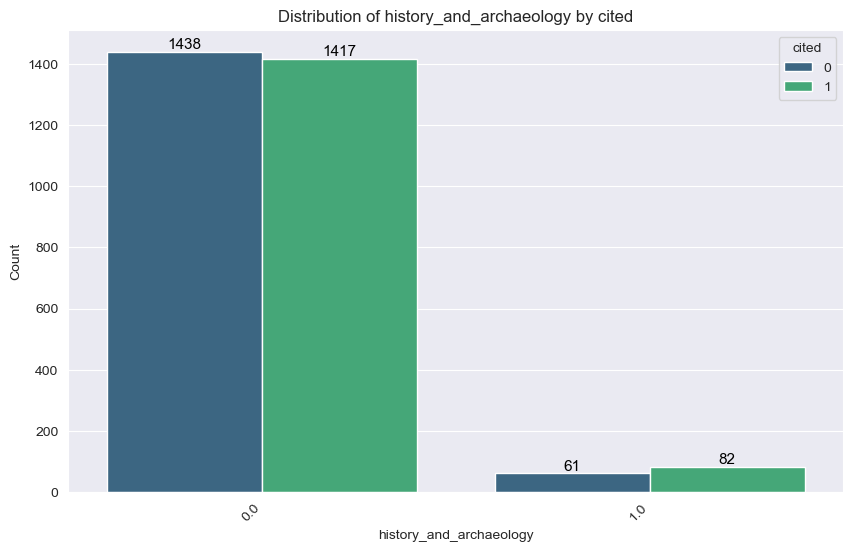

now in languages_and_literature
Chi-Squared Value: 0.7756465347456474
P-value: 0.3784758999559332
There is no significant association between languages_and_literature and cited
---------------------------------------------------------------


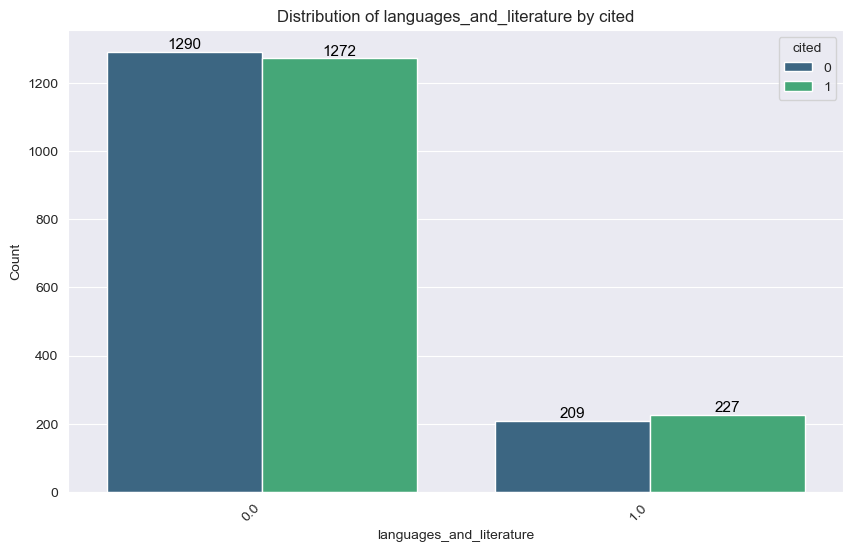

now in philosophy_ethics_and_religion
Chi-Squared Value: 0.01224793280386966
P-value: 0.9118777357318046
There is no significant association between philosophy_ethics_and_religion and cited
---------------------------------------------------------------


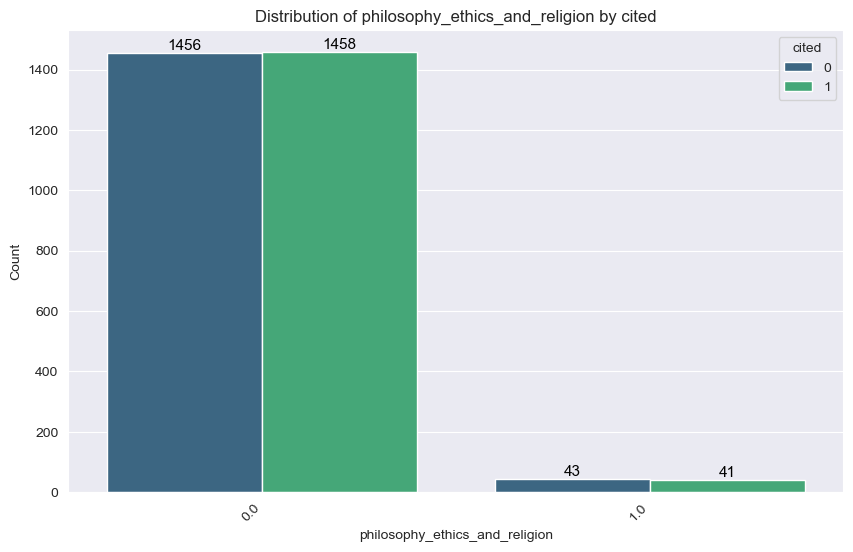

now in arts
Chi-Squared Value: 0.04200291414481058
P-value: 0.8376142174825421
There is no significant association between arts and cited
---------------------------------------------------------------


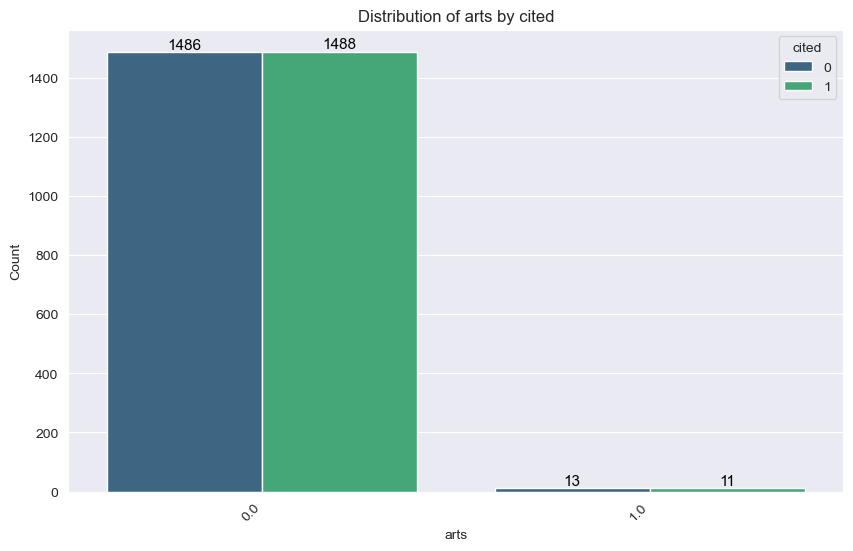

now in other_humanities_and_the_arts
Chi-Squared Value: 1.3842323104068073
P-value: 0.23938154440504283
There is no significant association between other_humanities_and_the_arts and cited
---------------------------------------------------------------


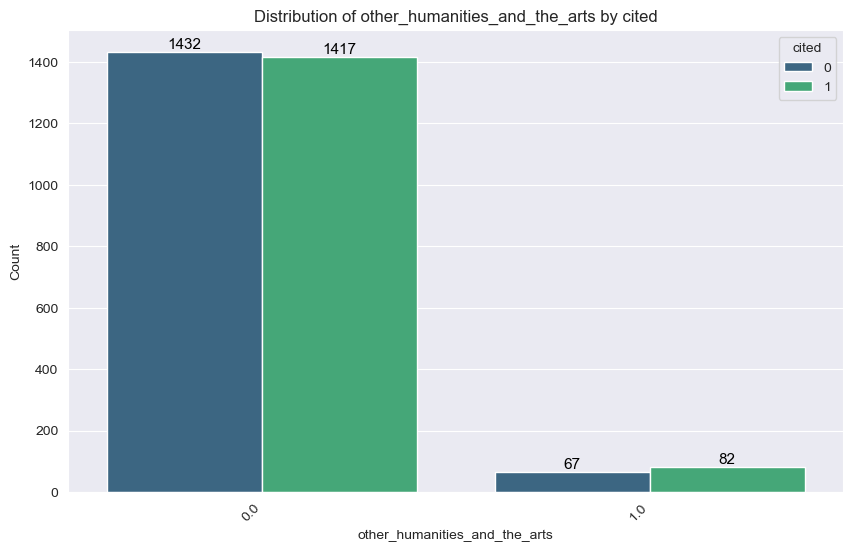

now in applied_research
Chi-Squared Value: 3.3759664520371784
P-value: 0.0661537695532712
There is no significant association between applied_research and cited
---------------------------------------------------------------


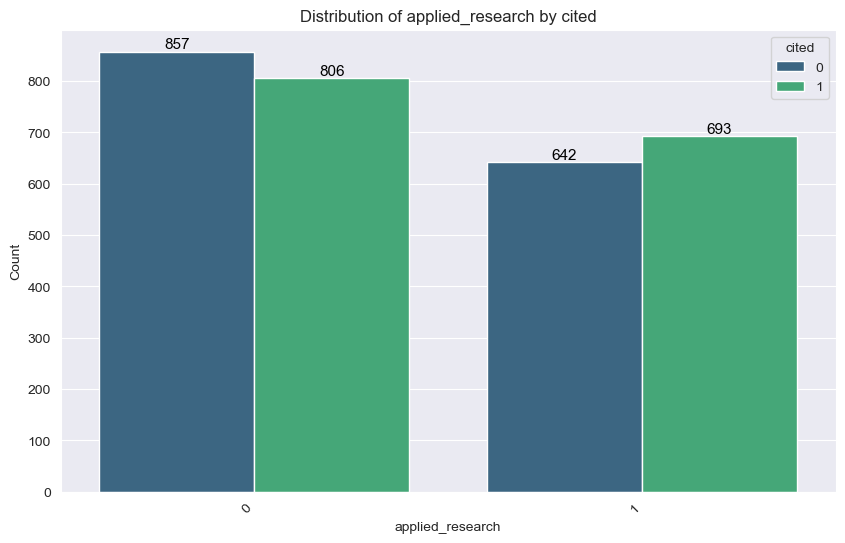

now in conclusive_research
Chi-Squared Value: 0.08366822951551686
P-value: 0.7723865441139722
There is no significant association between conclusive_research and cited
---------------------------------------------------------------


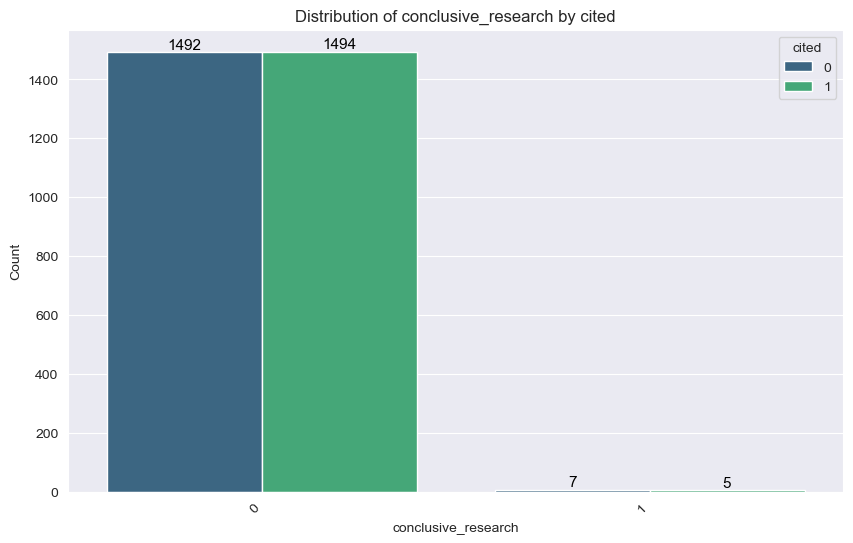

now in correlational_research
Chi-Squared Value: 0.3730696449874532
P-value: 0.5413357847335041
There is no significant association between correlational_research and cited
---------------------------------------------------------------


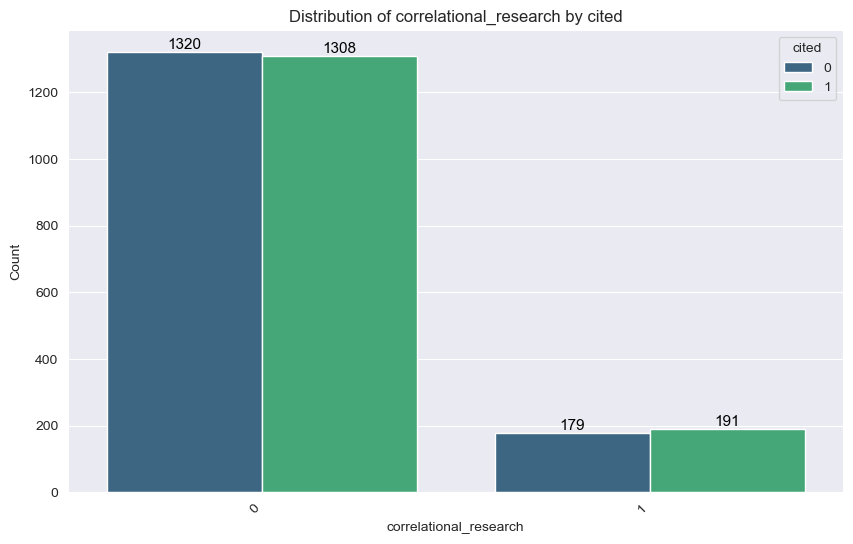

now in descriptive_research
Chi-Squared Value: 5.6069212013742655
P-value: 0.017889668650925485
There is a significant association between descriptive_research and cited.
---------------------------------------------------------------


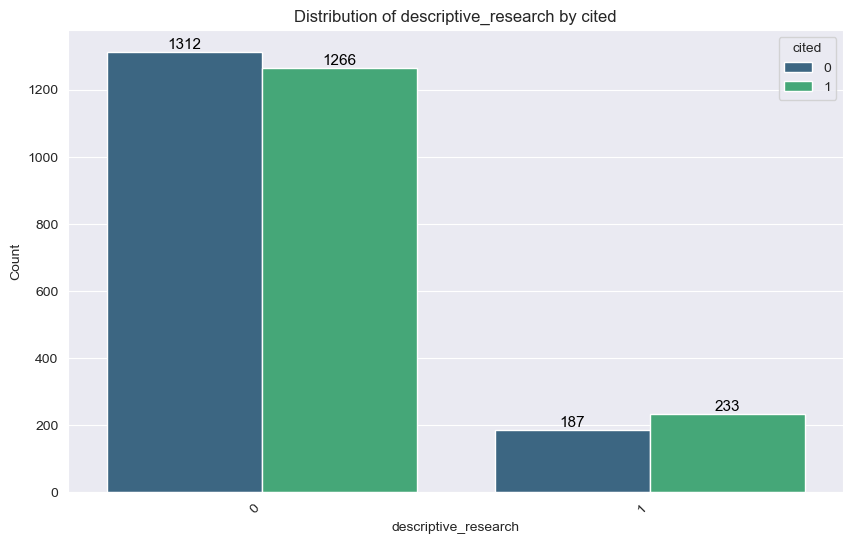

now in ethnographic_research
Chi-Squared Value: 0.0380818098386477
P-value: 0.8452789557981925
There is no significant association between ethnographic_research and cited
---------------------------------------------------------------


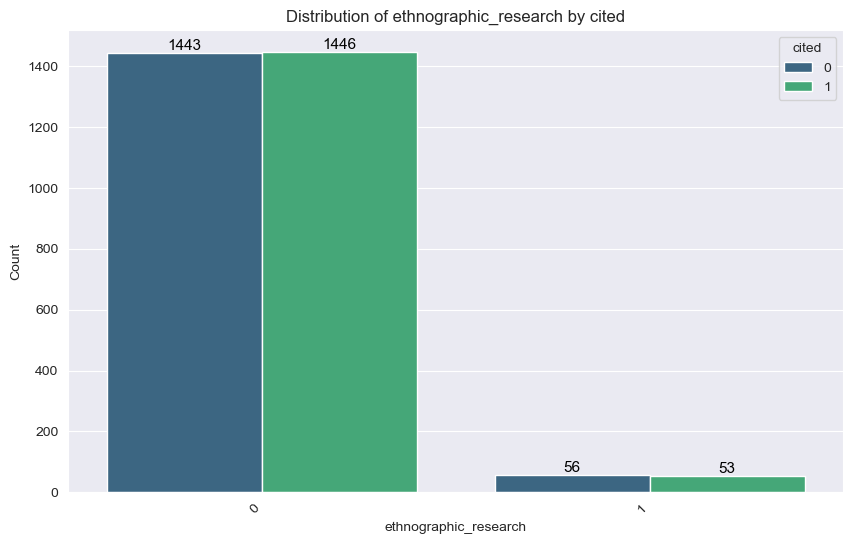

now in experiment
Chi-Squared Value: 0.025338066260987155
P-value: 0.8735275707631016
There is no significant association between experiment and cited
---------------------------------------------------------------


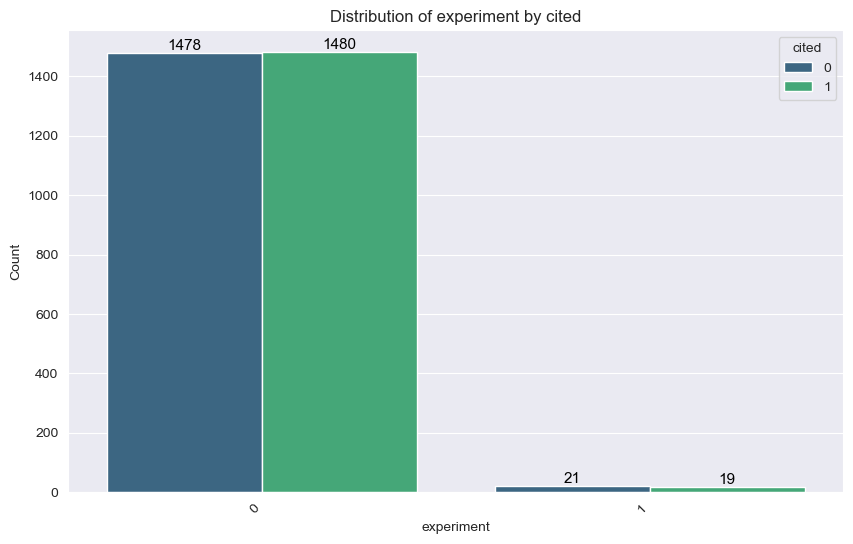

now in exploratory_research
Chi-Squared Value: 0.5745995971570289
P-value: 0.44843692612302355
There is no significant association between exploratory_research and cited
---------------------------------------------------------------


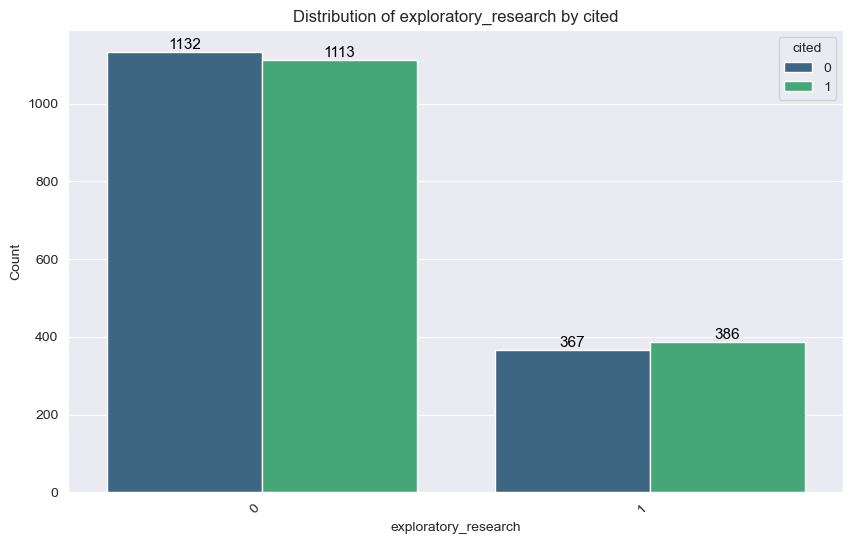

now in focus_groups
Chi-Squared Value: 2.129723543224737
P-value: 0.14446680955268124
There is no significant association between focus_groups and cited
---------------------------------------------------------------


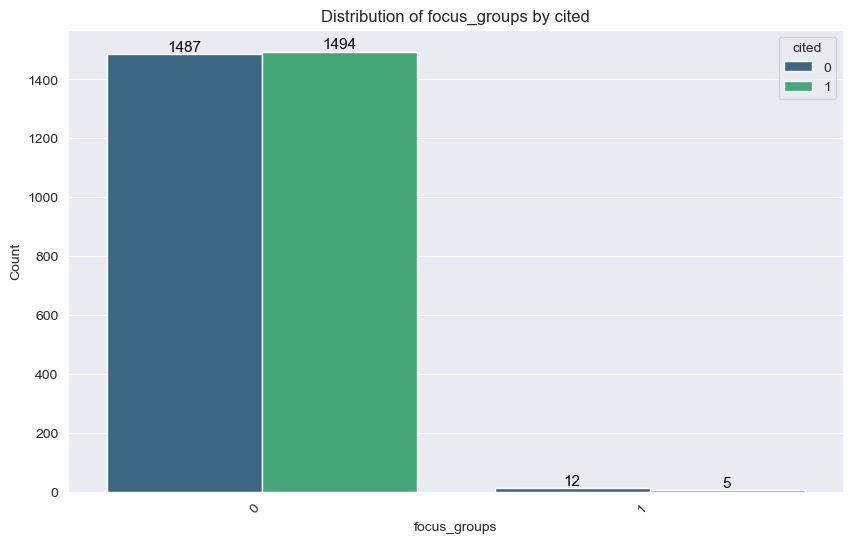

now in interviews
Chi-Squared Value: 1.9609790995963003
P-value: 0.16140864423461249
There is no significant association between interviews and cited
---------------------------------------------------------------


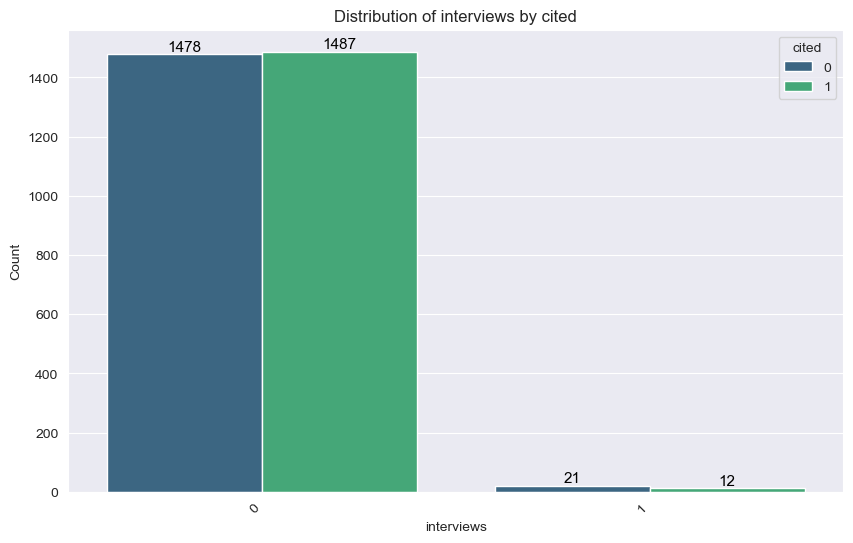

now in mixed_methods
Chi-Squared Value: 0.42322459251501565
P-value: 0.5153324050908868
There is no significant association between mixed_methods and cited
---------------------------------------------------------------


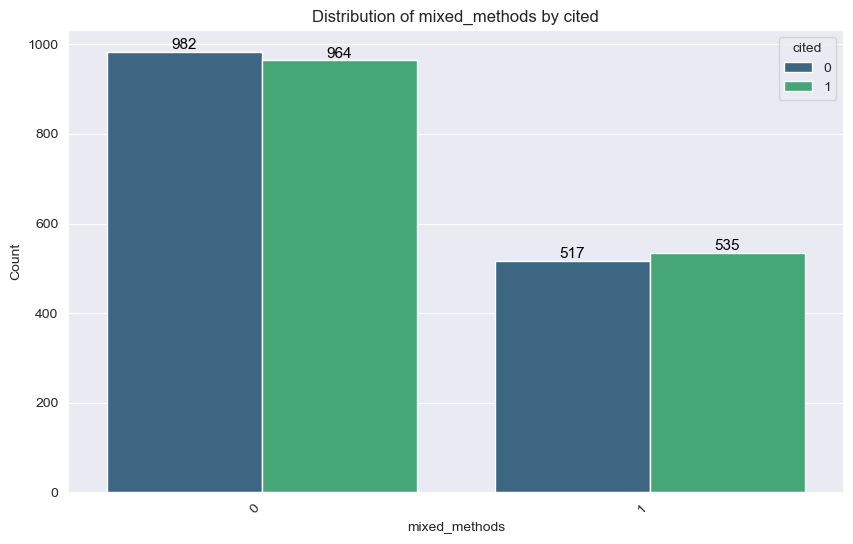

now in observation
Chi-Squared Value: 0.3055620267909144
P-value: 0.5804163581414713
There is no significant association between observation and cited
---------------------------------------------------------------


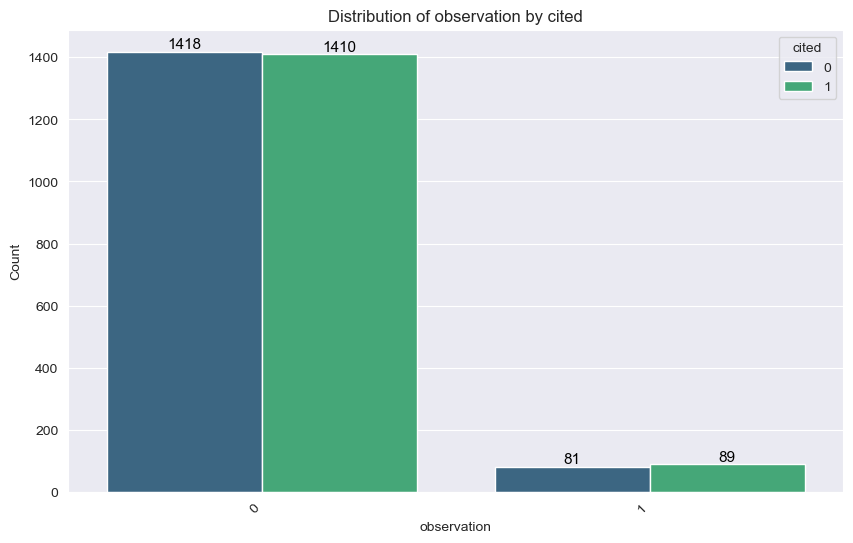

now in qualitative_research
Chi-Squared Value: 0.8154577751461771
P-value: 0.3665115616658329
There is no significant association between qualitative_research and cited
---------------------------------------------------------------


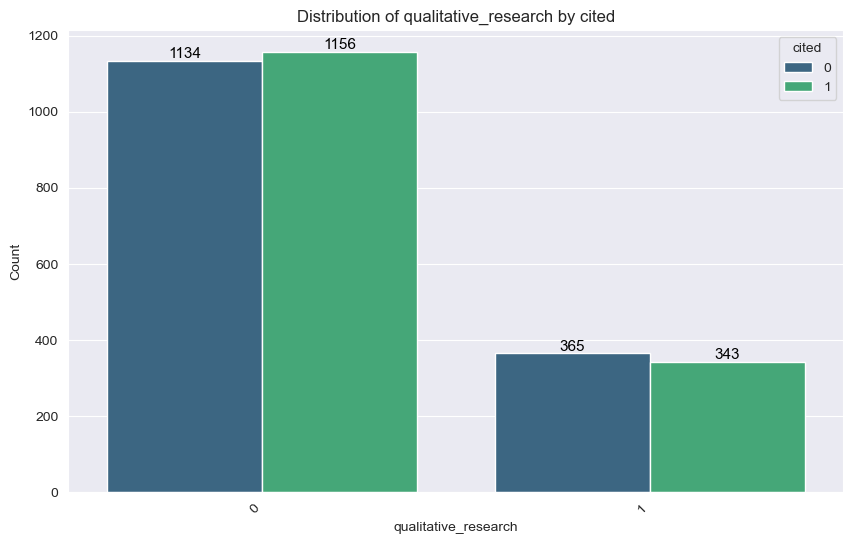

now in quantitative_research
Chi-Squared Value: 0.3305087620419368
P-value: 0.5653596640197057
There is no significant association between quantitative_research and cited
---------------------------------------------------------------


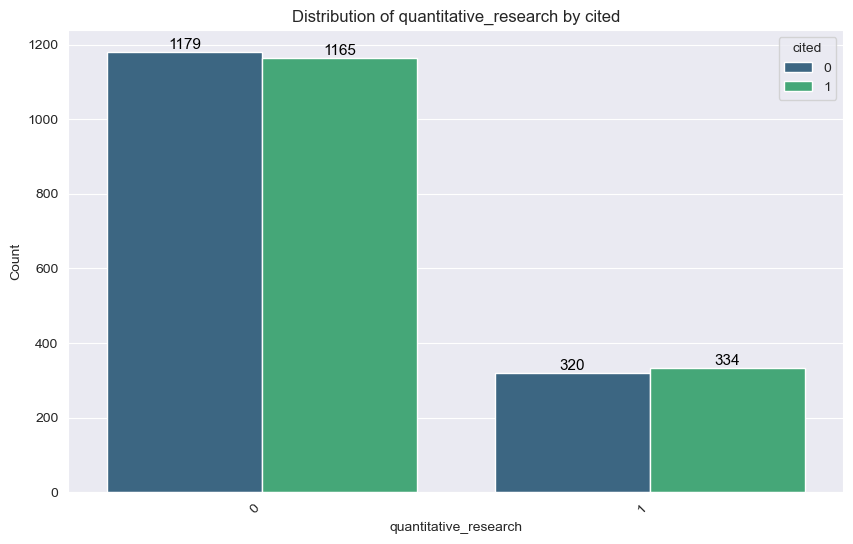

now in questionnaires
Chi-Squared Value: 5.808435923309788
P-value: 0.015949473485907743
There is a significant association between questionnaires and cited.
---------------------------------------------------------------


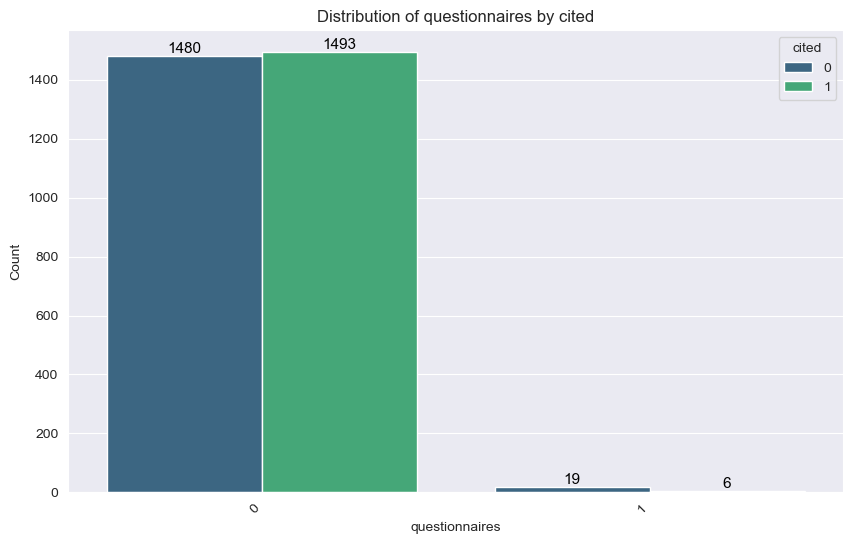

now in secondary_research
Chi-Squared Value: 0.875070417190843
P-value: 0.3495554167167664
There is no significant association between secondary_research and cited
---------------------------------------------------------------


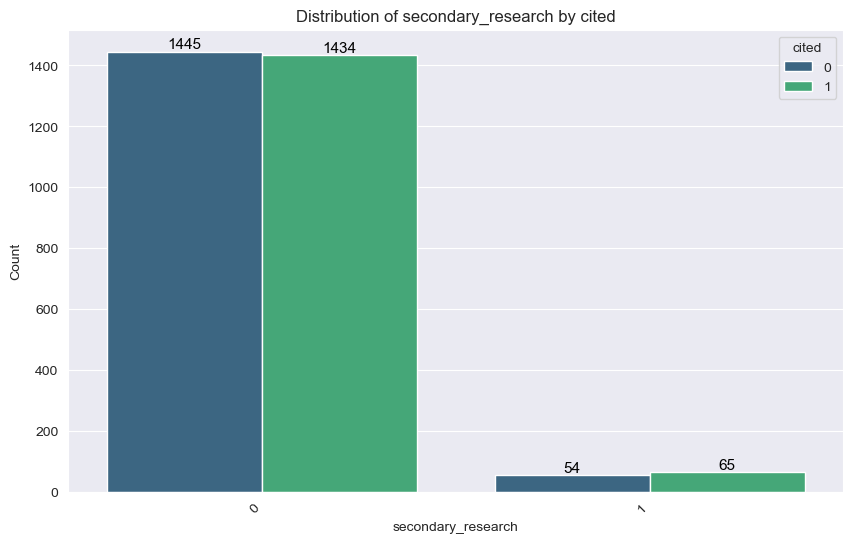

now in survey_methodology
Chi-Squared Value: 0.746305074145394
P-value: 0.3876485935345415
There is no significant association between survey_methodology and cited
---------------------------------------------------------------


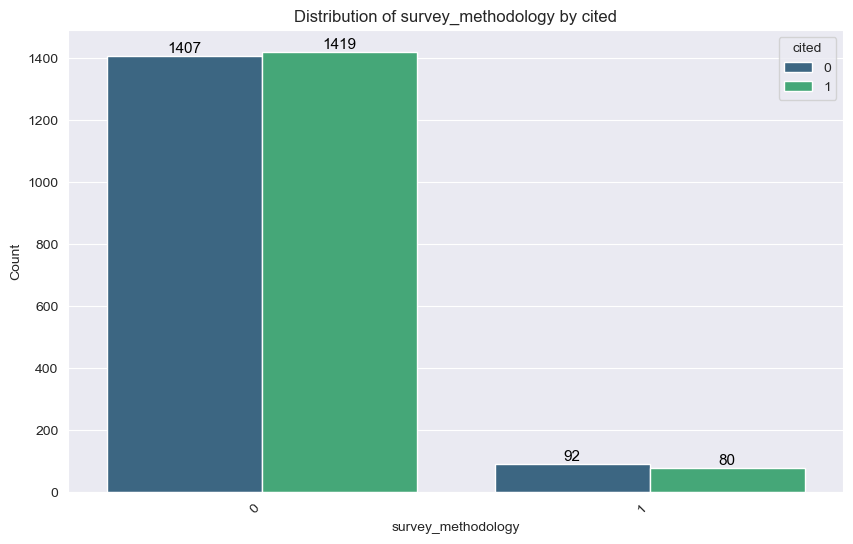

In [13]:
for col in df_c19.columns:
    if col in ['abstract', 'title', 'Unnamed: 0', 'Unnamed: 0.1', 'cited', 'research_methods>=5_c19', 'disciplines>=5_c19']:
        continue
    print(f"now in {col}")
    get_stat_significance(df_c19, col, 'cited')
    try:
        plot_categorical_distribution(df_c19, target_variable='cited', categorical_variable=col)
    except: 
        pass


now in novelty
Chi-Squared Value: 240.26277645273726
P-value: 1.9920906553215145e-47
There is a significant association between novelty and evaluation.
---------------------------------------------------------------


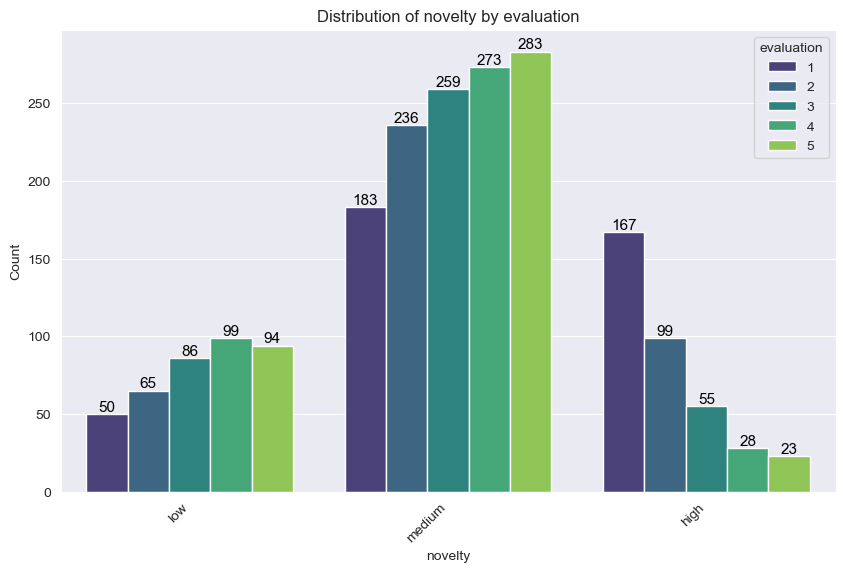

now in rigor
Chi-Squared Value: 350.50105711647814
P-value: 7.0785552881818806e-71
There is a significant association between rigor and evaluation.
---------------------------------------------------------------


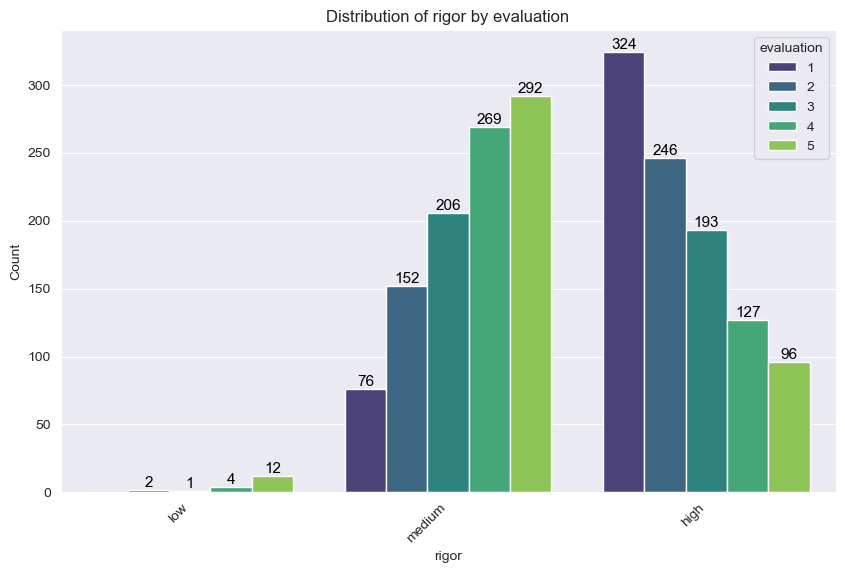

now in grammar
Chi-Squared Value: 96.81421111606593
P-value: 4.686521172253479e-20
There is a significant association between grammar and evaluation.
---------------------------------------------------------------


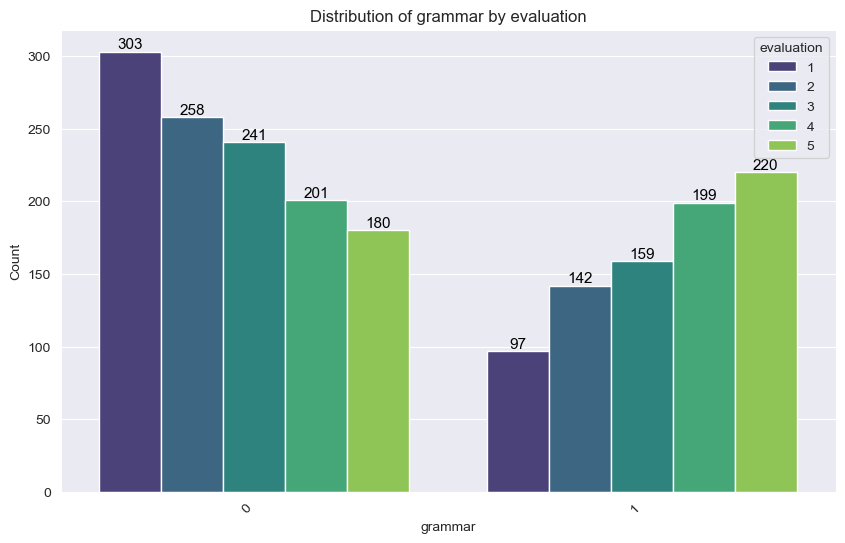

now in replicability
Chi-Squared Value: 207.7815894147755
P-value: 7.971471796954154e-44
There is a significant association between replicability and evaluation.
---------------------------------------------------------------


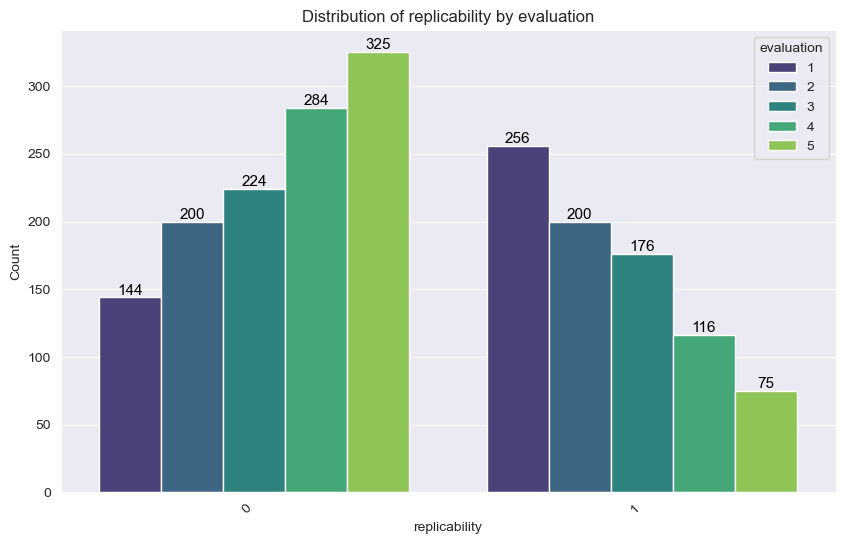

now in accessibility
Chi-Squared Value: 12.046424759871933
P-value: 0.1491445134929061
There is no significant association between accessibility and evaluation
---------------------------------------------------------------


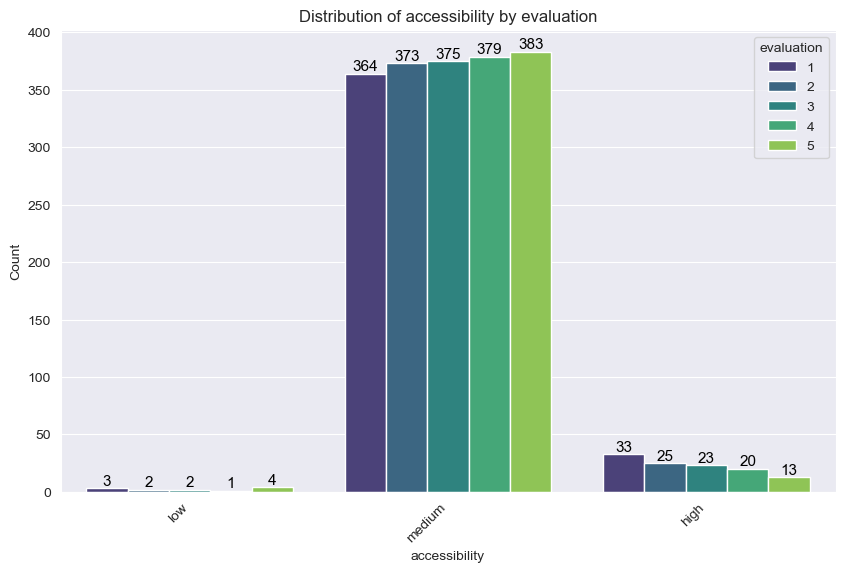

now in mathematics
Chi-Squared Value: 77.14631997136937
P-value: 7.003097929743016e-16
There is a significant association between mathematics and evaluation.
---------------------------------------------------------------


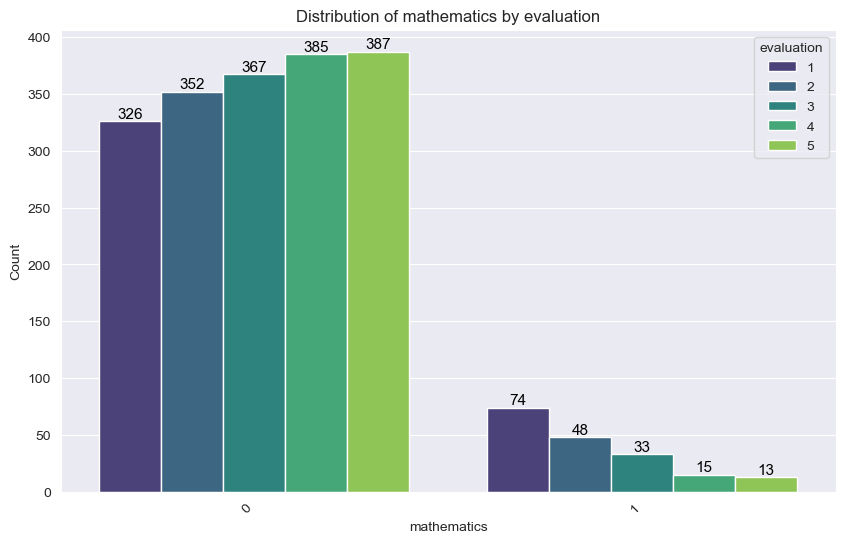

now in computer_and_information_sciences
Chi-Squared Value: 156.49496080627097
P-value: 8.251568346617146e-33
There is a significant association between computer_and_information_sciences and evaluation.
---------------------------------------------------------------


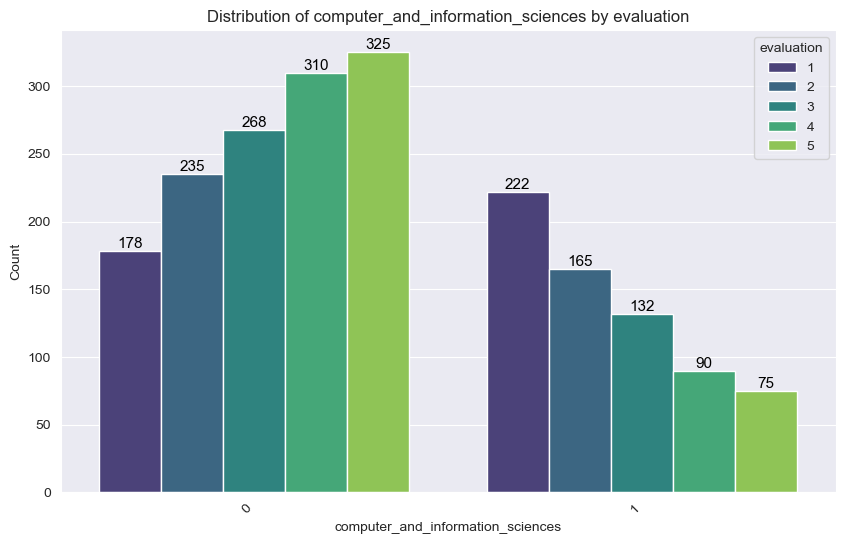

now in physical_sciences
Chi-Squared Value: 186.38392857142856
P-value: 3.171451007308937e-39
There is a significant association between physical_sciences and evaluation.
---------------------------------------------------------------


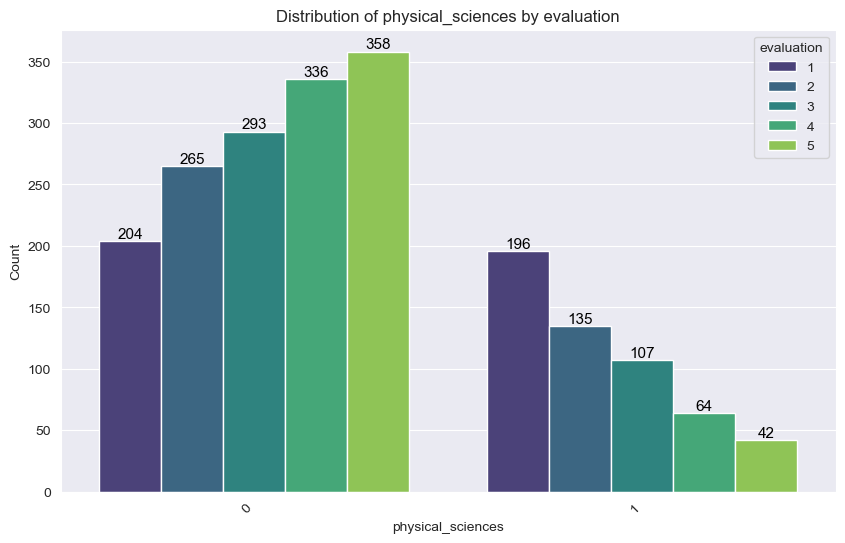

now in chemical_sciences
Chi-Squared Value: 135.98793642951253
P-value: 2.0389469481192423e-28
There is a significant association between chemical_sciences and evaluation.
---------------------------------------------------------------


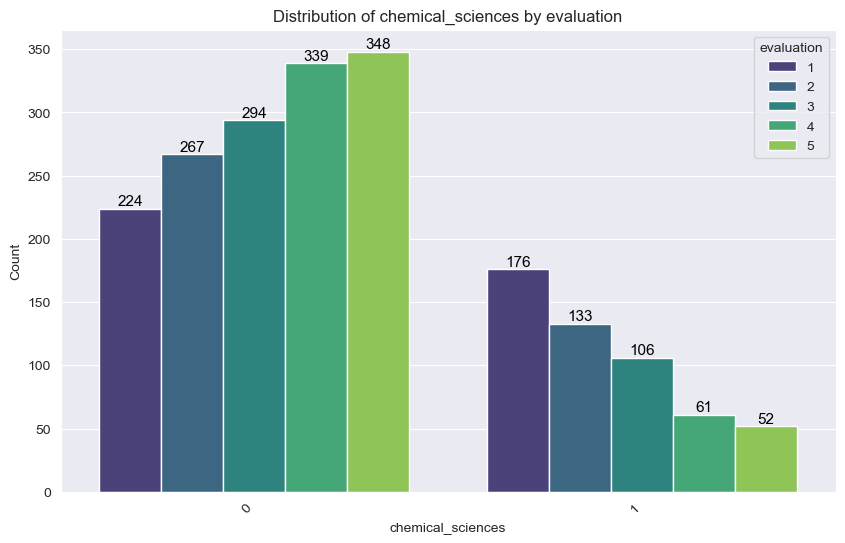

now in earth_and_related_environmental_sciences
Chi-Squared Value: 118.0999429868569
P-value: 1.3596778711456364e-24
There is a significant association between earth_and_related_environmental_sciences and evaluation.
---------------------------------------------------------------


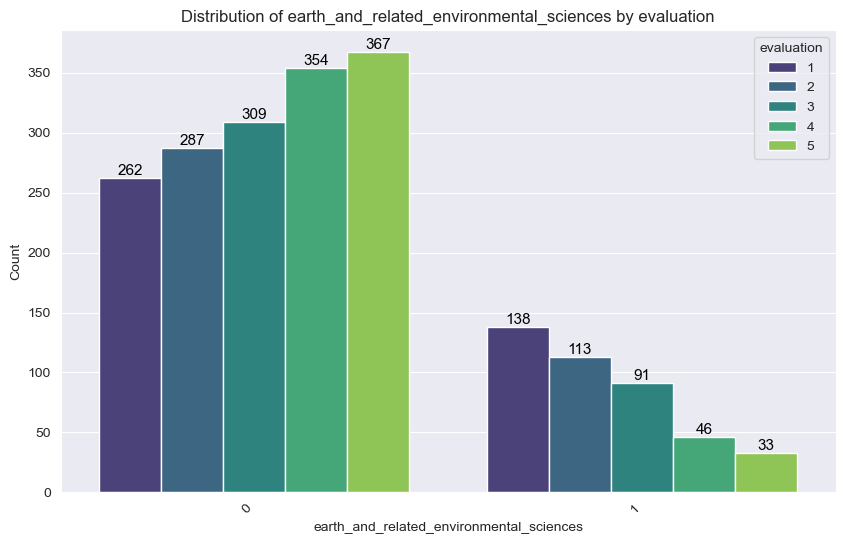

now in biological_sciences
Chi-Squared Value: 243.44701165950548
P-value: 1.6791165934255688e-51
There is a significant association between biological_sciences and evaluation.
---------------------------------------------------------------


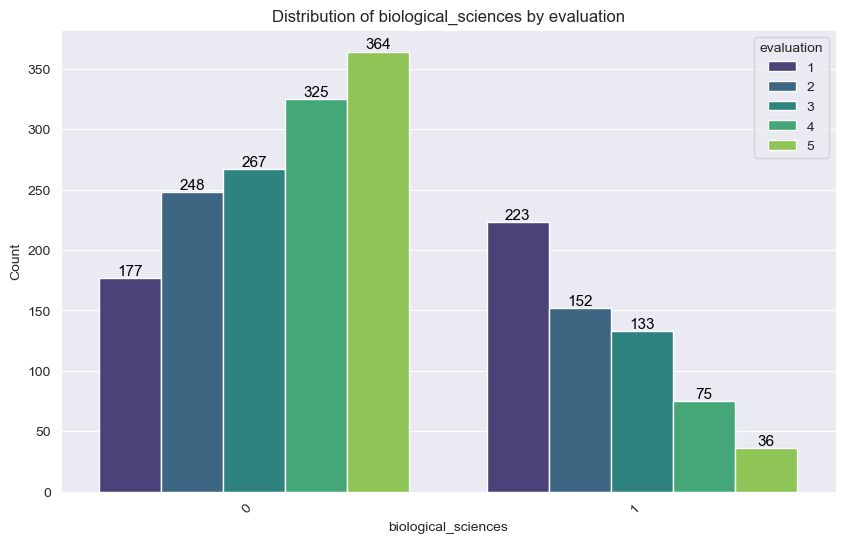

now in other_natural_sciences
Chi-Squared Value: 171.73796612438912
P-value: 4.430362137640699e-36
There is a significant association between other_natural_sciences and evaluation.
---------------------------------------------------------------


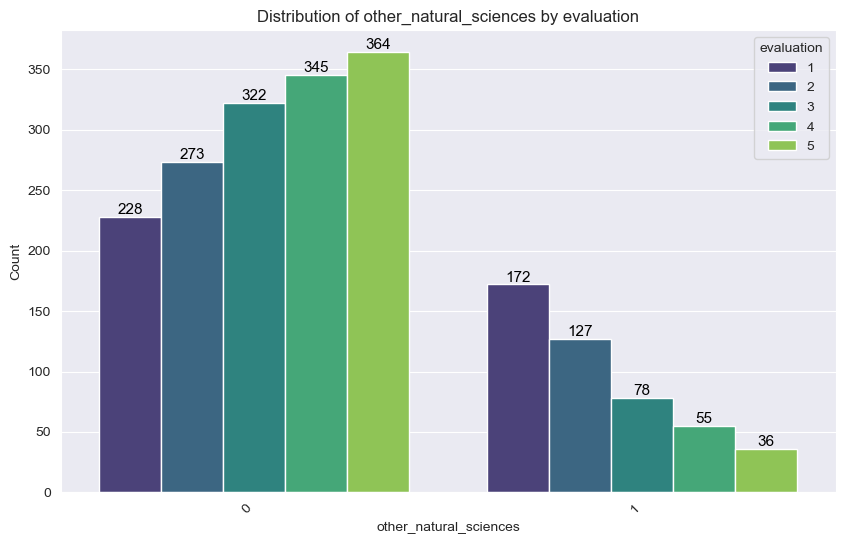

now in civil_engineering
Chi-Squared Value: 31.824466758845794
P-value: 2.0778099018927364e-06
There is a significant association between civil_engineering and evaluation.
---------------------------------------------------------------


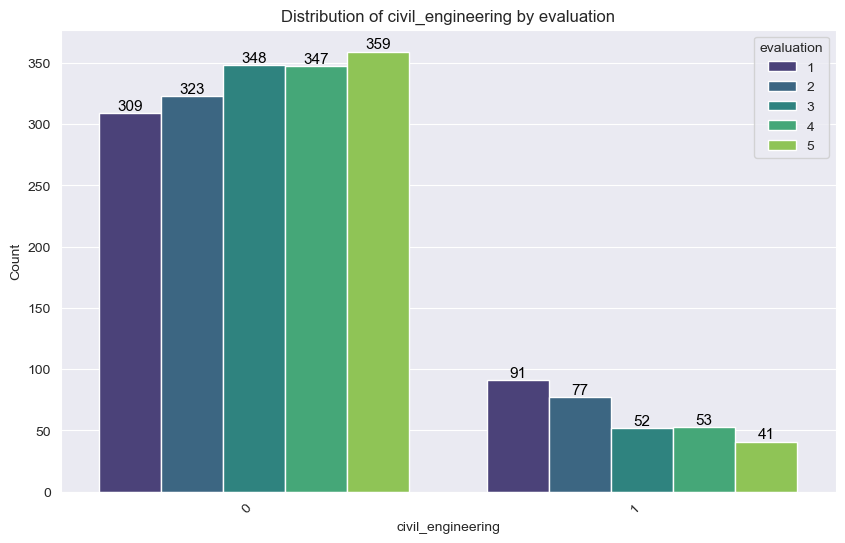

now in electrical_engineering
Chi-Squared Value: 57.1160020555436
P-value: 1.1697493144825432e-11
There is a significant association between electrical_engineering and evaluation.
---------------------------------------------------------------


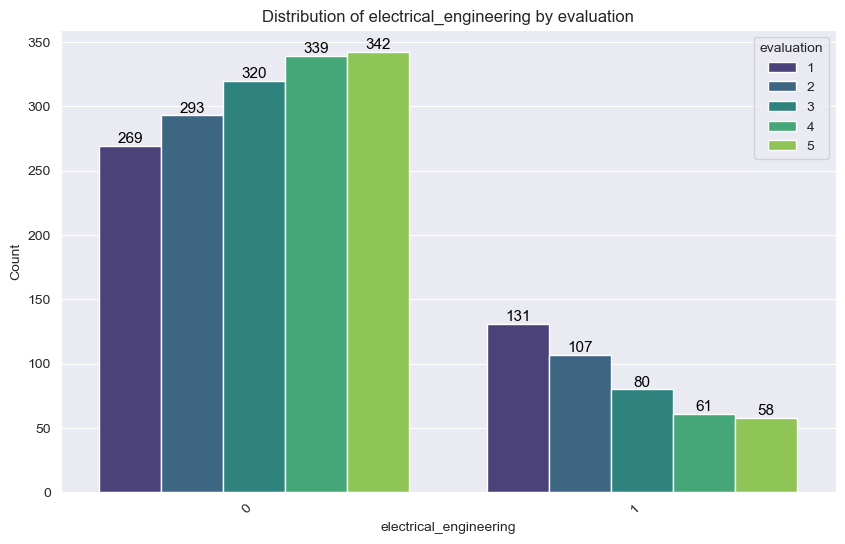

now in mechanical_engineering
Chi-Squared Value: 29.272184236601785
P-value: 6.88262609520225e-06
There is a significant association between mechanical_engineering and evaluation.
---------------------------------------------------------------


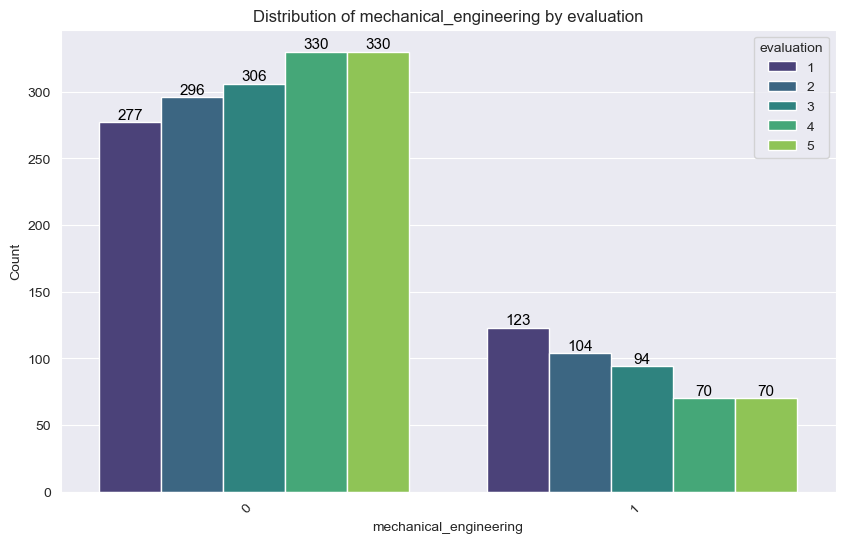

now in chemical_engineering
Chi-Squared Value: 47.04117400484583
P-value: 1.495098192136837e-09
There is a significant association between chemical_engineering and evaluation.
---------------------------------------------------------------


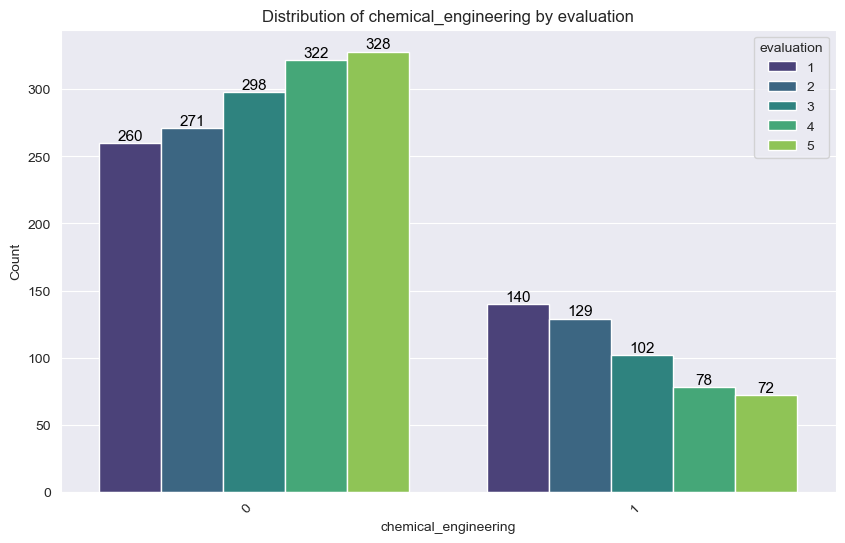

now in materials_engineering
Chi-Squared Value: 25.58519324986391
P-value: 3.8361175935041533e-05
There is a significant association between materials_engineering and evaluation.
---------------------------------------------------------------


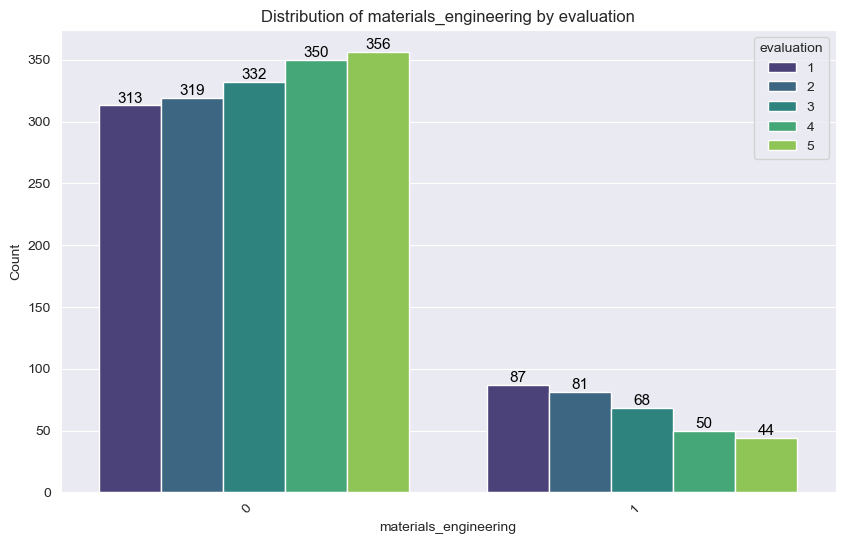

now in environmental_engineering
Chi-Squared Value: 54.235611488097796
P-value: 4.697513428368978e-11
There is a significant association between environmental_engineering and evaluation.
---------------------------------------------------------------


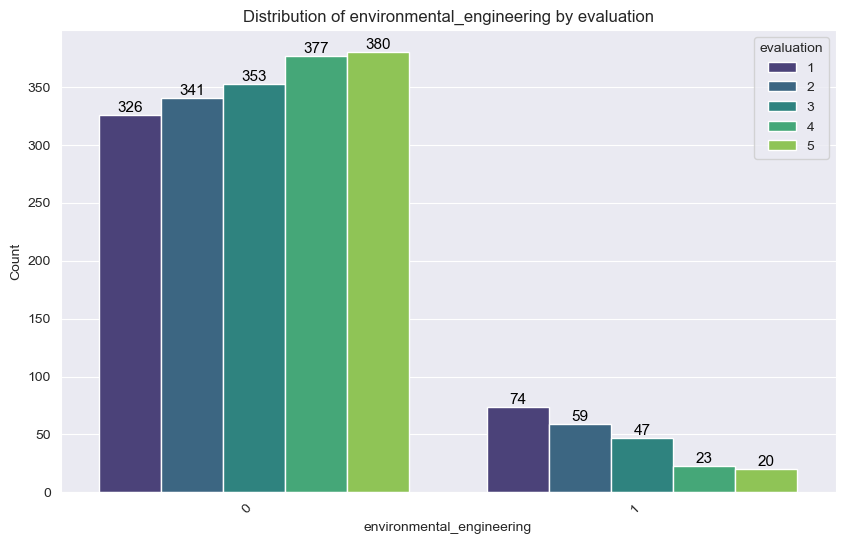

now in evironmental_biotechnology
Chi-Squared Value: 89.69808082384147
P-value: 1.5262985128654605e-18
There is a significant association between evironmental_biotechnology and evaluation.
---------------------------------------------------------------


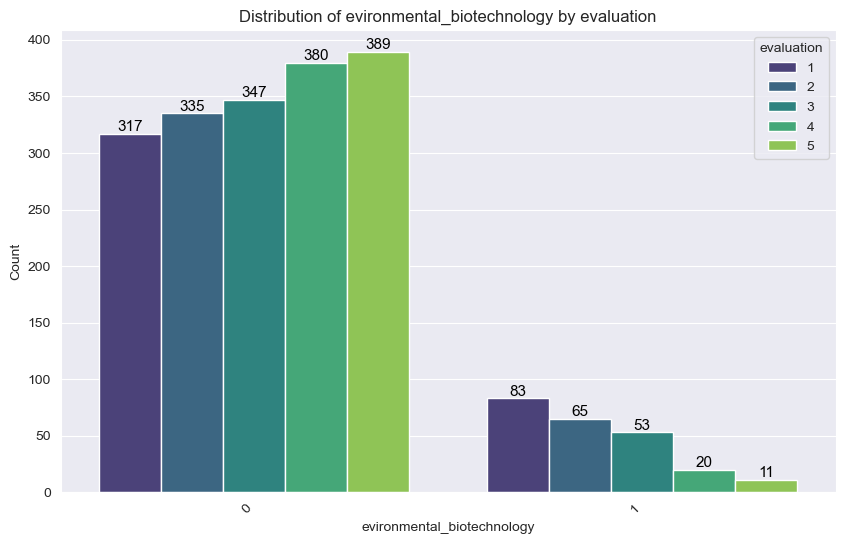

now in industrial_biotechnology
Chi-Squared Value: 73.00787148409914
P-value: 5.2555598403588826e-15
There is a significant association between industrial_biotechnology and evaluation.
---------------------------------------------------------------


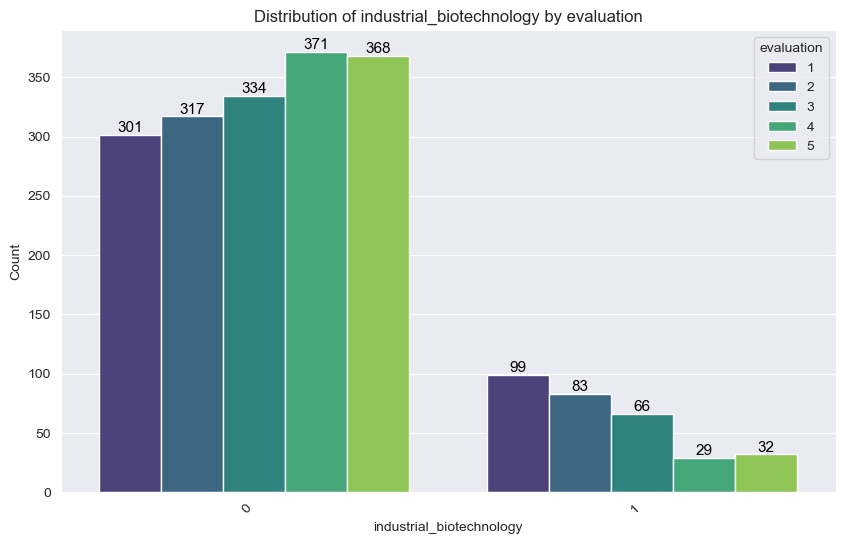

now in nano-technology
Chi-Squared Value: 38.54496913065243
P-value: 8.64914701503055e-08
There is a significant association between nano-technology and evaluation.
---------------------------------------------------------------


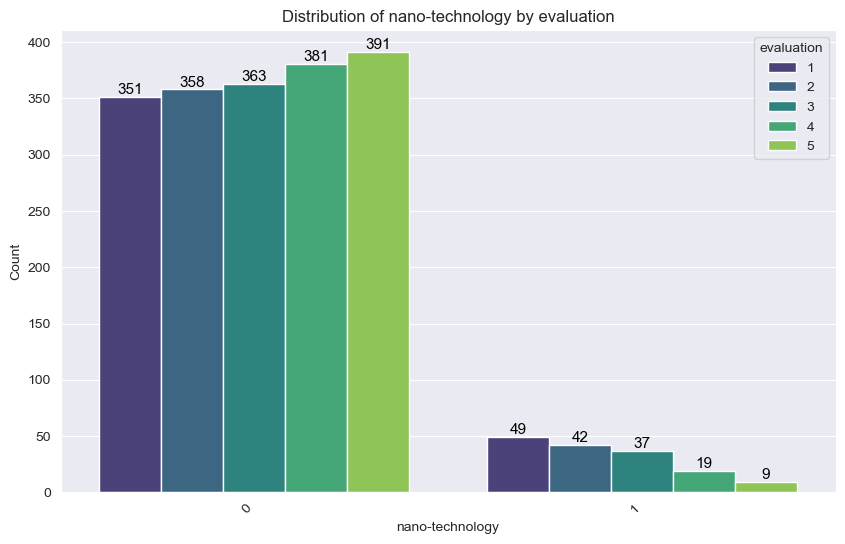

now in other_engineering_and_technologies
Chi-Squared Value: 57.14861867311957
P-value: 1.1514623497203819e-11
There is a significant association between other_engineering_and_technologies and evaluation.
---------------------------------------------------------------


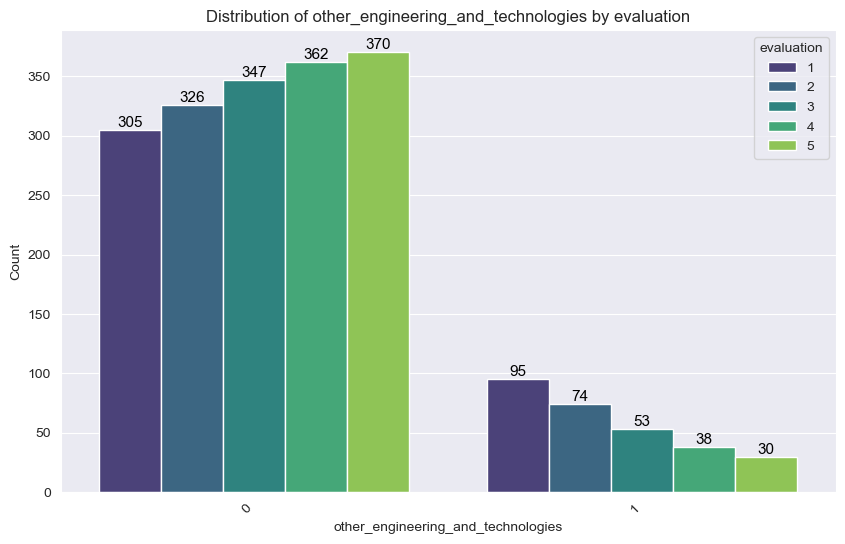

now in basic_medicine
Chi-Squared Value: 197.45258093773413
P-value: 1.3259480087015795e-41
There is a significant association between basic_medicine and evaluation.
---------------------------------------------------------------


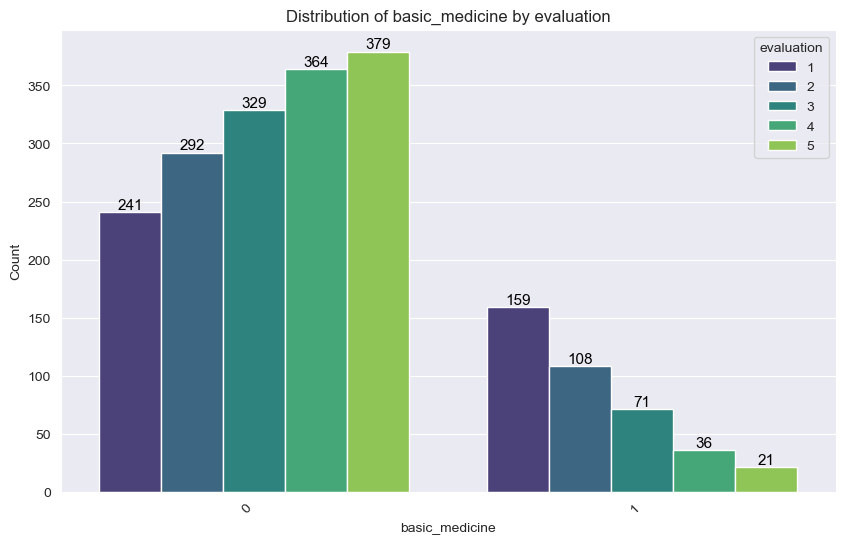

now in clinical_medicine
Chi-Squared Value: 103.70039460948551
P-value: 1.6024778598939112e-21
There is a significant association between clinical_medicine and evaluation.
---------------------------------------------------------------


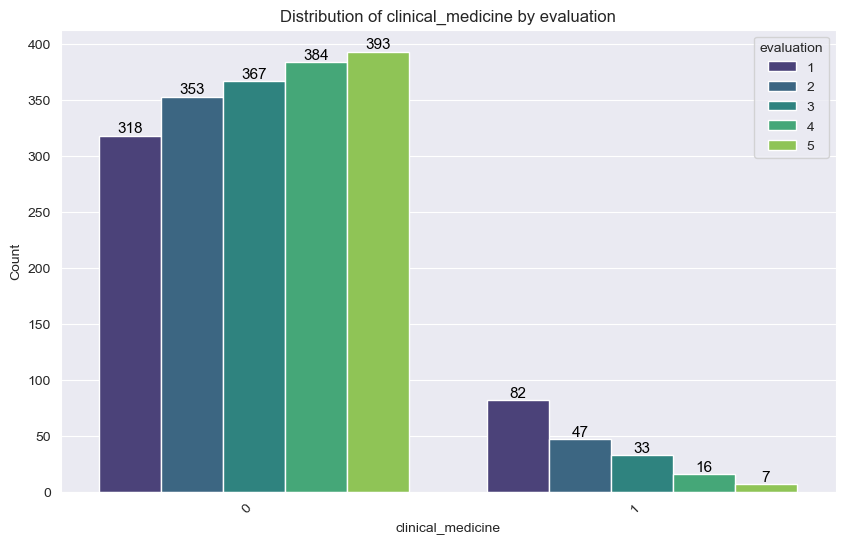

now in health_sciences
Chi-Squared Value: 86.43705364557383
P-value: 7.516861606224953e-18
There is a significant association between health_sciences and evaluation.
---------------------------------------------------------------


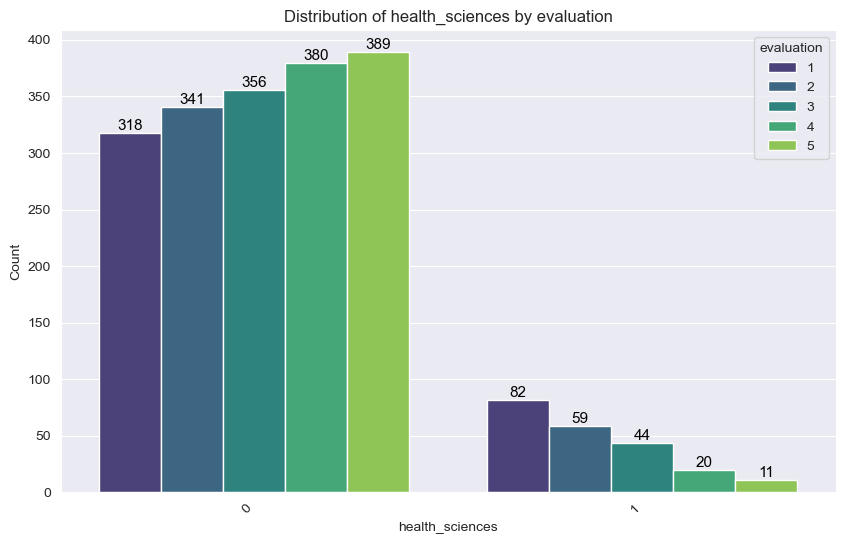

now in medical_biotechnology
Chi-Squared Value: 132.21433316724793
P-value: 1.3085527689783016e-27
There is a significant association between medical_biotechnology and evaluation.
---------------------------------------------------------------


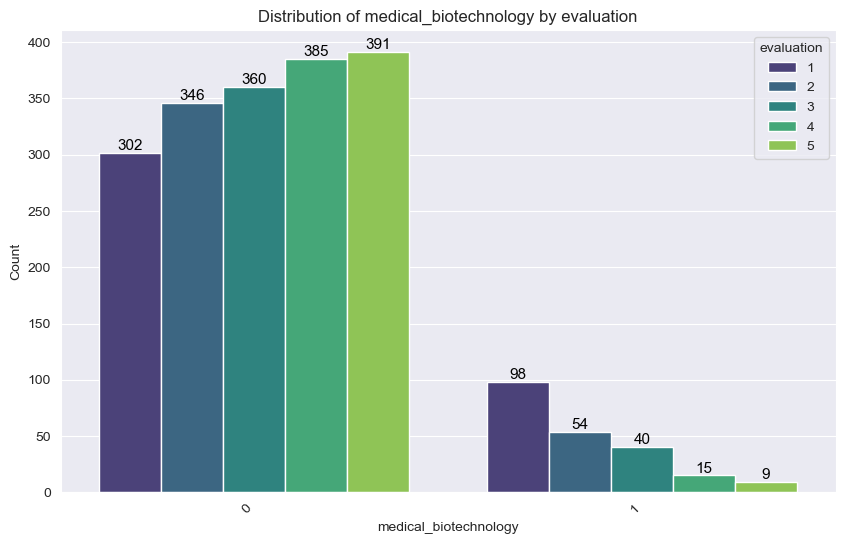

now in other_medical_sciences
Chi-Squared Value: 140.22992033088343
P-value: 2.520116816655975e-29
There is a significant association between other_medical_sciences and evaluation.
---------------------------------------------------------------


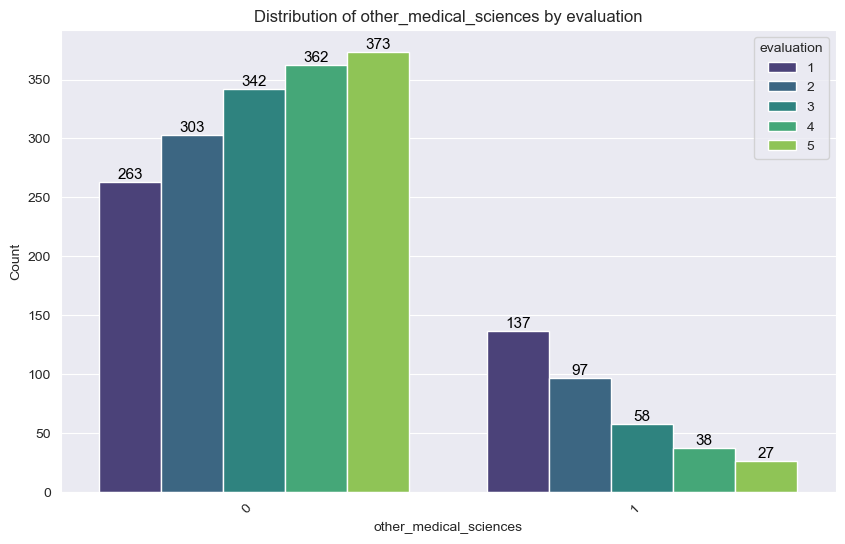

now in agriculture_forestry_and_fisheries
Chi-Squared Value: 83.15004887585533
P-value: 3.744132483415088e-17
There is a significant association between agriculture_forestry_and_fisheries and evaluation.
---------------------------------------------------------------


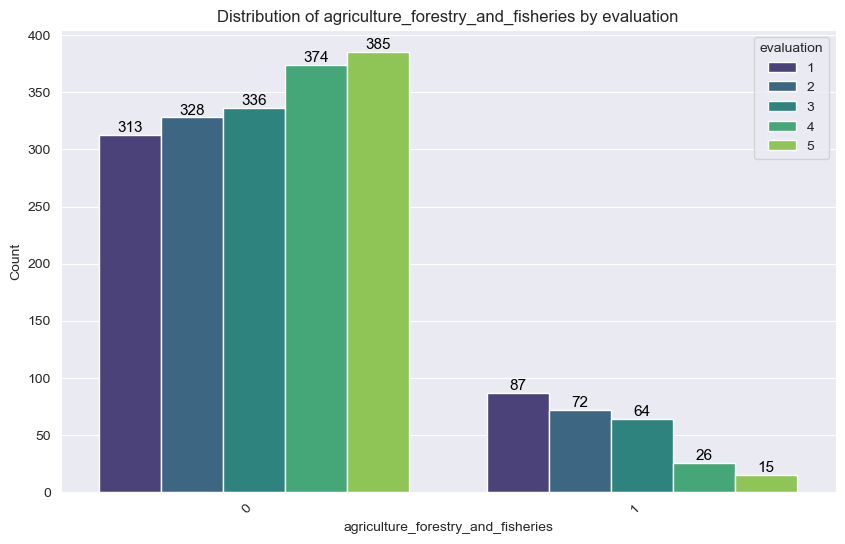

now in animal_and_dairy_science
Chi-Squared Value: 124.73277956755597
P-value: 5.205710652190268e-26
There is a significant association between animal_and_dairy_science and evaluation.
---------------------------------------------------------------


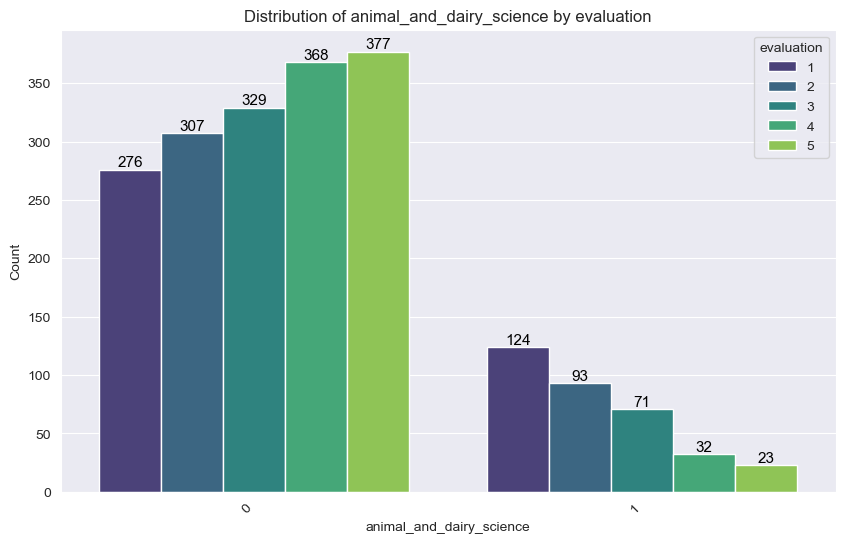

now in veterinary_science
Chi-Squared Value: 123.0176452559219
P-value: 1.2105955222919015e-25
There is a significant association between veterinary_science and evaluation.
---------------------------------------------------------------


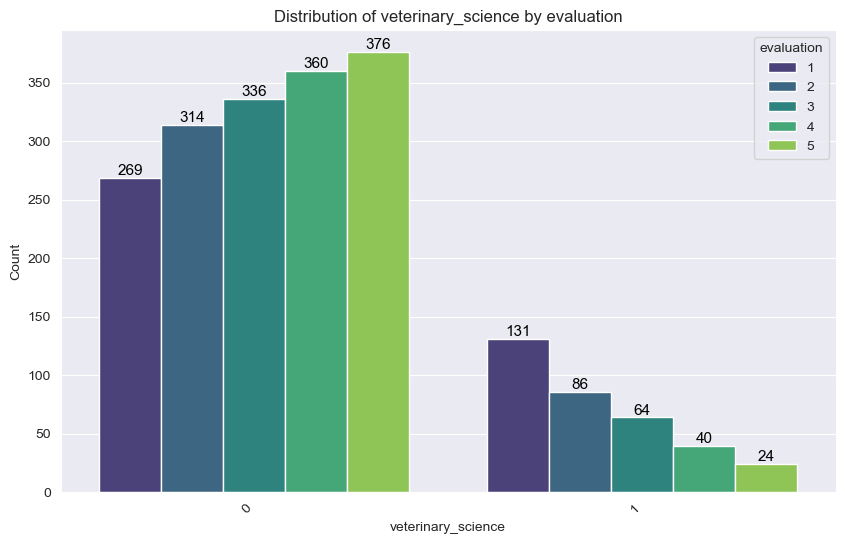

now in agricultural_biotechnology
Chi-Squared Value: 41.88719926756993
P-value: 1.760427396923287e-08
There is a significant association between agricultural_biotechnology and evaluation.
---------------------------------------------------------------


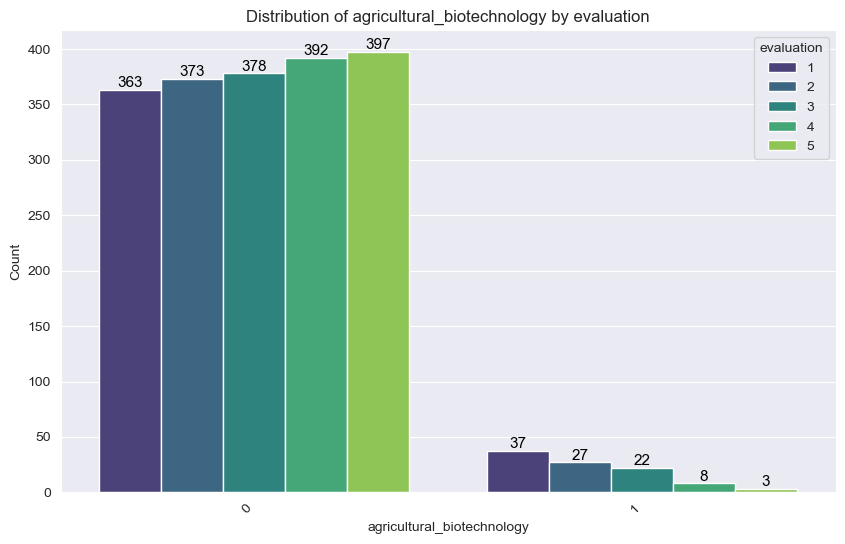

now in other_agricultural_sciences
Chi-Squared Value: 113.03211076741788
P-value: 1.6412627056404238e-23
There is a significant association between other_agricultural_sciences and evaluation.
---------------------------------------------------------------


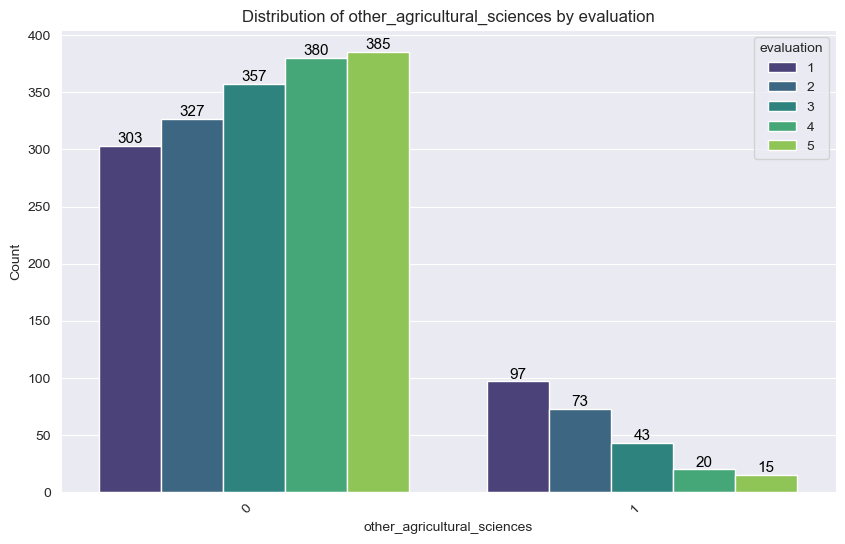

now in psychology
Chi-Squared Value: 120.73096223682134
P-value: 3.728454060433183e-25
There is a significant association between psychology and evaluation.
---------------------------------------------------------------


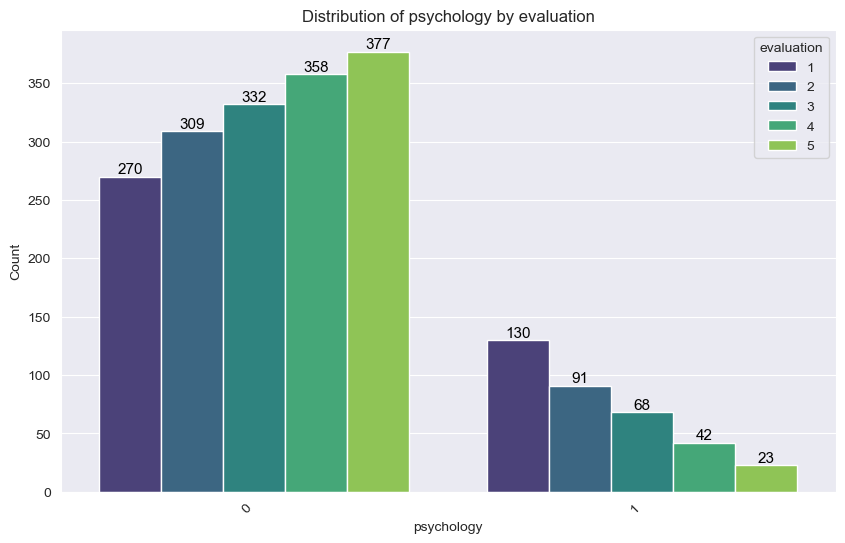

now in economics_and_business
Chi-Squared Value: 27.19926123454379
P-value: 1.8117460991224797e-05
There is a significant association between economics_and_business and evaluation.
---------------------------------------------------------------


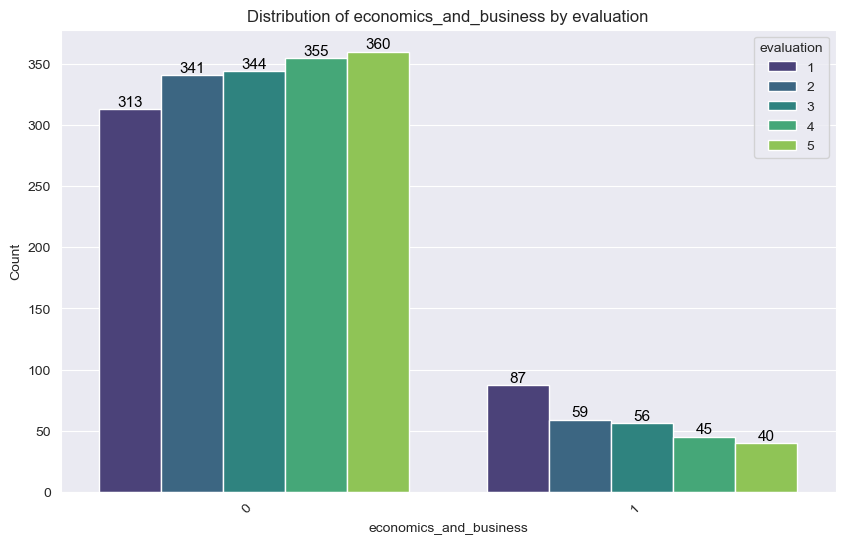

now in education
Chi-Squared Value: 33.26564478798201
P-value: 1.0538501190667017e-06
There is a significant association between education and evaluation.
---------------------------------------------------------------


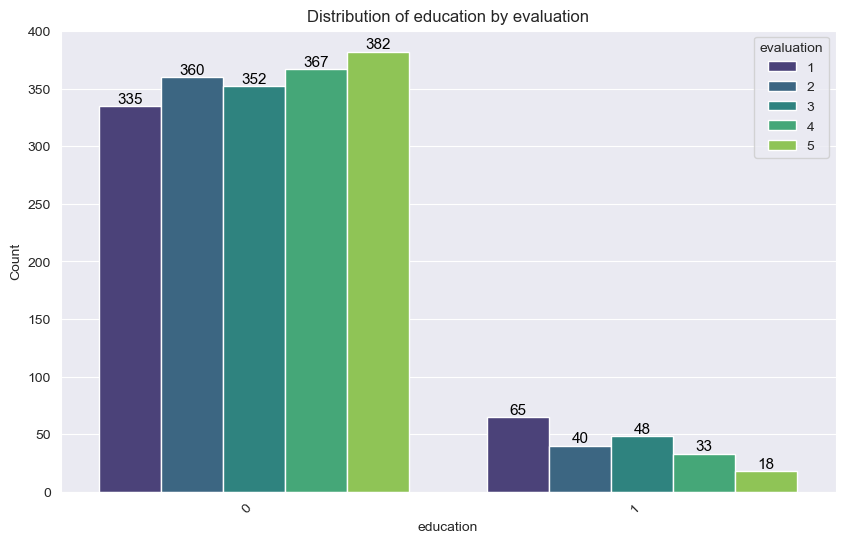

now in sociology
Chi-Squared Value: 55.77865612648221
P-value: 2.231290718230671e-11
There is a significant association between sociology and evaluation.
---------------------------------------------------------------


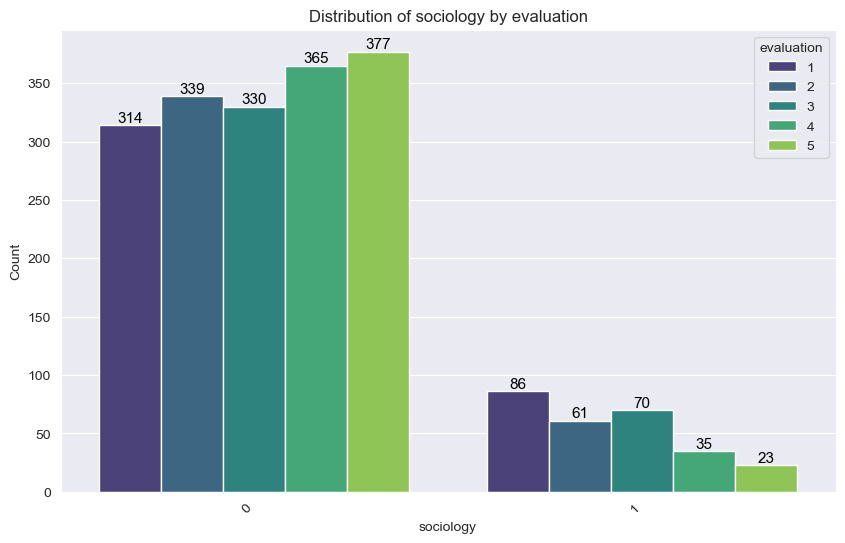

now in law
Chi-Squared Value: 57.81983973473335
P-value: 8.325236485044399e-12
There is a significant association between law and evaluation.
---------------------------------------------------------------


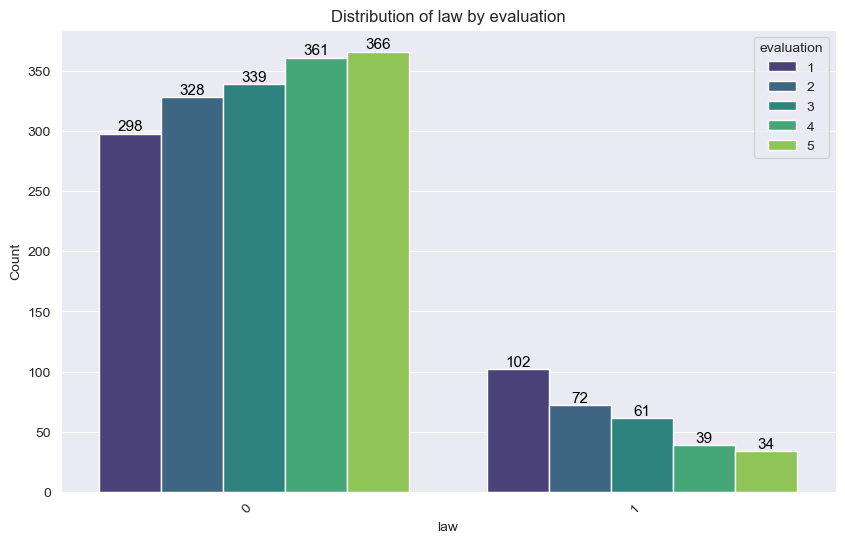

now in political_science
Chi-Squared Value: 15.086177944357125
P-value: 0.004525775553697879
There is a significant association between political_science and evaluation.
---------------------------------------------------------------


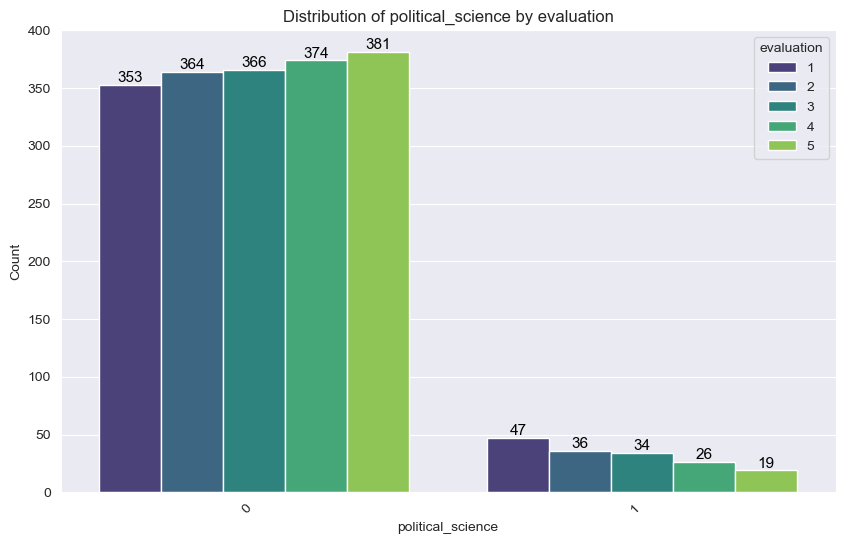

now in social_and_economic_geography
Chi-Squared Value: 34.252604748328096
P-value: 6.613793087687494e-07
There is a significant association between social_and_economic_geography and evaluation.
---------------------------------------------------------------


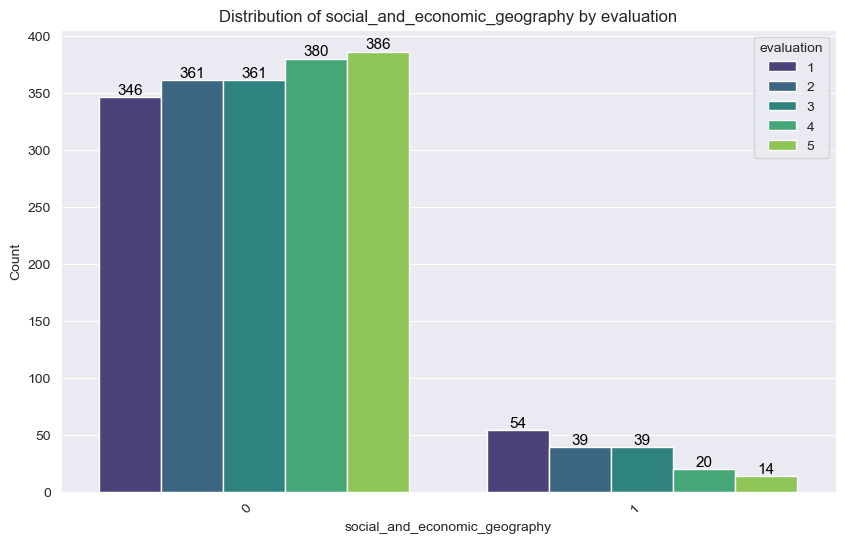

now in media_and_communications
Chi-Squared Value: 55.93852124183007
P-value: 2.0655792410968958e-11
There is a significant association between media_and_communications and evaluation.
---------------------------------------------------------------


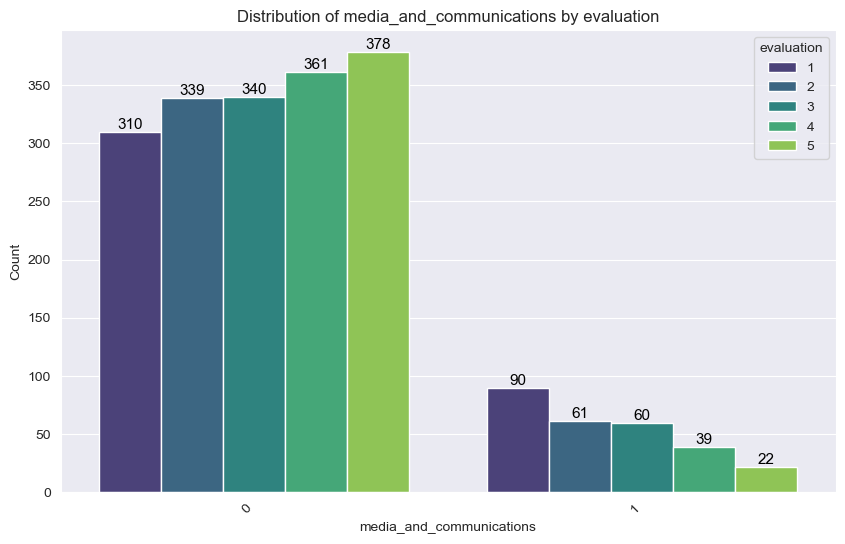

now in other_social_sciences
Chi-Squared Value: 90.84722440341312
P-value: 8.699910851313755e-19
There is a significant association between other_social_sciences and evaluation.
---------------------------------------------------------------


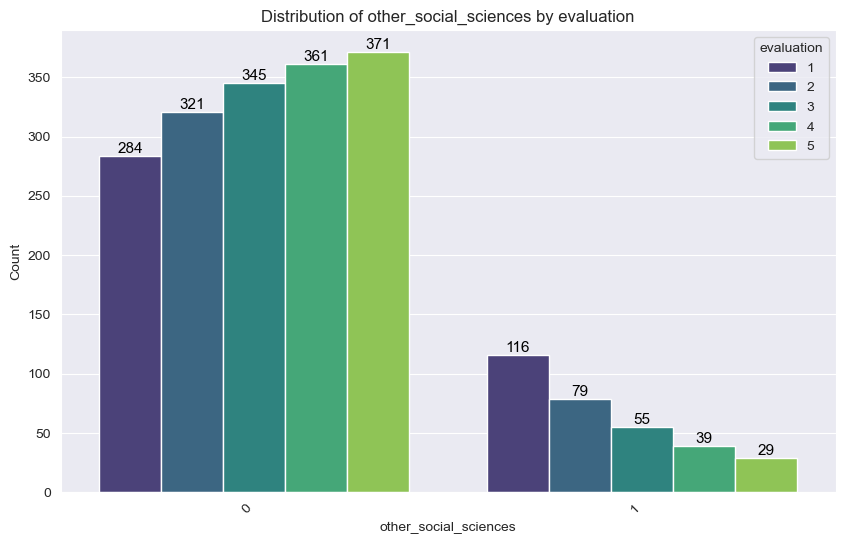

now in history_and_archaeology
Chi-Squared Value: 63.15509444001064
P-value: 6.294538196374285e-13
There is a significant association between history_and_archaeology and evaluation.
---------------------------------------------------------------


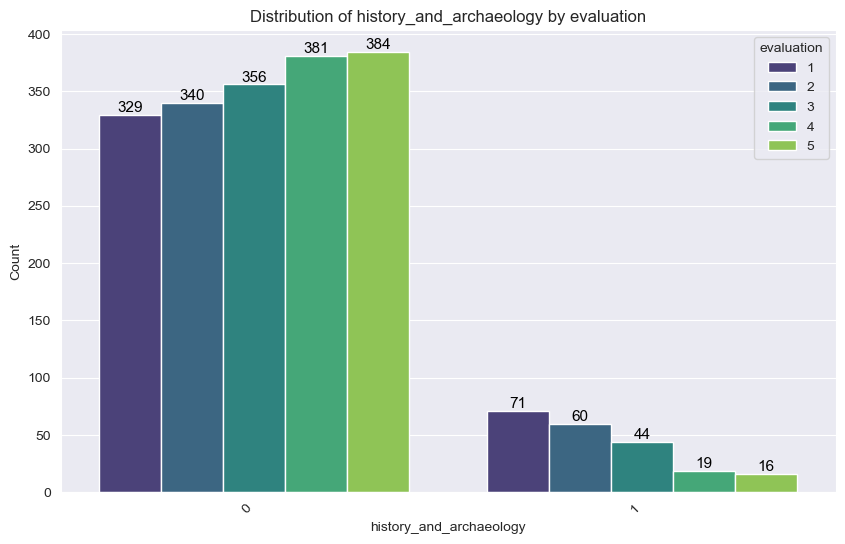

now in languages_and_literature
Chi-Squared Value: 64.29900265488982
P-value: 3.615147131589007e-13
There is a significant association between languages_and_literature and evaluation.
---------------------------------------------------------------


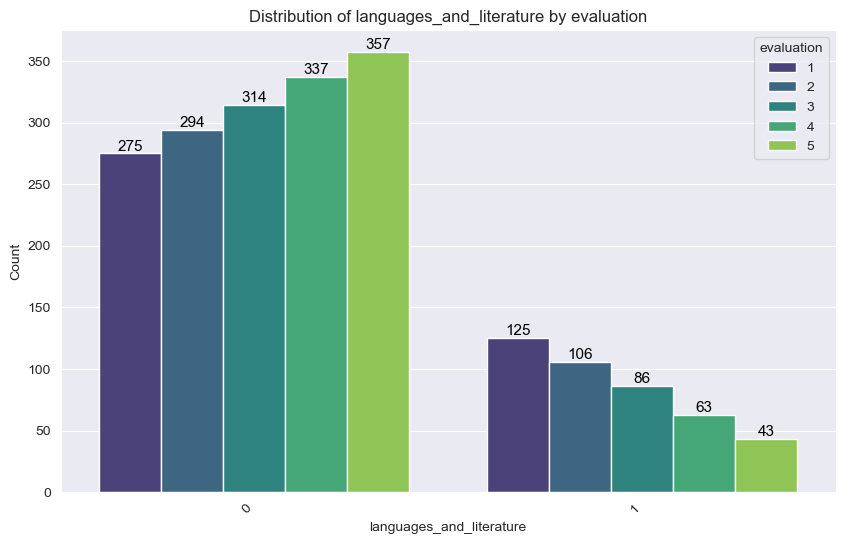

now in philosophy_ethics_and_religion
Chi-Squared Value: 50.91847880051634
P-value: 2.321507926106625e-10
There is a significant association between philosophy_ethics_and_religion and evaluation.
---------------------------------------------------------------


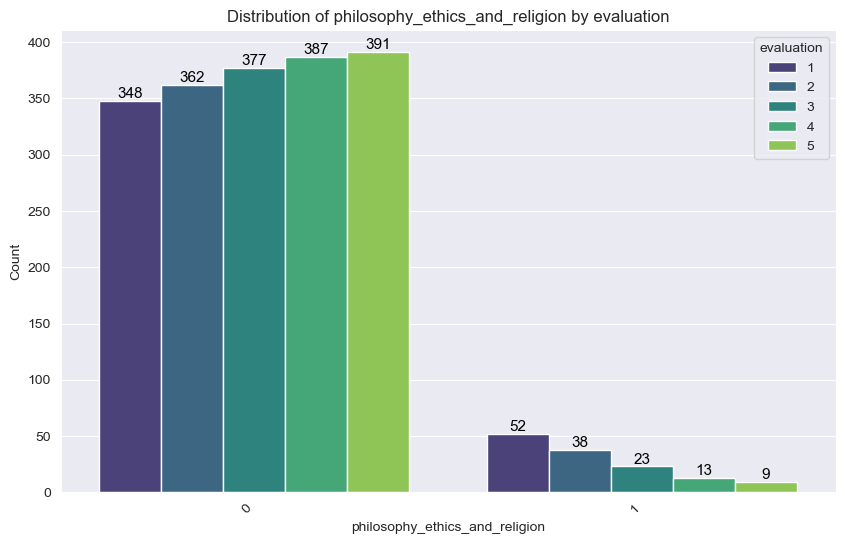

now in arts
Chi-Squared Value: 18.28379694464389
P-value: 0.0010860334404684253
There is a significant association between arts and evaluation.
---------------------------------------------------------------


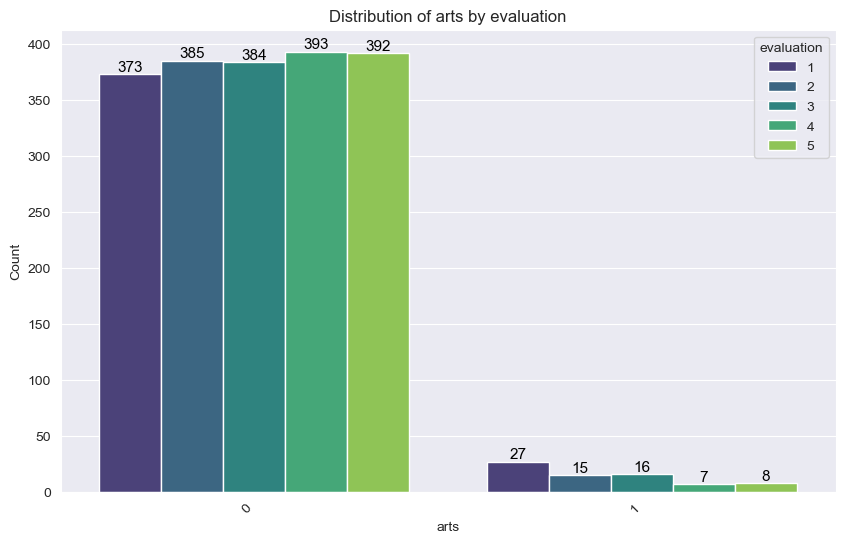

now in other_humanities_and_the_arts
Chi-Squared Value: 62.79727487245999
P-value: 7.486378282280144e-13
There is a significant association between other_humanities_and_the_arts and evaluation.
---------------------------------------------------------------


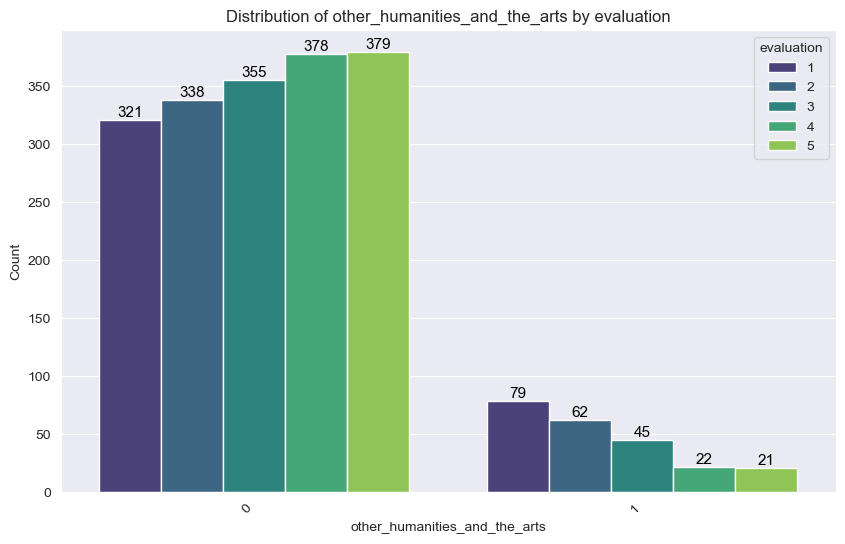

now in applied_research
Chi-Squared Value: 48.47412649270234
P-value: 7.516505691881802e-10
There is a significant association between applied_research and evaluation.
---------------------------------------------------------------


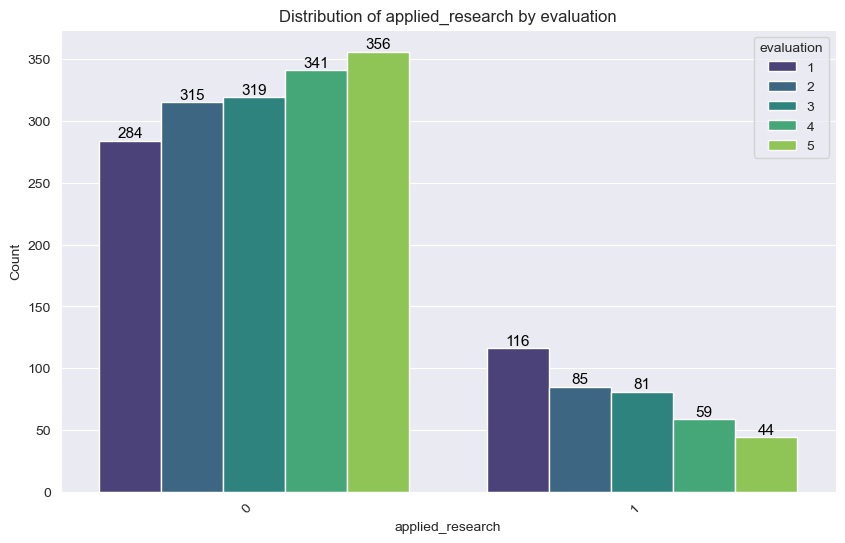

now in conclusive_research
Chi-Squared Value: 34.751188926379555
P-value: 5.225364645782965e-07
There is a significant association between conclusive_research and evaluation.
---------------------------------------------------------------


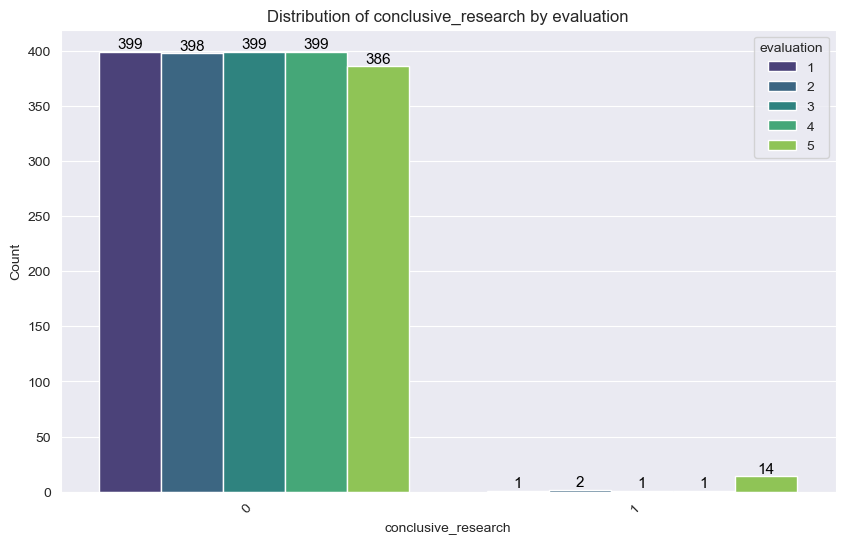

now in correlational_research
Chi-Squared Value: 16.17219313554392
P-value: 0.0027965991975449317
There is a significant association between correlational_research and evaluation.
---------------------------------------------------------------


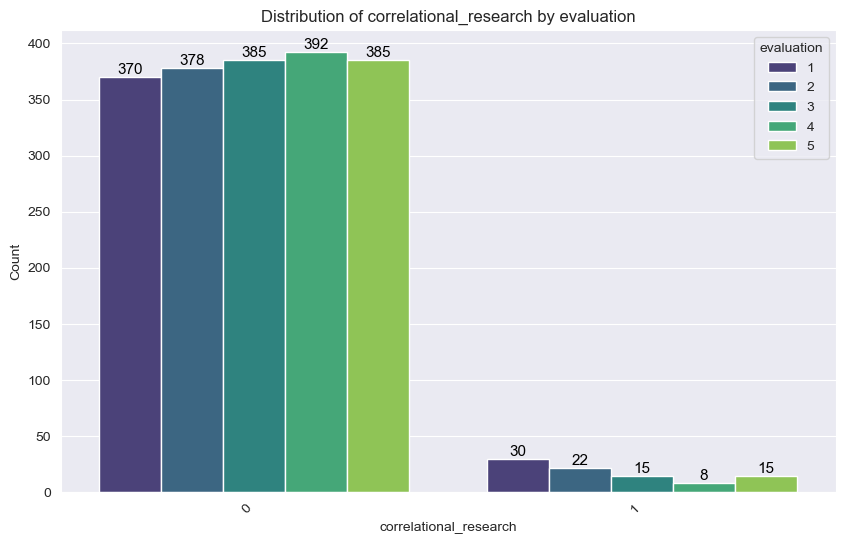

now in descriptive_research
Chi-Squared Value: 13.229671577802307
P-value: 0.010206429981623282
There is a significant association between descriptive_research and evaluation.
---------------------------------------------------------------


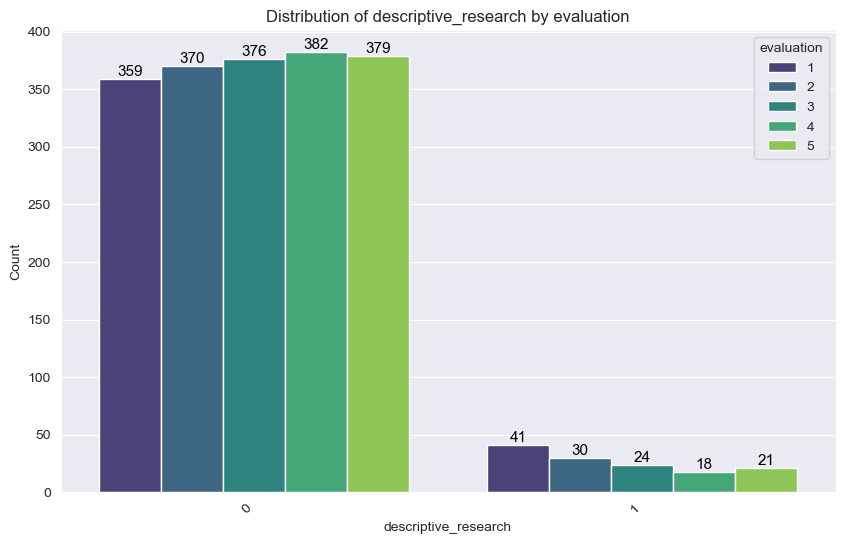

now in ethnographic_research
Chi-Squared Value: 9.73360655737705
P-value: 0.04516226529402489
There is a significant association between ethnographic_research and evaluation.
---------------------------------------------------------------


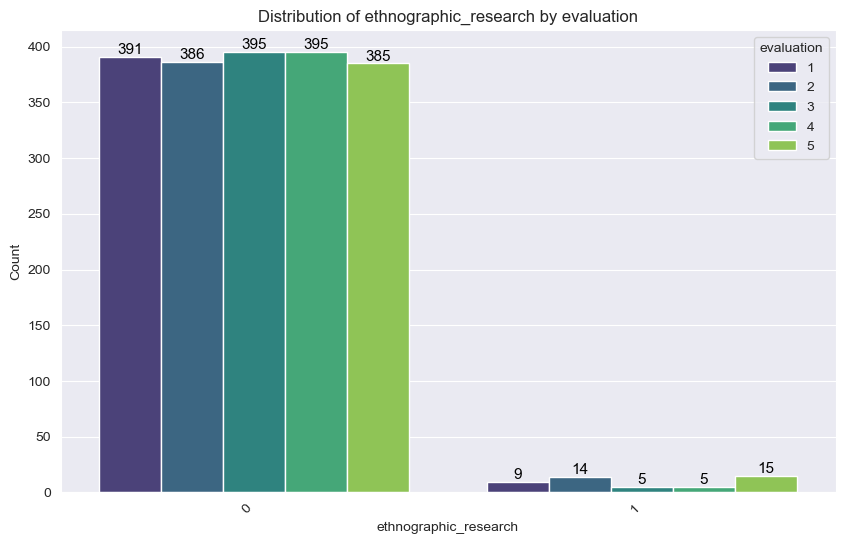

now in experiment
Chi-Squared Value: 17.625753474810075
P-value: 0.0014602008833185527
There is a significant association between experiment and evaluation.
---------------------------------------------------------------


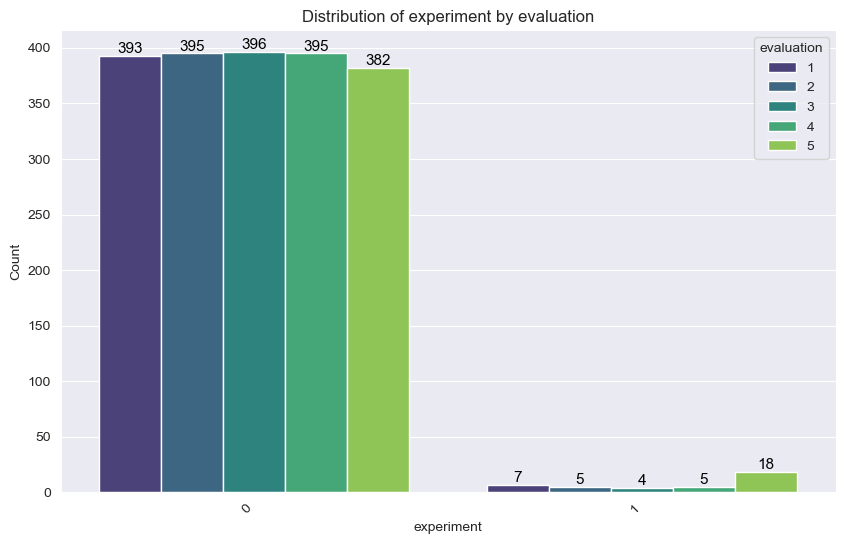

now in exploratory_research
Chi-Squared Value: 33.340200783906766
P-value: 1.0174343687708971e-06
There is a significant association between exploratory_research and evaluation.
---------------------------------------------------------------


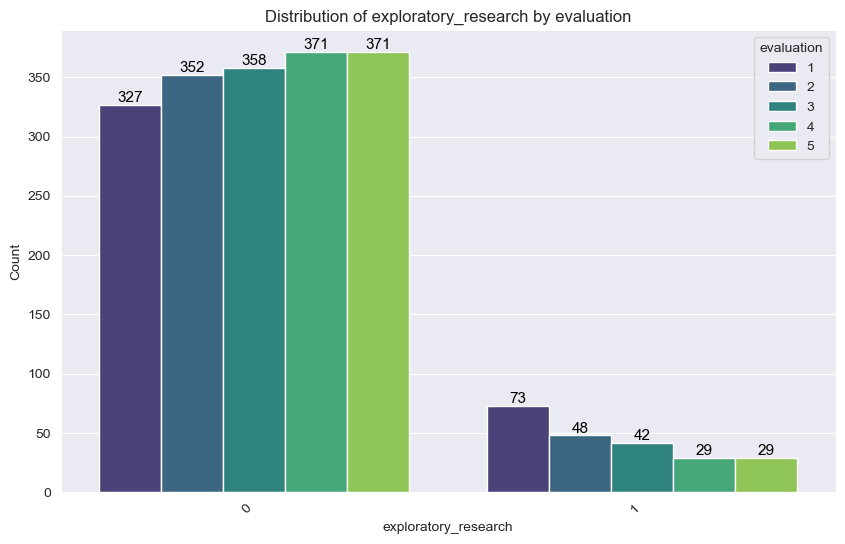

now in focus_groups
Chi-Squared Value: 37.89662518219532
P-value: 1.1769514961718205e-07
There is a significant association between focus_groups and evaluation.
---------------------------------------------------------------


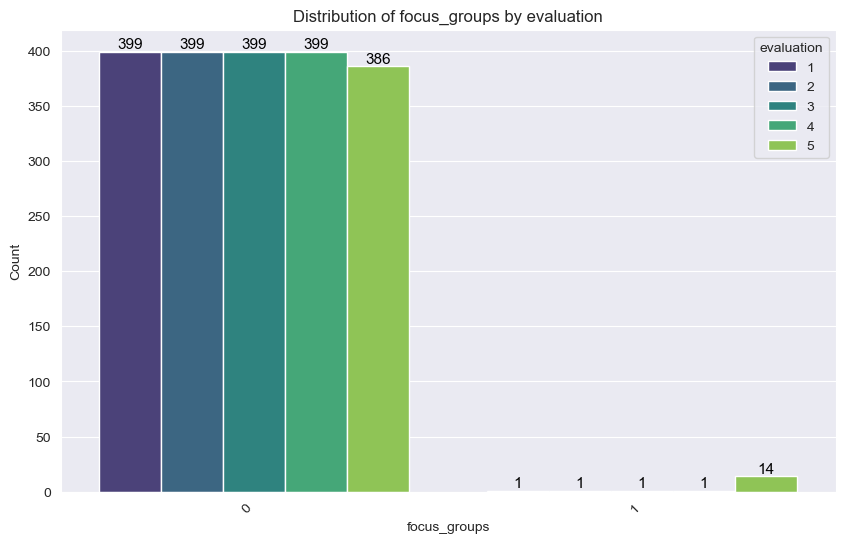

now in interviews
Chi-Squared Value: 25.095471903982546
P-value: 4.813425332094345e-05
There is a significant association between interviews and evaluation.
---------------------------------------------------------------


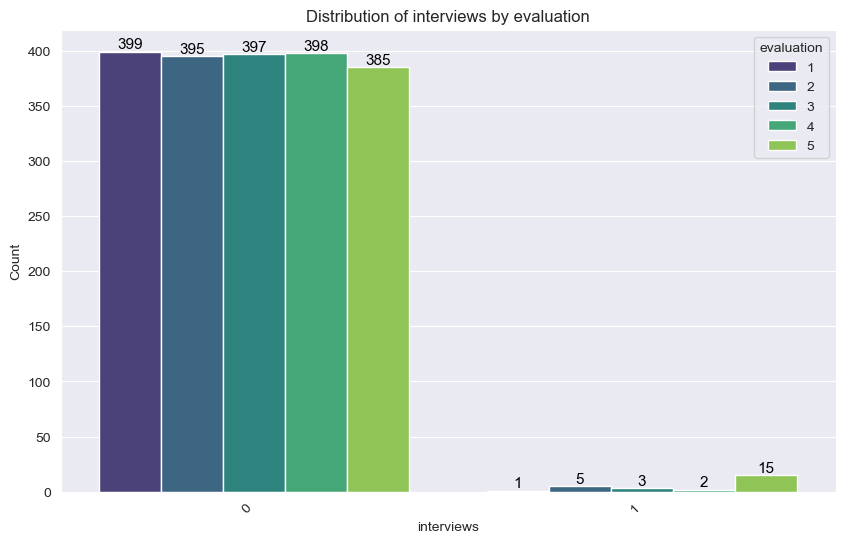

now in mixed_methods
Chi-Squared Value: 69.10554899315724
P-value: 3.505857017555222e-14
There is a significant association between mixed_methods and evaluation.
---------------------------------------------------------------


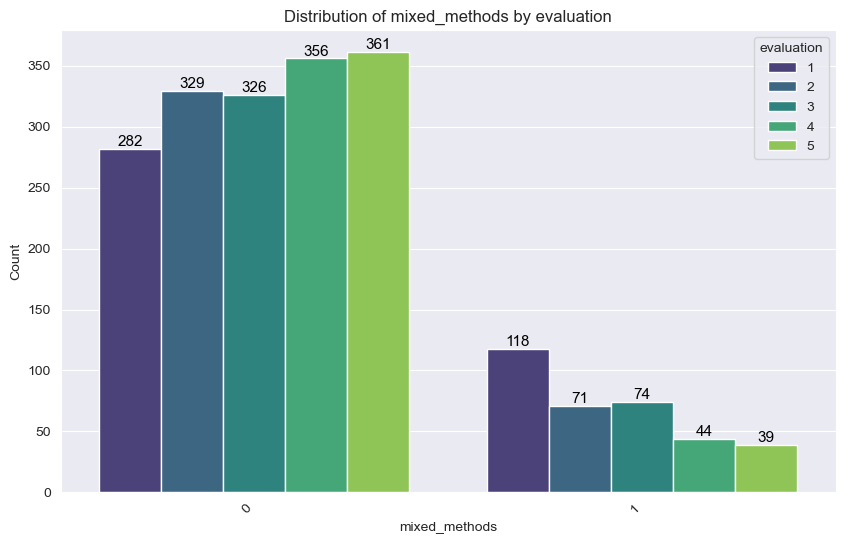

now in observation
Chi-Squared Value: 6.50352733686067
P-value: 0.16456826817436787
There is no significant association between observation and evaluation
---------------------------------------------------------------


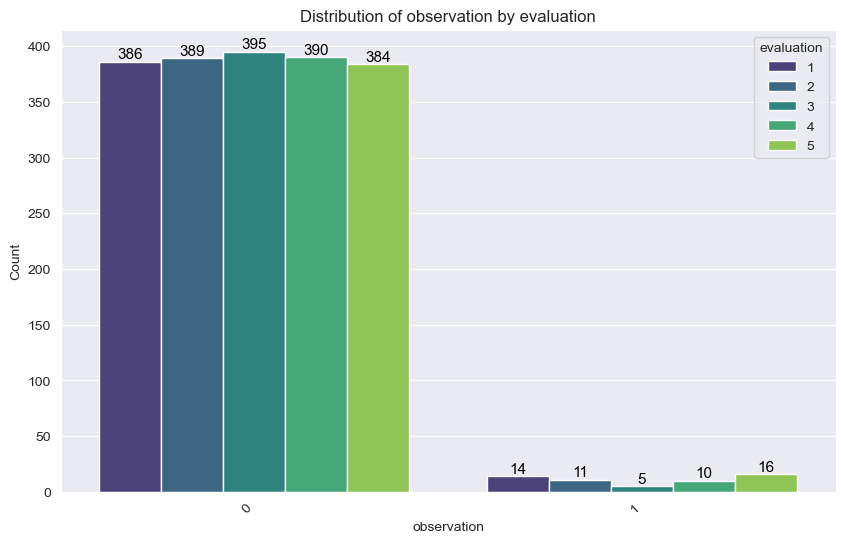

now in qualitative_research
Chi-Squared Value: 12.155046865080847
P-value: 0.016234780662333886
There is a significant association between qualitative_research and evaluation.
---------------------------------------------------------------


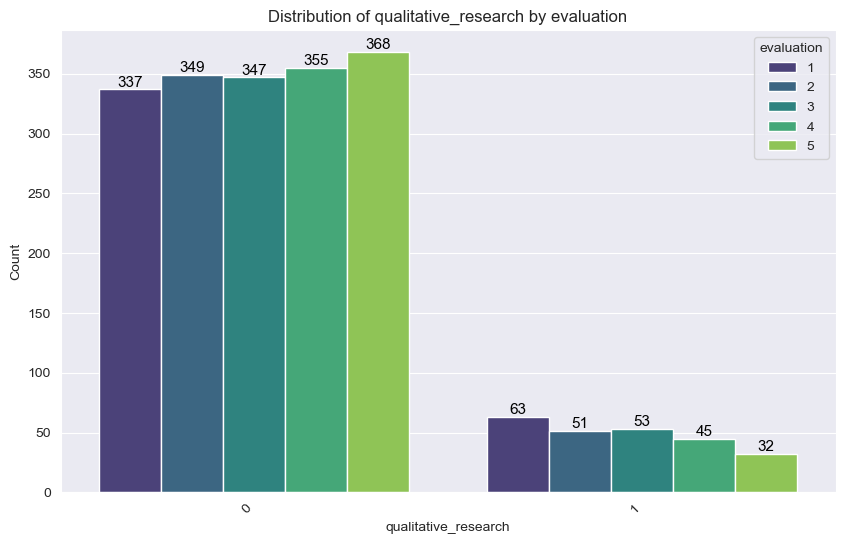

now in quantitative_research
Chi-Squared Value: 21.5794797569019
P-value: 0.00024298515013624063
There is a significant association between quantitative_research and evaluation.
---------------------------------------------------------------


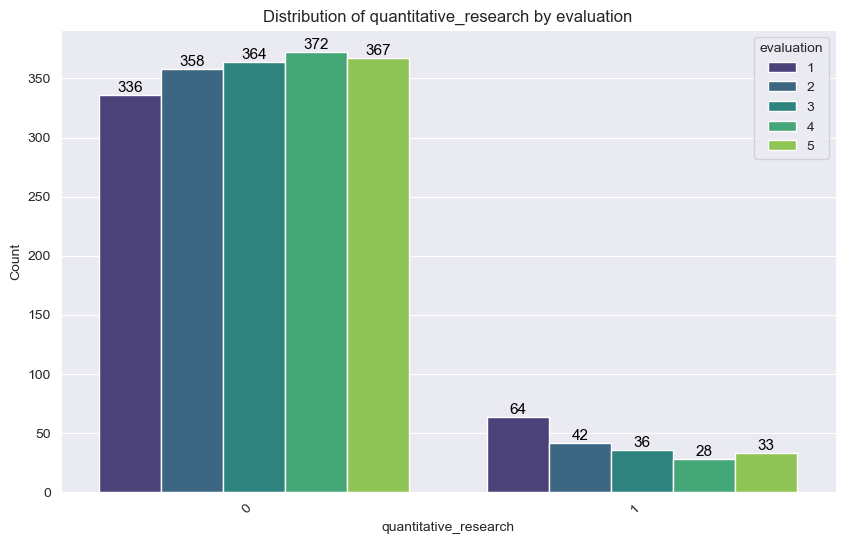

now in questionnaires
Chi-Squared Value: 42.190281357103004
P-value: 1.5233285420174528e-08
There is a significant association between questionnaires and evaluation.
---------------------------------------------------------------


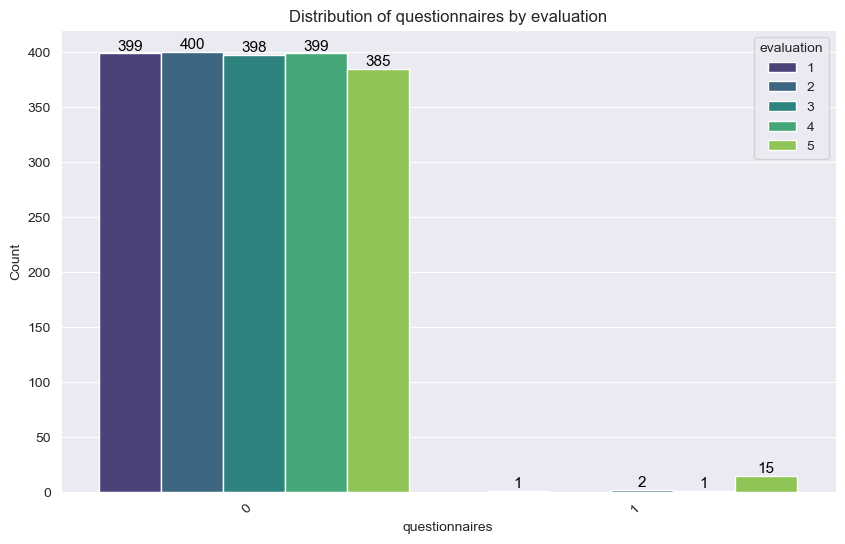

now in secondary_research
Chi-Squared Value: 9.093237704918032
P-value: 0.05881076714552742
There is no significant association between secondary_research and evaluation
---------------------------------------------------------------


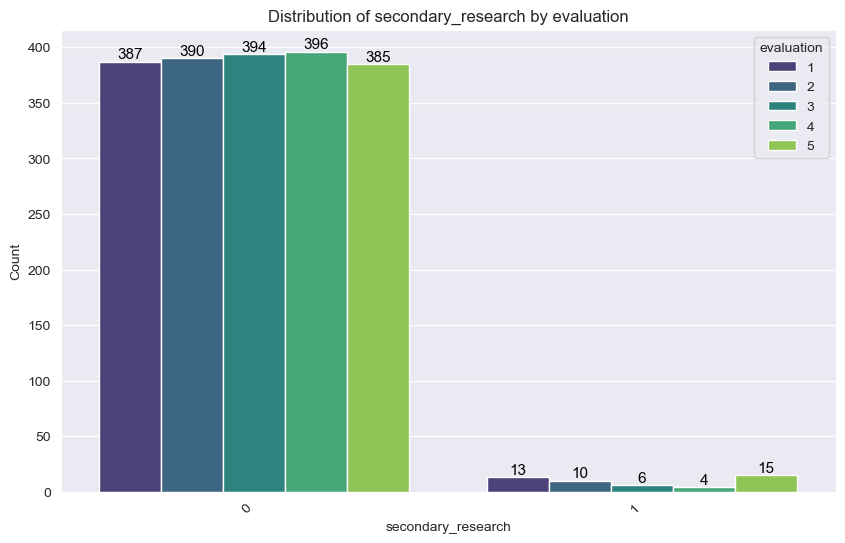

now in survey_methodology
Chi-Squared Value: 8.208594881699664
P-value: 0.08422911611002004
There is no significant association between survey_methodology and evaluation
---------------------------------------------------------------


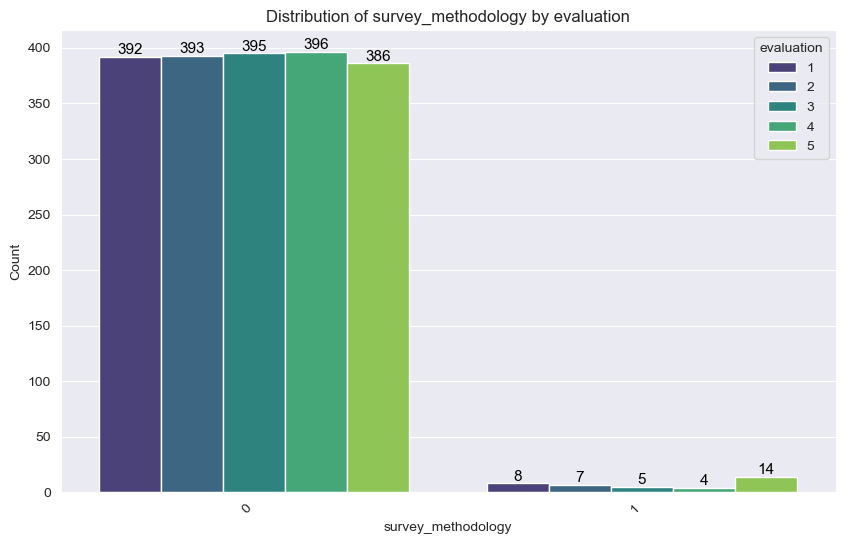

In [14]:
for col in df_m17.columns:
    if col in ['abstract', 'title', 'Unnamed: 0', 'Unnamed: 0.1', 'cited', 'science_field', 'collaborators', "journal_name", "evaluation"]:
        continue
    print(f"now in {col}")
    get_stat_significance(df_m17, col, 'evaluation')
    plot_categorical_distribution(df_m17, target_variable='evaluation', categorical_variable=col)


In [ ]:
df_m17.to_csv("labeled_data/m17_final_3.csv")
df_c19.to_csv('labeled_data/c19_final_3.csv')